# Assignment Module 3: Cleaning “Messy” Data

## Introduction

#### Wine is an alcoholic beverage made with the fermented juice of grapes. Technically, any fruit is capable of being used for wine<br/> (i.e., apples, cranberries, plums, etc.)


Working with data typically necessitates improving its quality, which will also increase the quality of the information we can extract from it. <br> <br> __Objective: To investigate and "clean" a data set that has numerous problems with data integrity and usability so that a machine learning system may use it.


***

## Exploratory Data Analysis

The data set I'll be working with includes details on over 12,700 wines, many of which have features linked to their chemical makeup. I've included some measuring units based on research about the values of these properties, along with an overview of the data attributes, below.
Explanation and rationale for each step:
1. Loaded the dataset from a GitHub repository.
2. Checked the dataset's shape and information.
3. Explored missing values and their percentages.
4. Checked for negative values in the dataset.
5. Examined the initial correlation between features.
6. Visualized the correlation matrix.
7. Created a new feature 'no_stars' to address missing values in the 'STARS' column.
8. Conducted data cleaning for negative values.
9. Visualized the distribution of the 'TARGET' variable.


In [5]:
# importing libraries needed
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot
import numpy as np
from pandas.plotting import scatter_matrix
#import missingno as msno



In [6]:
# styling matplotlib graphs
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,6)

In [15]:
#loading the data from my own github repo
# Loading Data from Github

# Loading Data from Github

url0 = "https://github.com/vidhika-git/DAV-6150/blob/main/EDA/M3_Data%20(1).csv?raw=true"


# Reading Data via pd.read_csv
df = pd.read_csv(url0)

# Displaying first 10 rows of the data
df.head(5)



Unnamed: 0  INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  \
0           0      1       3           3.2            1.160        0.98   
1           1      2       3           4.5            0.160        0.81   
2           2      4       5           7.1            2.640        0.88   
3           3      5       3           5.7            0.385        0.04   
4           4      6       4           8.0            0.330        1.26   

   ResidualSugar  Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  \
0           54.2      0.567                NaN               268.0  0.99280   
1           26.1      0.425               15.0               327.0  1.02792   
2           14.8      0.037              214.0               142.0  0.99518   
3           18.8      0.425               22.0               115.0  0.99640   
4            9.4        NaN              167.0               108.0  0.99457   

     pH  Sulphates  Alcohol  LabelAppeal  AcidIndex  STARS  
0  3.33       0.59      9.9            0          8    2.0  
1  3.38       0.70      NaN           -1          7    3.0  
2  3.12       0.48     22.0           -1          8    3.0  
3  2.24       1.83      6.2           -1          6    1.0  
4  3.12       1.77     13.7            0          9    2.0

In [16]:
#checking dataset shape
df.shape

(12795, 17)

In [17]:
#checking df info, including column data types, and if any null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12795 entries, 0 to 12794
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          12795 non-null  int64  
 1   INDEX               12795 non-null  int64  
 2   TARGET              12795 non-null  int64  
 3   FixedAcidity        12795 non-null  float64
 4   VolatileAcidity     12795 non-null  float64
 5   CitricAcid          12795 non-null  float64
 6   ResidualSugar       12179 non-null  float64
 7   Chlorides           12157 non-null  float64
 8   FreeSulfurDioxide   12148 non-null  float64
 9   TotalSulfurDioxide  12113 non-null  float64
 10  Density             12795 non-null  float64
 11  pH                  12400 non-null  float64
 12  Sulphates           11585 non-null  float64
 13  Alcohol             12142 non-null  float64
 14  LabelAppeal         12795 non-null  int64  
 15  AcidIndex           12795 non-null  int64  
 16  STAR

As we can see, the remaining properties have floating point values, while INDEX, TARGET, LabelAppeal, and AcidIndex are all integers. The quantity of non-null values in each field is also displayed.

In [18]:
#getting exact number of null values in each column
null_count=df.isnull().sum()
null_count

Unnamed: 0               0
INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar          616
Chlorides              638
FreeSulfurDioxide      647
TotalSulfurDioxide     682
Density                  0
pH                     395
Sulphates             1210
Alcohol                653
LabelAppeal              0
AcidIndex                0
STARS                 3359
dtype: int64

In [19]:
# get percent of missing data
missing = df.isnull().mean() * 100
missing.sort_values(inplace=True,ascending=False)
missing

STARS                 26.252442
Sulphates              9.456819
TotalSulfurDioxide     5.330207
Alcohol                5.103556
FreeSulfurDioxide      5.056663
Chlorides              4.986323
ResidualSugar          4.814381
pH                     3.087143
CitricAcid             0.000000
INDEX                  0.000000
VolatileAcidity        0.000000
Density                0.000000
FixedAcidity           0.000000
TARGET                 0.000000
LabelAppeal            0.000000
AcidIndex              0.000000
Unnamed: 0             0.000000
dtype: float64

There are 8 columns that contain null values, with STARS as the attribute with the highest number of missing data with 3359, that corresponds to over 26% of the records.

In [21]:
# get count of negative values across each column
negatives_count=df.iloc[:,1:].where(df.iloc[:,1:]<0).count()
negatives_count

INDEX                    0
TARGET                   0
FixedAcidity             0
VolatileAcidity          0
CitricAcid               0
ResidualSugar            0
Chlorides                0
FreeSulfurDioxide        0
TotalSulfurDioxide       0
Density                  0
pH                       0
Sulphates                0
Alcohol                  0
LabelAppeal           3640
AcidIndex                0
STARS                    0
dtype: int64

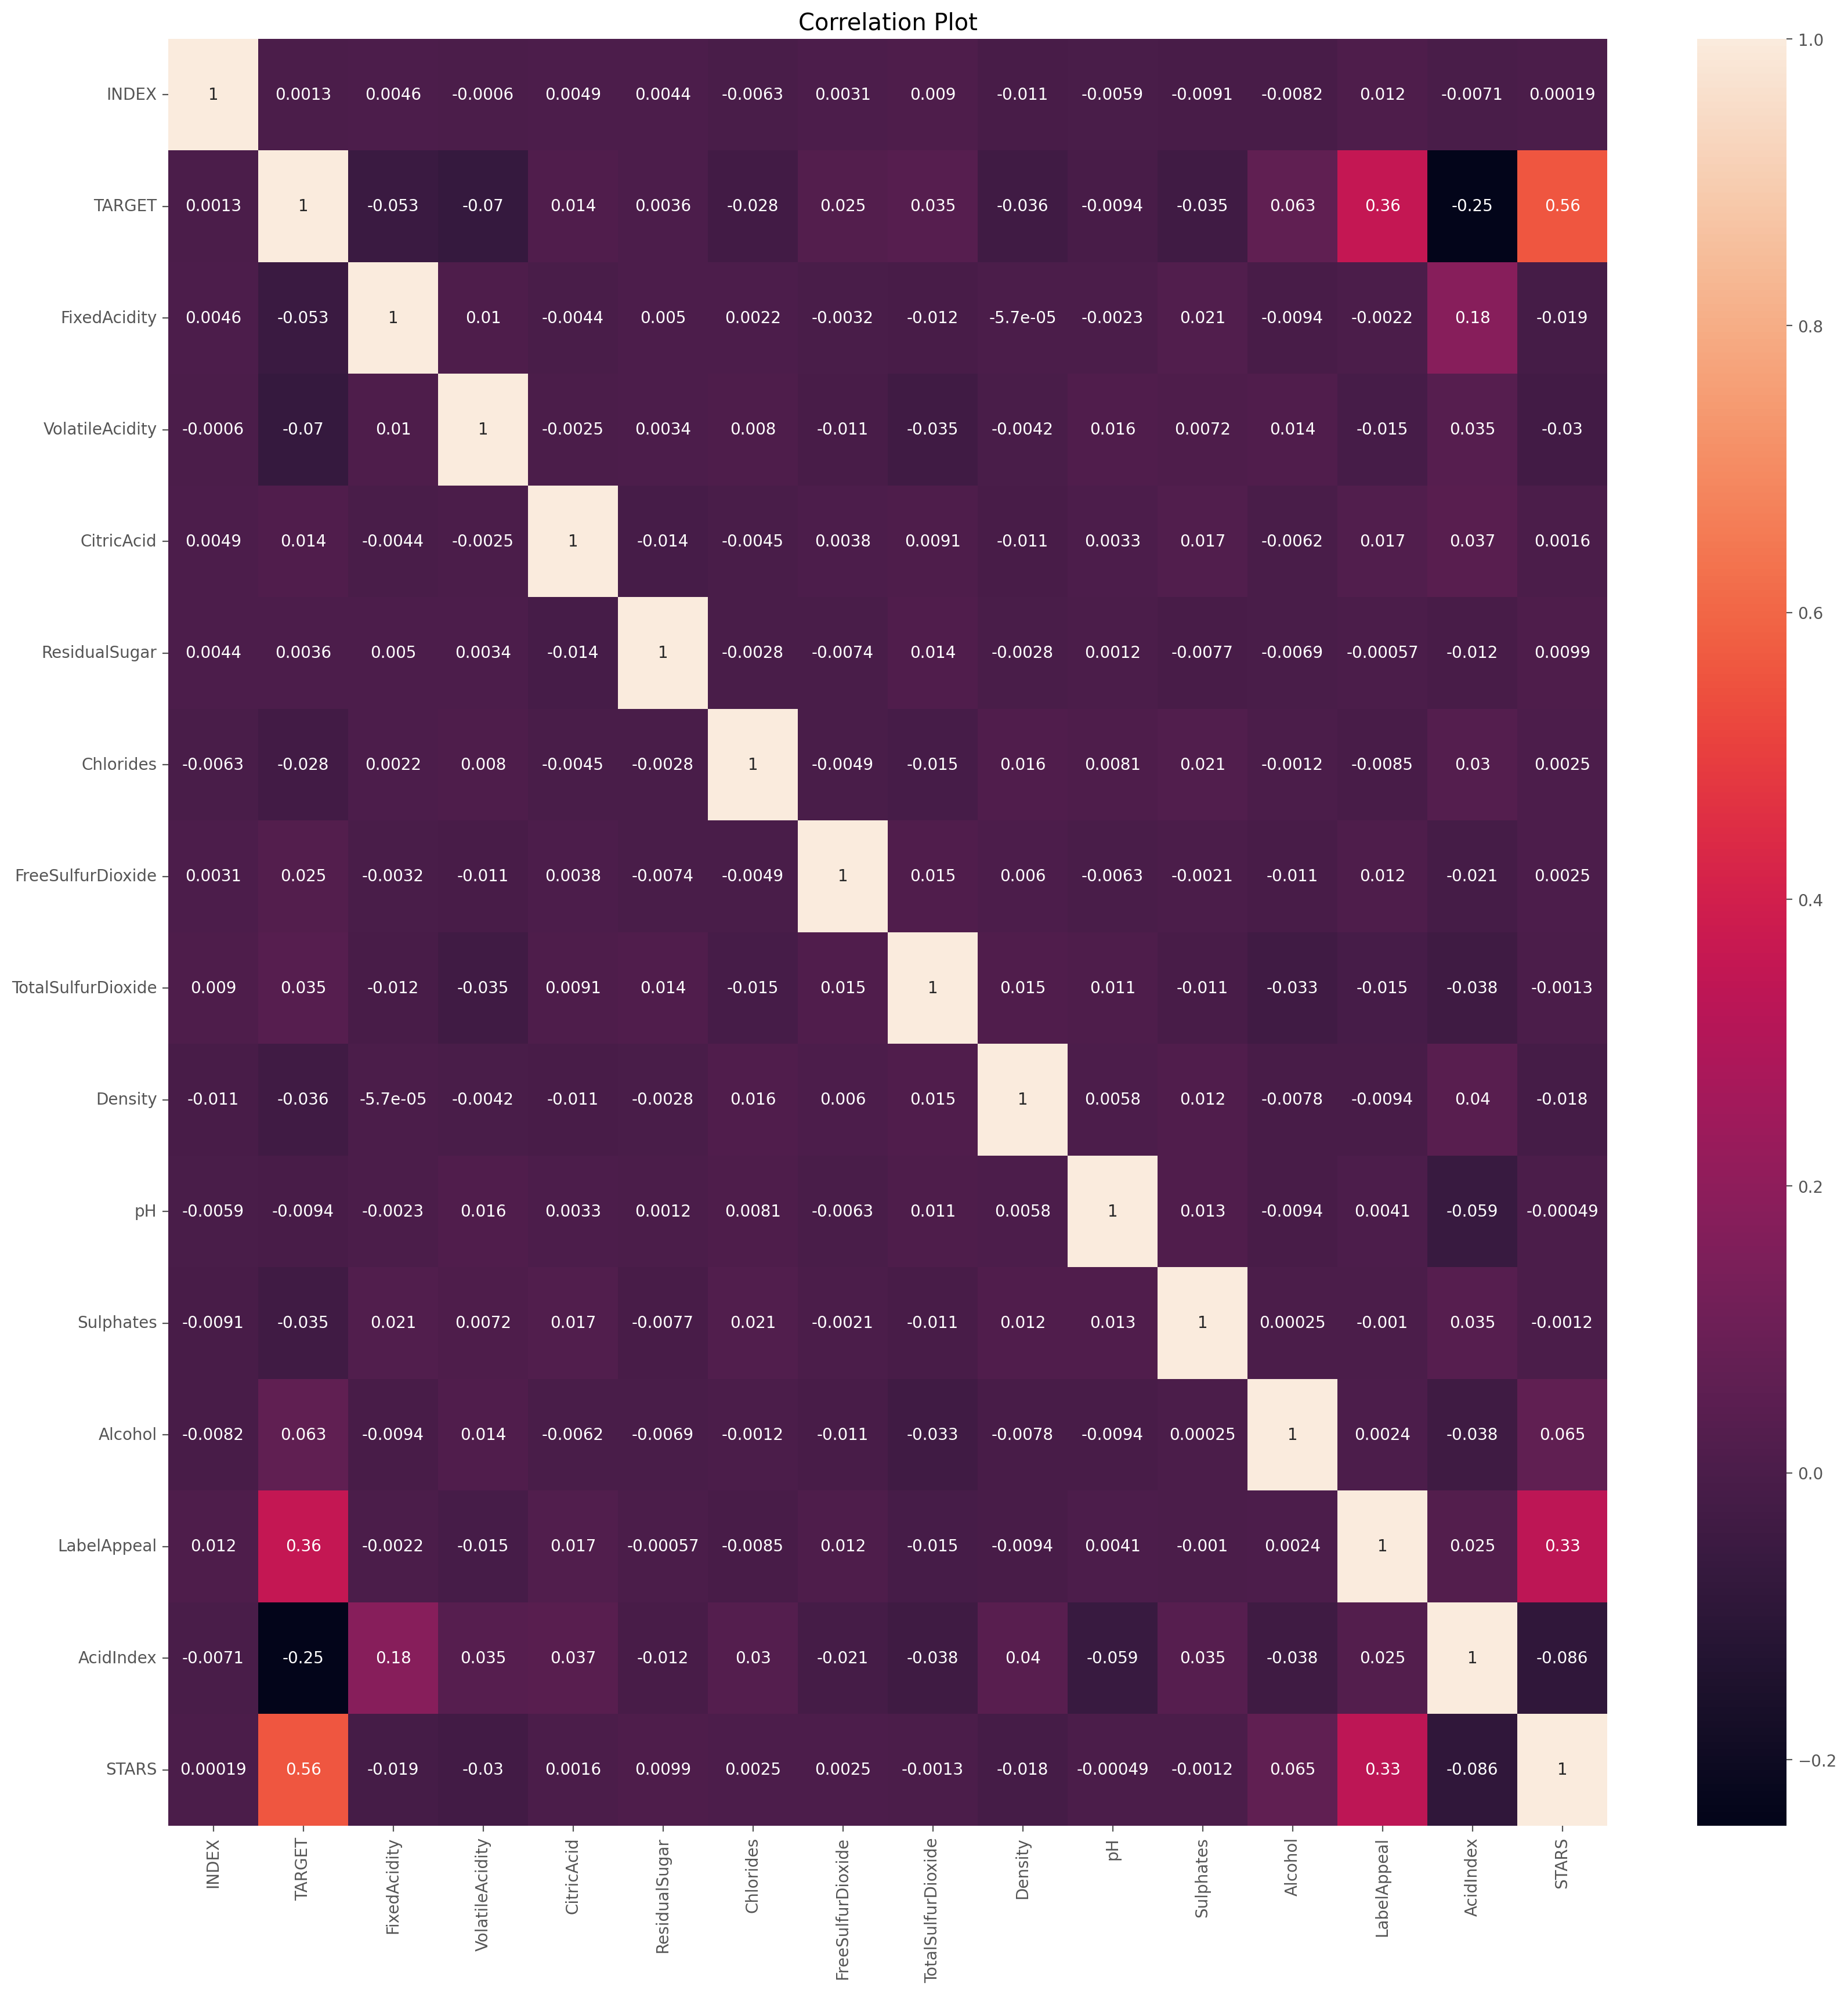

In [22]:
# initial correlation
cor = df.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

Prior to performing any data cleansing, it appears that STARS and LabelAppeal have a positive correlation with the TARGET. Nevertheless, it should be noted that these are categorical variables, as we shall examine subsequently in the analysis, so this correlation cannot be easily interpreted as positive.

In [23]:
#correlation with only positive values
df.iloc[:,1:].where(df.iloc[:,1:]>=0).corr()

INDEX    TARGET  FixedAcidity  VolatileAcidity  \
INDEX               1.000000  0.001256      0.004581        -0.000601   
TARGET              0.001256  1.000000     -0.052984        -0.070195   
FixedAcidity        0.004581 -0.052984      1.000000         0.010195   
VolatileAcidity    -0.000601 -0.070195      0.010195         1.000000   
CitricAcid          0.004908  0.013953     -0.004378        -0.002511   
ResidualSugar       0.004408  0.003645      0.005040         0.003443   
Chlorides          -0.006292 -0.028463      0.002232         0.008041   
FreeSulfurDioxide   0.003138  0.024503     -0.003158        -0.010797   
TotalSulfurDioxide  0.009035  0.035253     -0.012379        -0.035379   
Density            -0.010779 -0.035518     -0.000057        -0.004208   
pH                 -0.005853 -0.009445     -0.002324         0.016246   
Sulphates          -0.009073 -0.035259      0.020987         0.007220   
Alcohol            -0.008201  0.063394     -0.009406         0.014157   
LabelAppeal         0.005010  0.227353      0.000801        -0.008870   
AcidIndex          -0.007097 -0.246049      0.179916         0.035434   
STARS               0.000194  0.558794     -0.018505        -0.030154   

                    CitricAcid  ResidualSugar  Chlorides  FreeSulfurDioxide  \
INDEX                 0.004908       0.004408  -0.006292           0.003138   
TARGET                0.013953       0.003645  -0.028463           0.024503   
FixedAcidity         -0.004378       0.005040   0.002232          -0.003158   
VolatileAcidity      -0.002511       0.003443   0.008041          -0.010797   
CitricAcid            1.000000      -0.013510  -0.004550           0.003845   
ResidualSugar        -0.013510       1.000000  -0.002837          -0.007418   
Chlorides            -0.004550      -0.002837   1.000000          -0.004884   
FreeSulfurDioxide     0.003845      -0.007418  -0.004884           1.000000   
TotalSulfurDioxide    0.009138       0.014476  -0.015316           0.014710   
Density              -0.010854      -0.002794   0.016483           0.005979   
pH                    0.003293       0.001203   0.008080          -0.006287   
Sulphates             0.017488      -0.007658   0.021366          -0.002096   
Alcohol              -0.006218      -0.006927  -0.001174          -0.011384   
LabelAppeal           0.018205      -0.008957  -0.011895           0.006558   
AcidIndex             0.036506      -0.011646   0.029846          -0.021074   
STARS                 0.001627       0.009897   0.002516           0.002465   

                    TotalSulfurDioxide   Density        pH  Sulphates  \
INDEX                         0.009035 -0.010779 -0.005853  -0.009073   
TARGET                        0.035253 -0.035518 -0.009445  -0.035259   
FixedAcidity                 -0.012379 -0.000057 -0.002324   0.020987   
VolatileAcidity              -0.035379 -0.004208  0.016246   0.007220   
CitricAcid                    0.009138 -0.010854  0.003293   0.017488   
ResidualSugar                 0.014476 -0.002794  0.001203  -0.007658   
Chlorides                    -0.015316  0.016483  0.008080   0.021366   
FreeSulfurDioxide             0.014710  0.005979 -0.006287  -0.002096   
TotalSulfurDioxide            1.000000  0.014692  0.010575  -0.010995   
Density                       0.014692  1.000000  0.005768   0.012044   
pH                            0.010575  0.005768  1.000000   0.013386   
Sulphates                    -0.010995  0.012044  0.013386   1.000000   
Alcohol                      -0.033102 -0.007828 -0.009365   0.000251   
LabelAppeal                  -0.002793  0.006123  0.002687   0.002722   
AcidIndex                    -0.037786  0.040413 -0.058676   0.035444   
STARS                        -0.001291 -0.018284 -0.000488  -0.001227   

                     Alcohol  LabelAppeal  AcidIndex     STARS  
INDEX              -0.008201     0.005010  -0.007097  0.000194  
TARGET              0.063394     0.227353  -0.246049  0.558794  


The STARS variable has the strongest correlation with the response and the greatest amount of null values, according to the first correlation between the explanatory variables and the response (TARGET), which does not include NA or null values. The creation of an indicator feature named "no_stars" could be one approach to address the null values problems in this variable.

In [24]:
# descriptive stats
df.describe()

Unnamed: 0         INDEX        TARGET  FixedAcidity  \
count  12795.000000  12795.000000  12795.000000  12795.000000   
mean    6397.000000   8069.980305      3.029074      8.063251   
std     3693.742682   4656.905107      1.926368      4.996119   
min        0.000000      1.000000      0.000000      0.000000   
25%     3198.500000   4037.500000      2.000000      5.600000   
50%     6397.000000   8110.000000      3.000000      7.000000   
75%     9595.500000  12106.500000      4.000000      9.800000   
max    12794.000000  16129.000000      8.000000     34.400000   

       VolatileAcidity    CitricAcid  ResidualSugar     Chlorides  \
count     12795.000000  12795.000000   12179.000000  12157.000000   
mean          0.641086      0.686315      23.367809      0.222559   
std           0.555614      0.606005      24.945667      0.234288   
min           0.000000      0.000000       0.000000      0.000000   
25%           0.250000      0.280000       3.600000      0.046000   
50%           0.410000      0.440000      12.900000      0.098000   
75%           0.910000      0.970000      38.700000      0.368000   
max           3.680000      3.860000     141.150000      1.351000   

       FreeSulfurDioxide  TotalSulfurDioxide       Density            pH  \
count       12148.000000        12113.000000  12795.000000  12400.000000   
mean          106.679042          204.319120      0.994203      3.207628   
std           108.102694          163.116881      0.026538      0.679687   
min             0.000000            0.000000      0.888090      0.480000   
25%            28.000000          100.000000      0.987720      2.960000   
50%            56.000000          154.000000      0.994490      3.200000   
75%           172.000000          262.000000      1.000515      3.470000   
max           623.000000         1057.000000      1.099240      6.130000   

          Sulphates       Alcohol   LabelAppeal     AcidIndex        STARS  
count  11585.000000  12142.000000  12795.000000  12795.000000  9436.000000  
mean       0.846668     10.523778     -0.009066      7.772724     2.041755  
std        0.655612      3.629154      0.891089      1.323926     0.902540  
min        0.000000      0.000000     -2.000000      4.000000     1.000000  
25%        0.430000      9.000000     -1.000000      7.000000     1.000000  
50%        0.590000     10.400000      0.000000      8.000000     2.000000  
75%        1.100000     12.400000      1.000000      8.000000     3.000000  
max        4.240000     26.500000      2.000000     17.000000     4.000000

Several columns, including FixedAcidity, VolatileAcidity, and ResidualSugar, have negative values, as can be seen from the preliminary descriptive statistics. This is not a good signal because the attributes in question do not make sense for their values to be below zero. To have a deeper understanding of each attribute distribution, we shall examine it in more detail.

### Analyzing each attribute 

In [25]:
# INDEX
# chequing if there are duplicates, and there aren't
df[df.INDEX.duplicated()]

Empty DataFrame
Columns: [Unnamed: 0, INDEX, TARGET, FixedAcidity, VolatileAcidity, CitricAcid, ResidualSugar, Chlorides, FreeSulfurDioxide, TotalSulfurDioxide, Density, pH, Sulphates, Alcohol, LabelAppeal, AcidIndex, STARS]
Index: []

This attribute does not provide any meaninful information to a machine learning model, hance it does not require any further analysis.

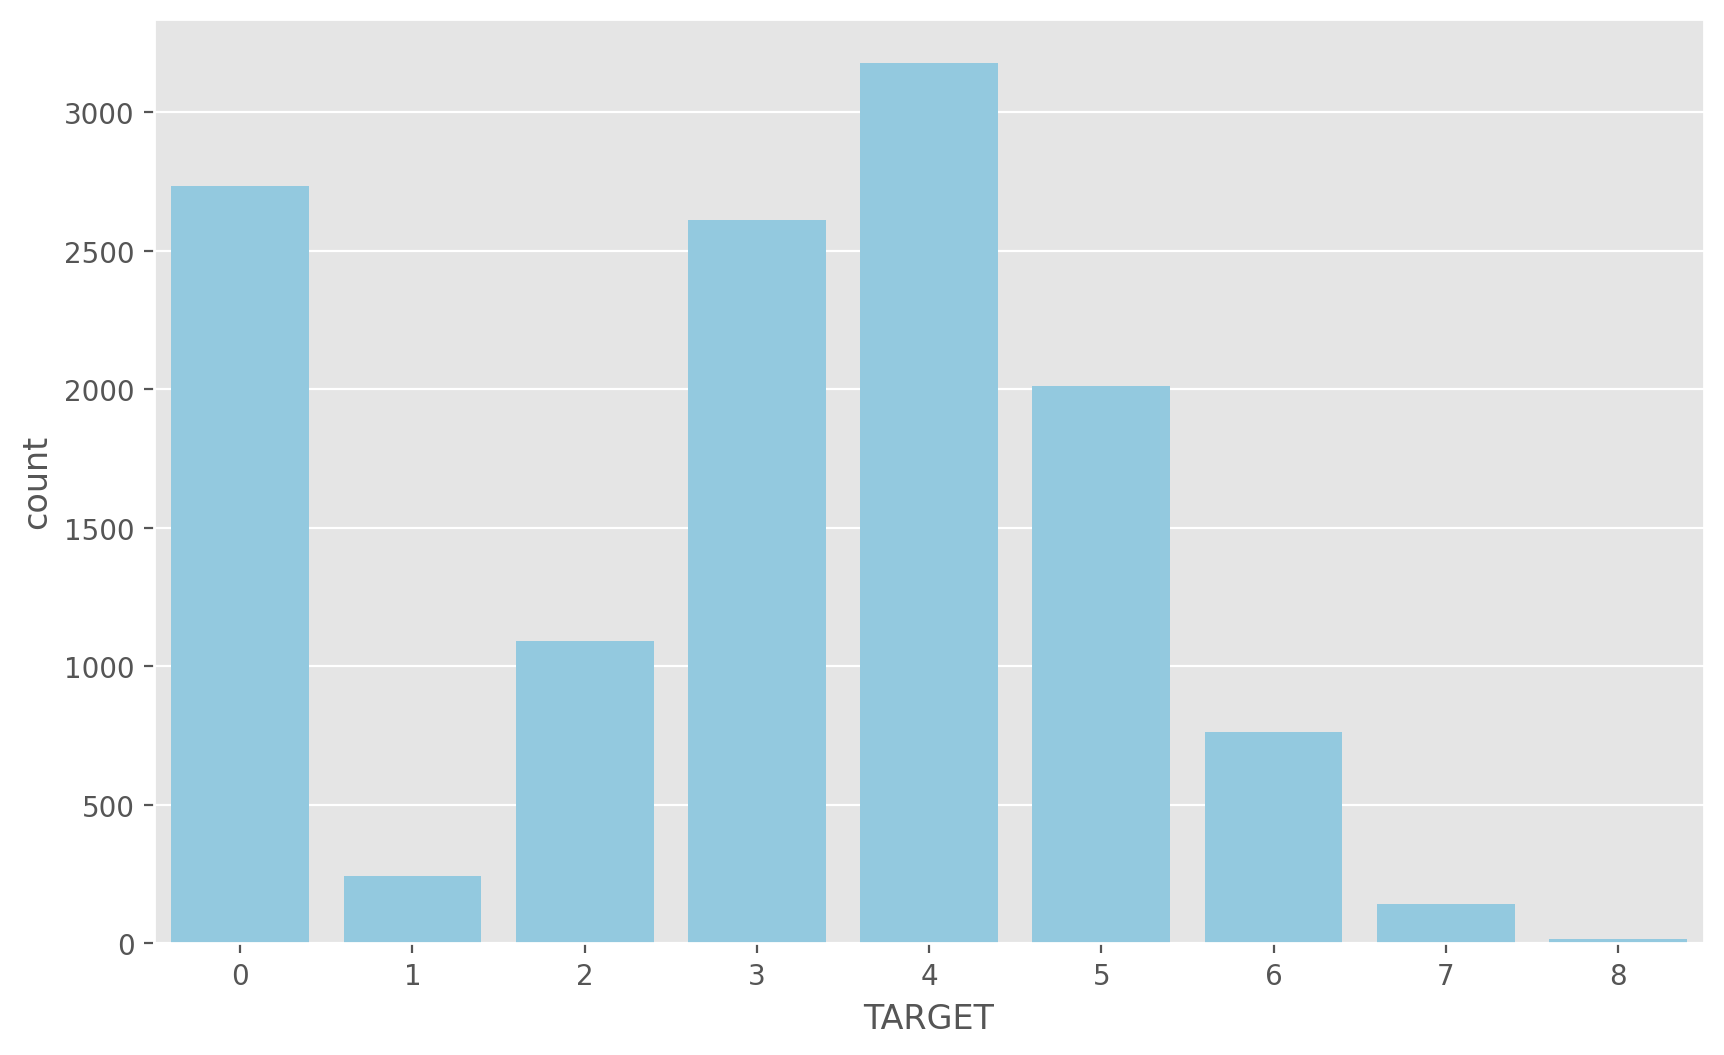

In [102]:
#LabelAppeal
sns.countplot(x="TARGET",data=df, color='skyblue');

It is evident that over 2500 records have a target of 0, 3, and 4, whereas the number of wines with a target of 8 is quite small. The large percentage of wines with TARGET values of zero—that is, ones in which not a single unit was sold—is worth noting.

C:\Users\admin\AppData\Local\Temp\ipykernel_23780\3487297395.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["FixedAcidity"], kde=False)


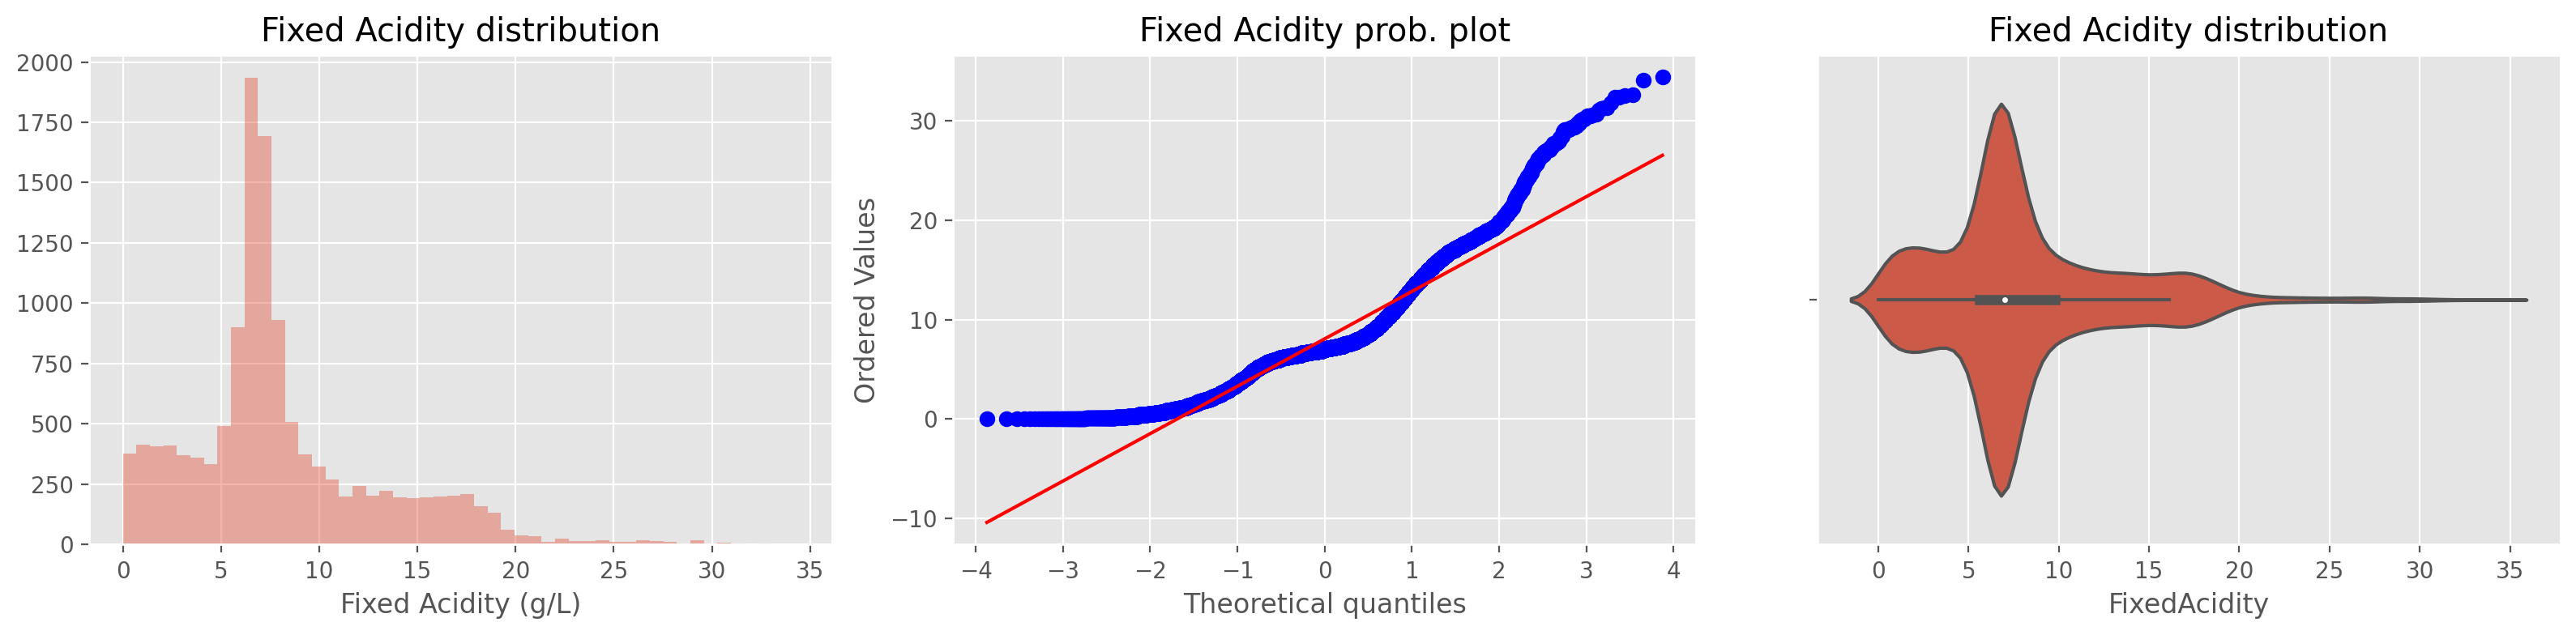

In [36]:
# FixedAcidity, there are no null values
fig = plt.figure(figsize=(16, 4))

# Distribution Plot
plt.subplot(1, 3, 1)
plt.xlabel('g/L')
sns.distplot(df["FixedAcidity"], kde=False)
plt.title("Fixed Acidity distribution")
plt.xlabel('Fixed Acidity (g/L)')

# Probability Plot
plt.subplot(1, 3, 2)
probplot(df["FixedAcidity"], plot=plt)
plt.title("Fixed Acidity prob. plot")

# Violin Plot (Alternative to Boxplot)
plt.subplot(1, 3, 3)
plt.xlabel('Distribution')
sns.violinplot(x=df["FixedAcidity"])
plt.title("Fixed Acidity distribution")

plt.tight_layout()
plt.show()


In [37]:
df[df.FixedAcidity>30].TARGET.value_counts()

4    8
0    5
3    4
5    3
2    1
Name: TARGET, dtype: int64

It is evident that the records have a mean Fixed Acidity of approximately 7 (g/L), which is almost typical. Based on my research, it appears that tartaric, malic, citric, and succinic acids are the main fixed acids present in wines.  Although the amounts of each of these acids in wine can differ somewhat, one should generally anticipate 1,000–4,000 mg/L of tartaric acid, 0–8,000 mg/L of malic acid, 0–500 mg/L of citric acid, and 500–2,000 mg/L of succinic acid.

We determine that, according to the nature of the data, negative values are not possible, suggesting that there was a mistake when the data was created or gathered. It will be necessary to change this functionality so that it only accepts positive numbers.

The boxplot displays the upper whisker's extent up to around 17, which appears to be the attribute's tentative limit value. Any figure above that threshold is said to be an anomaly.

C:\Users\admin\AppData\Local\Temp\ipykernel_23780\2128168867.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["CitricAcid"], kde=False)


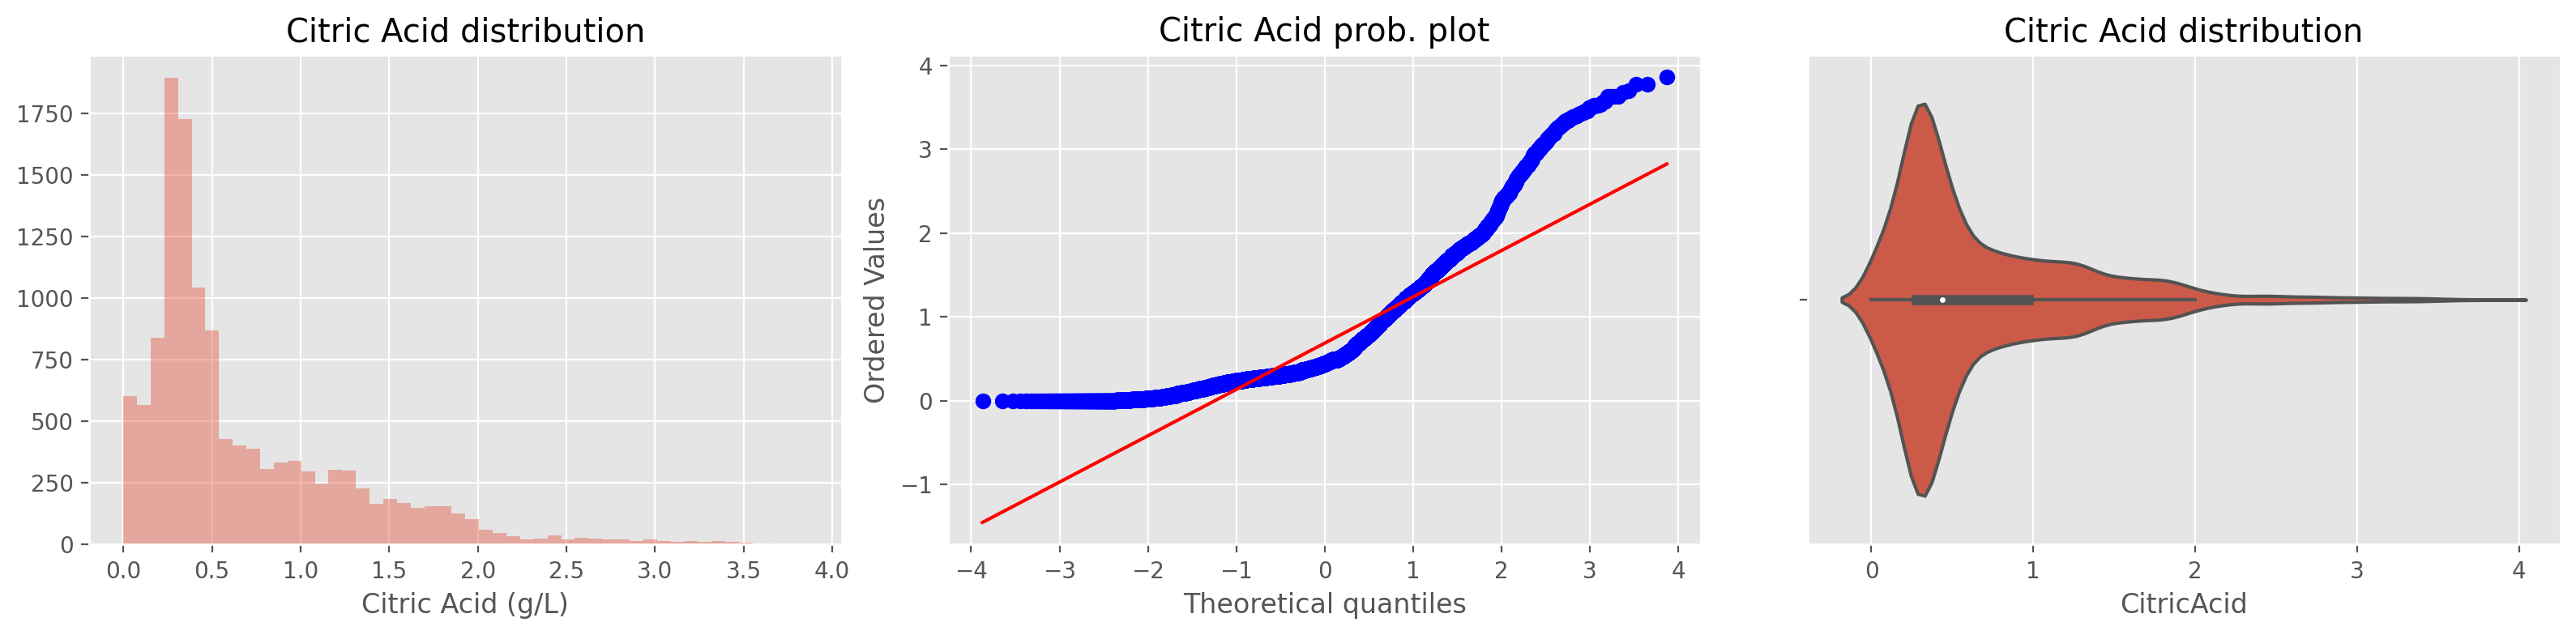

In [38]:
## CitricAcid, no null values
fig = plt.figure(figsize=(16, 4))

# Distribution Plot
plt.subplot(1, 3, 1)
sns.distplot(df["CitricAcid"], kde=False)
plt.title("Citric Acid distribution")
plt.xlabel('Citric Acid (g/L)')

# Probability Plot
plt.subplot(1, 3, 2)
probplot(df["CitricAcid"], plot=plt)
plt.title("Citric Acid prob. plot")

# Violin Plot (Alternative to Boxplot)
plt.subplot(1, 3, 3)
plt.xlabel('Distribution')
sns.violinplot(x=df["CitricAcid"])
plt.title("Citric Acid distribution")

plt.tight_layout()
plt.show()


Again there is a similar scenario as the previous one. Given the nature of this data we can't have negative values, indicating some error at the time the data was created/collected. This feature will need to be transformed, so that it only has positive values. <br>
According to the article below we can consider that above 1 g/L can be considered that it has reached the Maximum Acceptable Limits according to the International Code of Oenological Practices.
http://www.oiv.int/public/medias/3741/e-code-annex-maximum-acceptable-limits.pdf

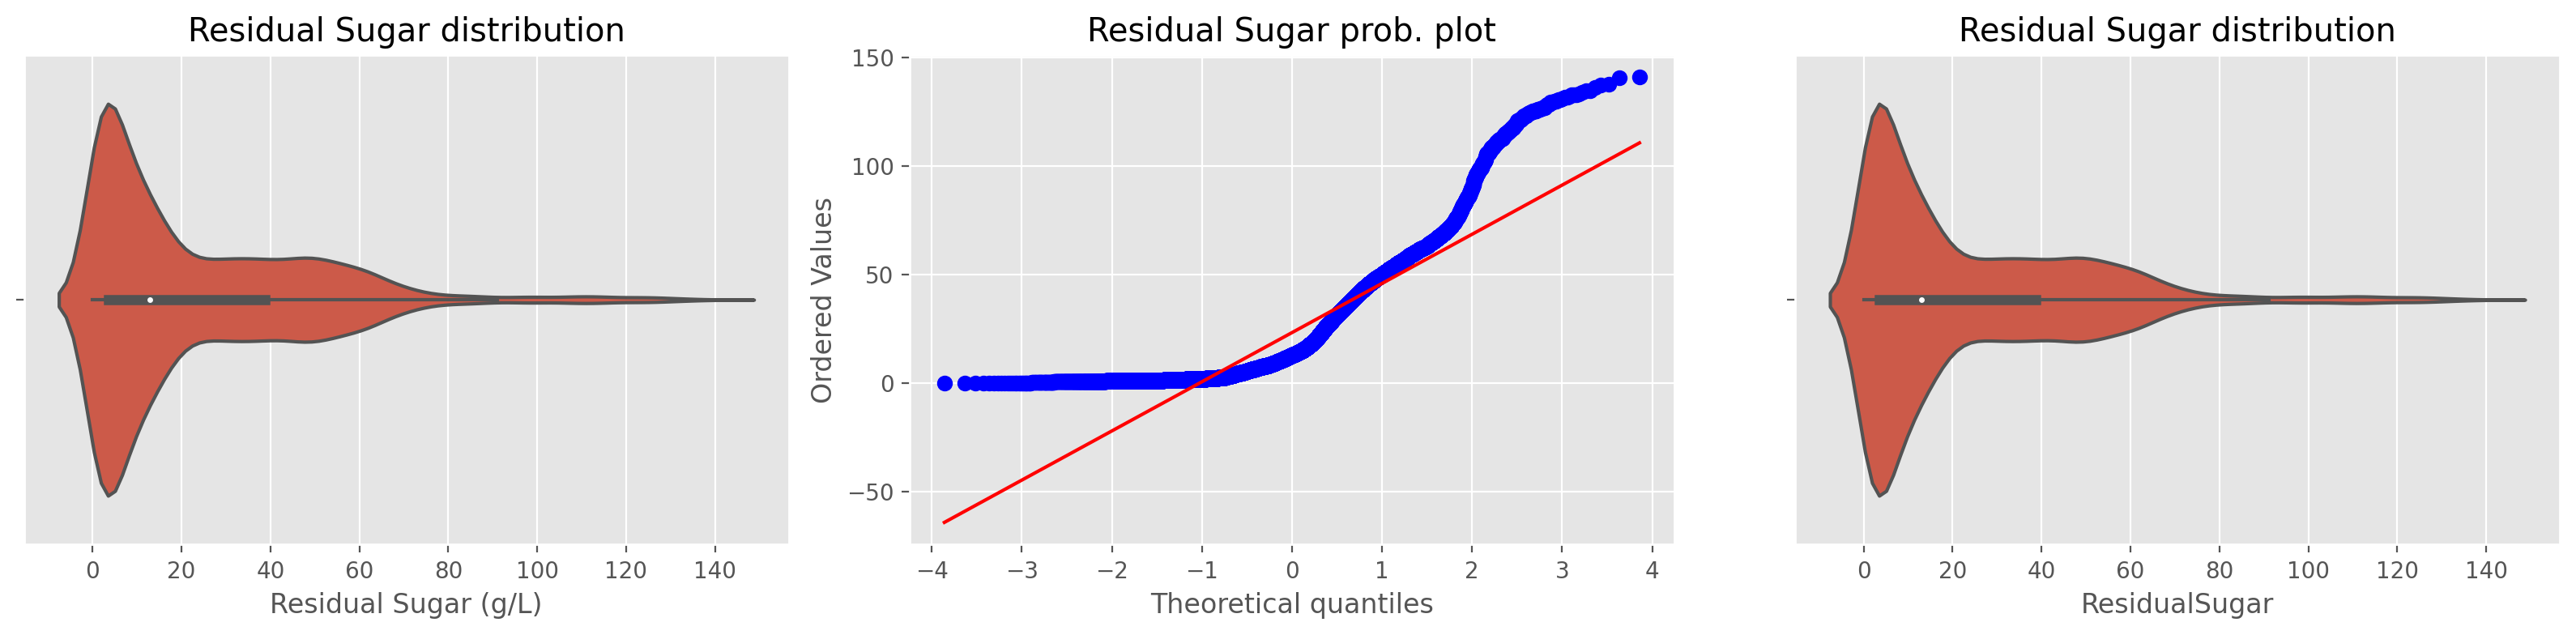

In [39]:
# ResidualSugar, getting the non-null values for ResidualSugar column (4.8% of the values)
sugar_notna = df['ResidualSugar'].dropna()

# Showing distribution and probability plot using violin plot
fig = plt.figure(figsize=(16, 4))

# Violin Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=sugar_notna)
plt.title("Residual Sugar distribution")
plt.xlabel('Residual Sugar (g/L)')

# Probability Plot
plt.subplot(1, 3, 2)
probplot(sugar_notna, plot=plt)
plt.title("Residual Sugar prob. plot")

# Violin Plot (Alternative to Boxplot)
plt.subplot(1, 3, 3)
plt.xlabel('Distribution')
sns.violinplot(x=sugar_notna)
plt.title("Residual Sugar distribution")

plt.tight_layout()
plt.show()


We are unable to have negative values for this data due to its nature, which would suggest a mistake occurred during the creation or collection of the data. It will be necessary to change this feature so that it only contains positive values.


Natural grape sugars left over in a wine after the alcoholic fermentation process is complete are what is known as residual sugar, or RS. varied varieties of wine have varied residual sugar contents. In actuality, a lot of "dry" wines from grocery stores have residual sugar levels of roughly 10 g/L. The first noticeable sugar content in wines is approximately 35 grams per liter of residual sugar, and it increases from there. 

Depending on the type, wines can have sugar contents ranging from 0 to 220 grams per liter (g/L). This means that numbers higher than 40 g/L do not necessarily indicate an invalid wine.

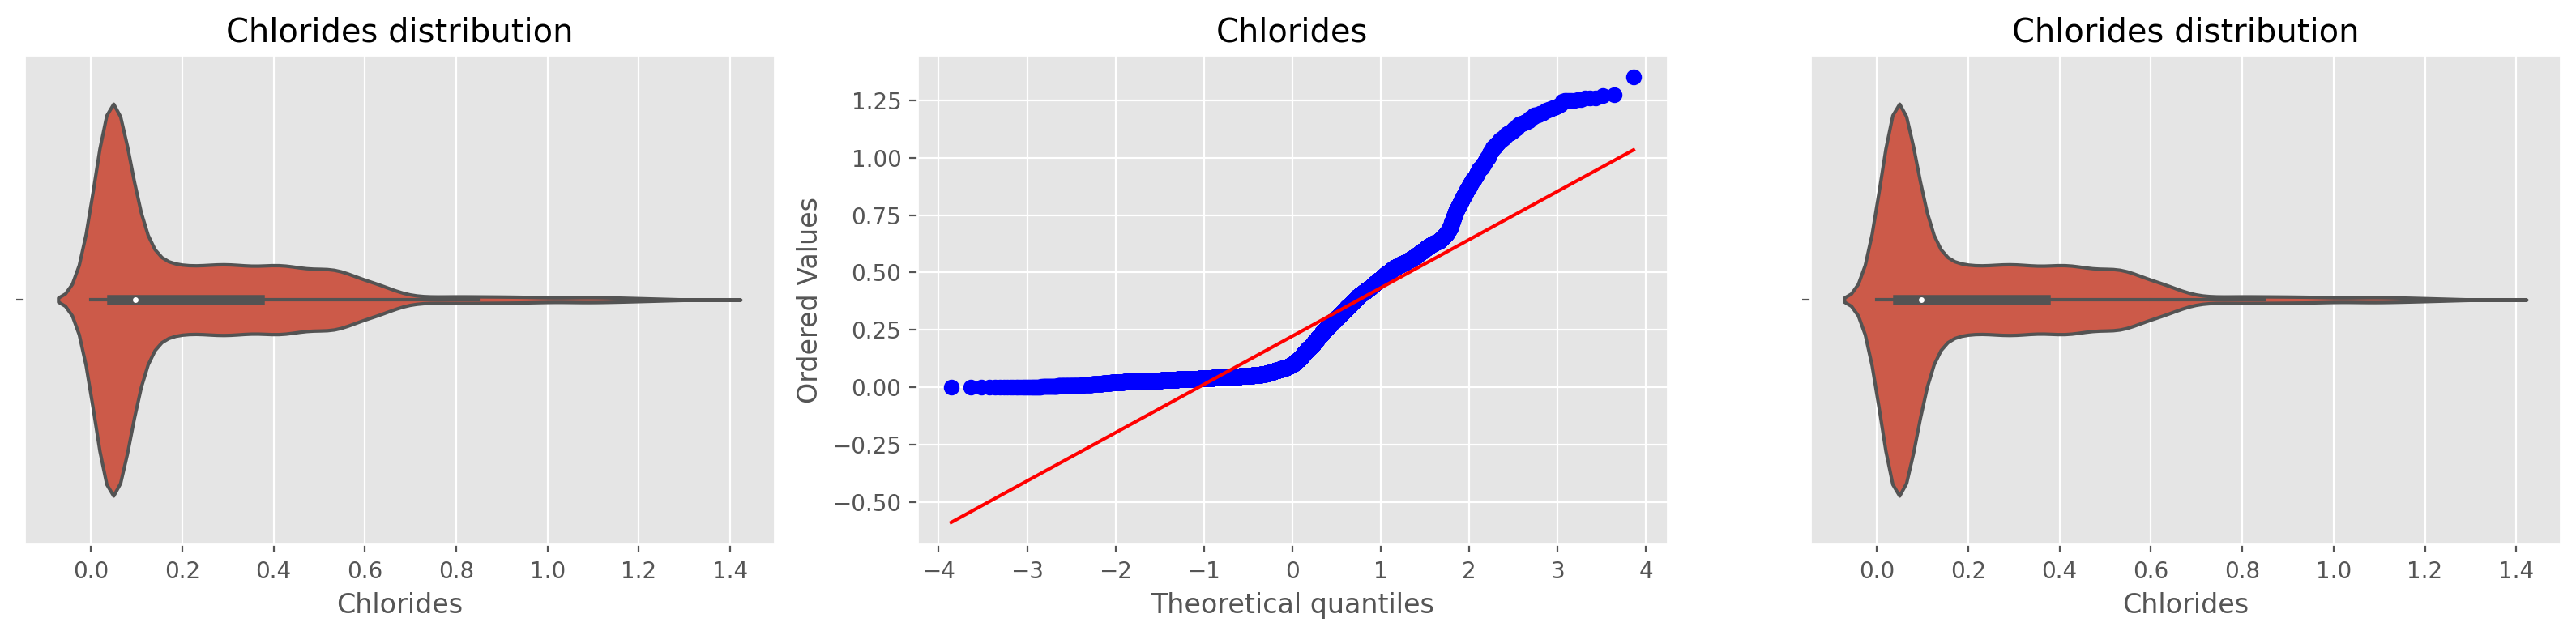

In [40]:
# Chlorides, getting the non-null values (4.98% of the values)
chlorides_notna = df['Chlorides'].dropna()

# Showing distribution and probability plot using violin plot
fig = plt.figure(figsize=(16, 4))

# Violin Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=chlorides_notna)
plt.title("Chlorides distribution")
plt.xlabel('Chlorides')

# Probability Plot
plt.subplot(1, 3, 2)
probplot(chlorides_notna, plot=plt)
plt.title("Chlorides")

# Violin Plot (Alternative to Boxplot)
plt.subplot(1, 3, 3)
plt.xlabel('Distribution')
sns.violinplot(x=chlorides_notna)
plt.title("Chlorides distribution")

plt.tight_layout()
plt.show()


C:\Users\admin\AppData\Local\Temp\ipykernel_23780\3810253389.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(freeSulfurDioxide_notna, kde=False);


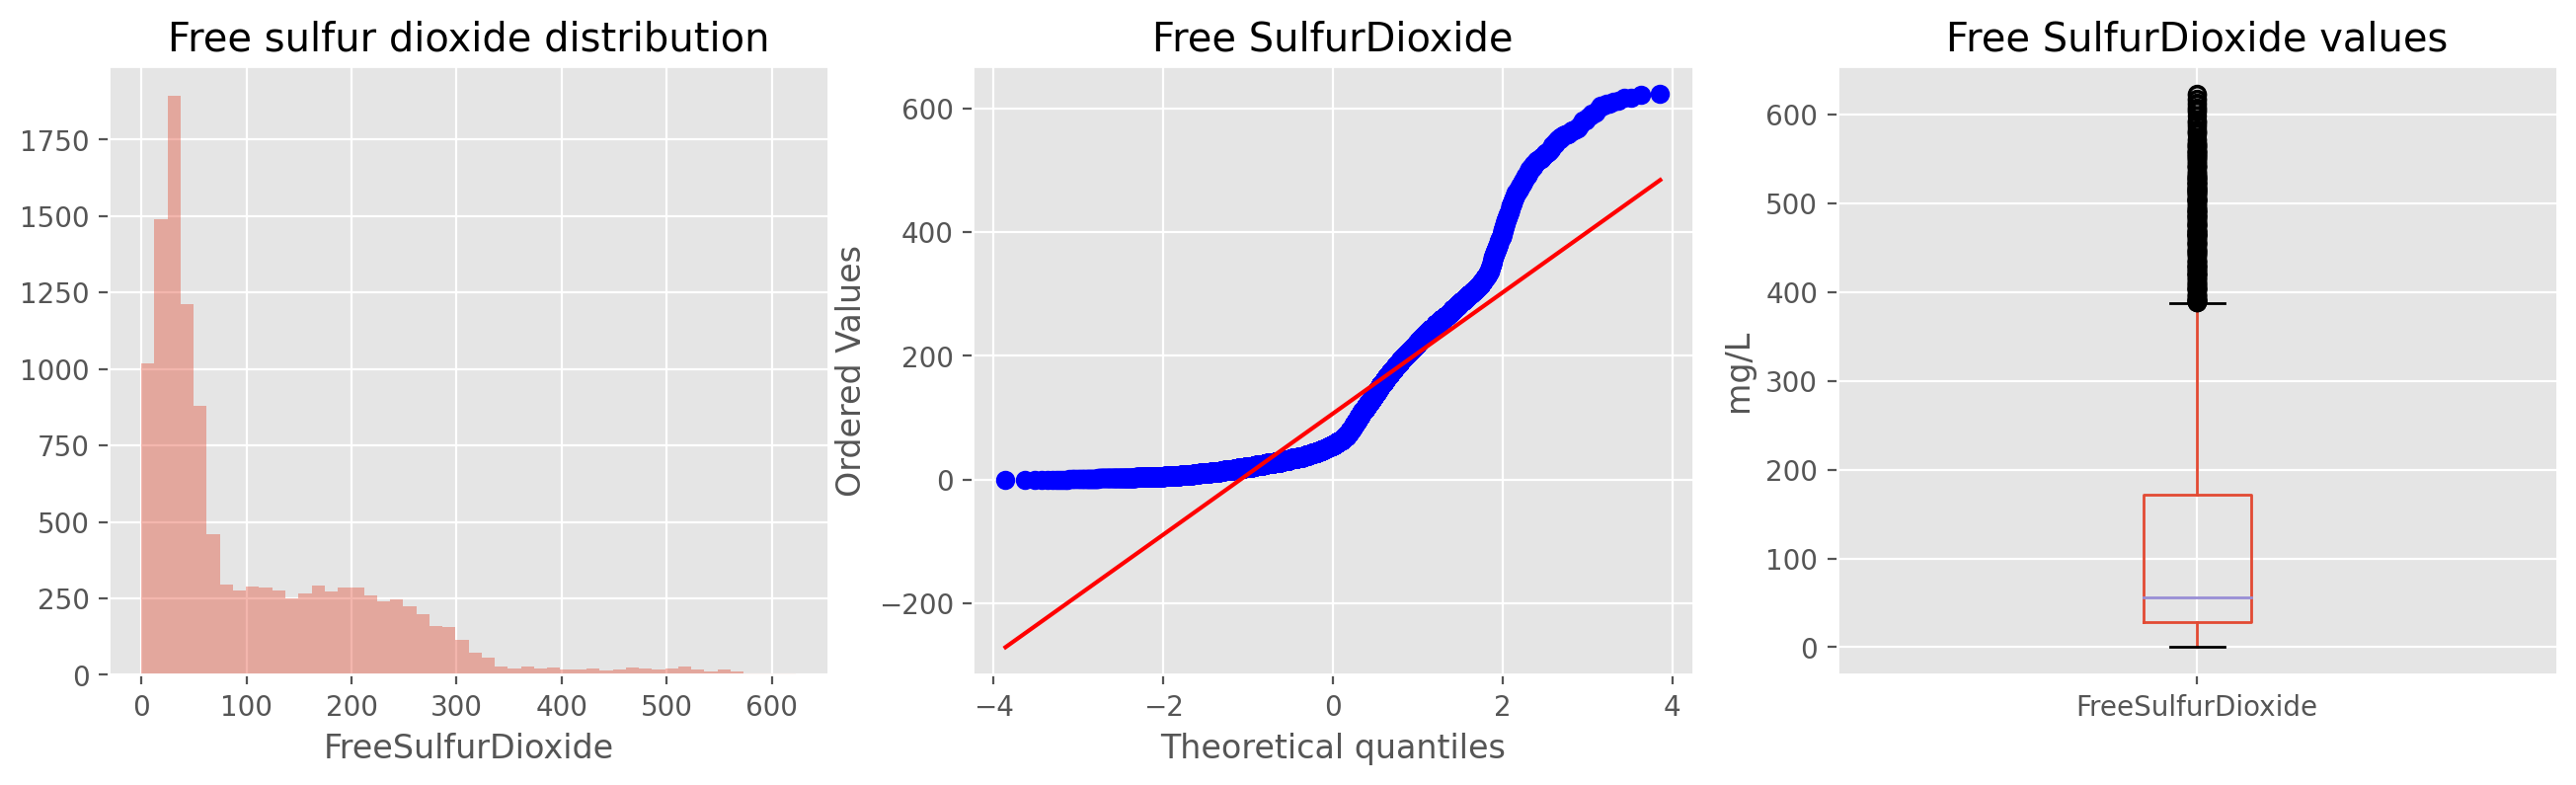

In [32]:
#FreeSulfurDioxide, getting the non null values (5.05% of the values)
freeSulfurDioxide_notna=df[df['FreeSulfurDioxide'].notnull()]['FreeSulfurDioxide']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(freeSulfurDioxide_notna, kde=False);
plt.title("Free sulfur dioxide distribution");
plt.xlabel('FreeSulfurDioxide')

plt.subplot(1, 3, 2)
probplot(freeSulfurDioxide_notna, plot = plt);
plt.title("Free SulfurDioxide");

plt.subplot(1, 3, 3)
plt.ylabel('mg/L')
df.boxplot(column='FreeSulfurDioxide');
plt.title("Free SulfurDioxide values");

We are unable to have negative values for this data due to its nature, which would suggest a mistake occurred during the creation or collection of the data. It will be necessary to change this feature so that it only contains positive values. Any value over 200 mg/L could be regarded as abnormal. (br>


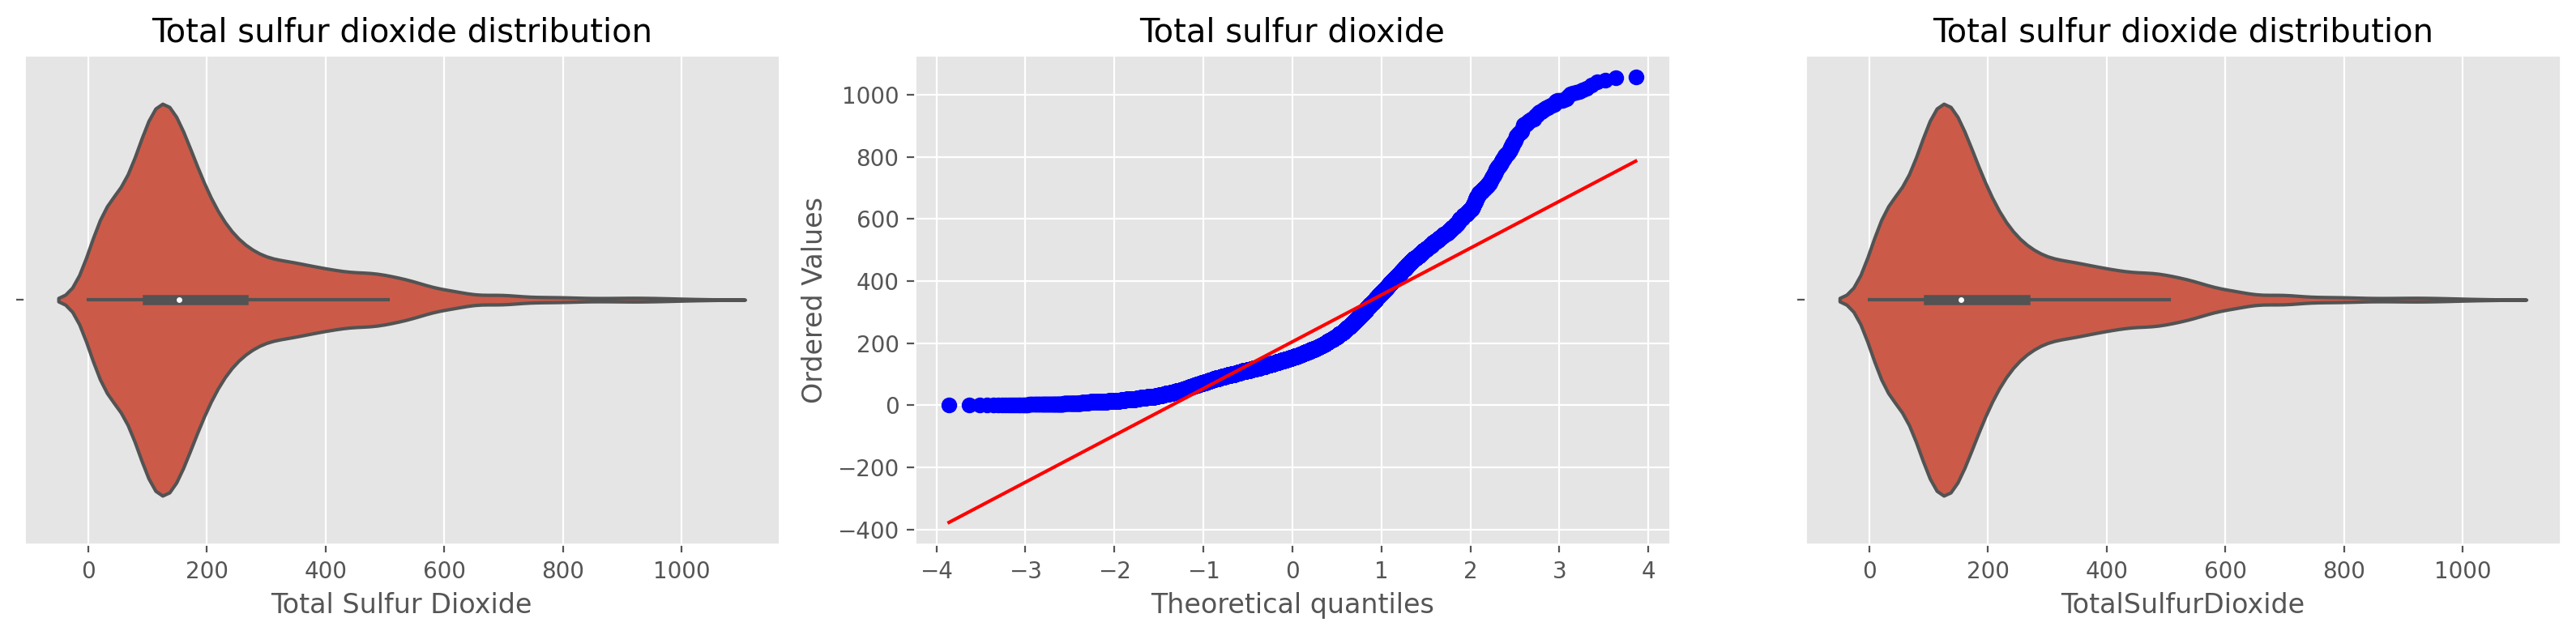

In [42]:
# TotalSulfurDioxide, getting the non-null values (5.3% of the values)
totalSulfurDioxide_notna = df['TotalSulfurDioxide'].dropna()

# Showing distribution and probability plot using violin plot
fig = plt.figure(figsize=(16, 4))

# Violin Plot
plt.subplot(1, 3, 1)
sns.violinplot(x=totalSulfurDioxide_notna)
plt.title("Total sulfur dioxide distribution")
plt.xlabel('Total Sulfur Dioxide')

# Probability Plot
plt.subplot(1, 3, 2)
probplot(totalSulfurDioxide_notna, plot=plt)
plt.title("Total sulfur dioxide")

# Violin Plot (Alternative to Boxplot)
plt.subplot(1, 3, 3)
plt.xlabel('Distribution')
sns.violinplot(x=totalSulfurDioxide_notna)
plt.title("Total sulfur dioxide distribution")

plt.tight_layout()
plt.show()


Sulfur dioxide, which is listed on wine labels as "preservative 220," "minimal sulfur dioxide added," or "contains sulphites," is the primary preservative used in wine. During the winemaking process, sulfur dioxide is added to the wine to prevent oxidation and bacterial spoiling. 
We are unable to have negative values for this data due to its nature, which would suggest a mistake occurred during the creation or collection of the data. It will be necessary to change this feature so that it only contains positive values.



C:\Users\admin\AppData\Local\Temp\ipykernel_23780\1698780758.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Density"], kde=False);


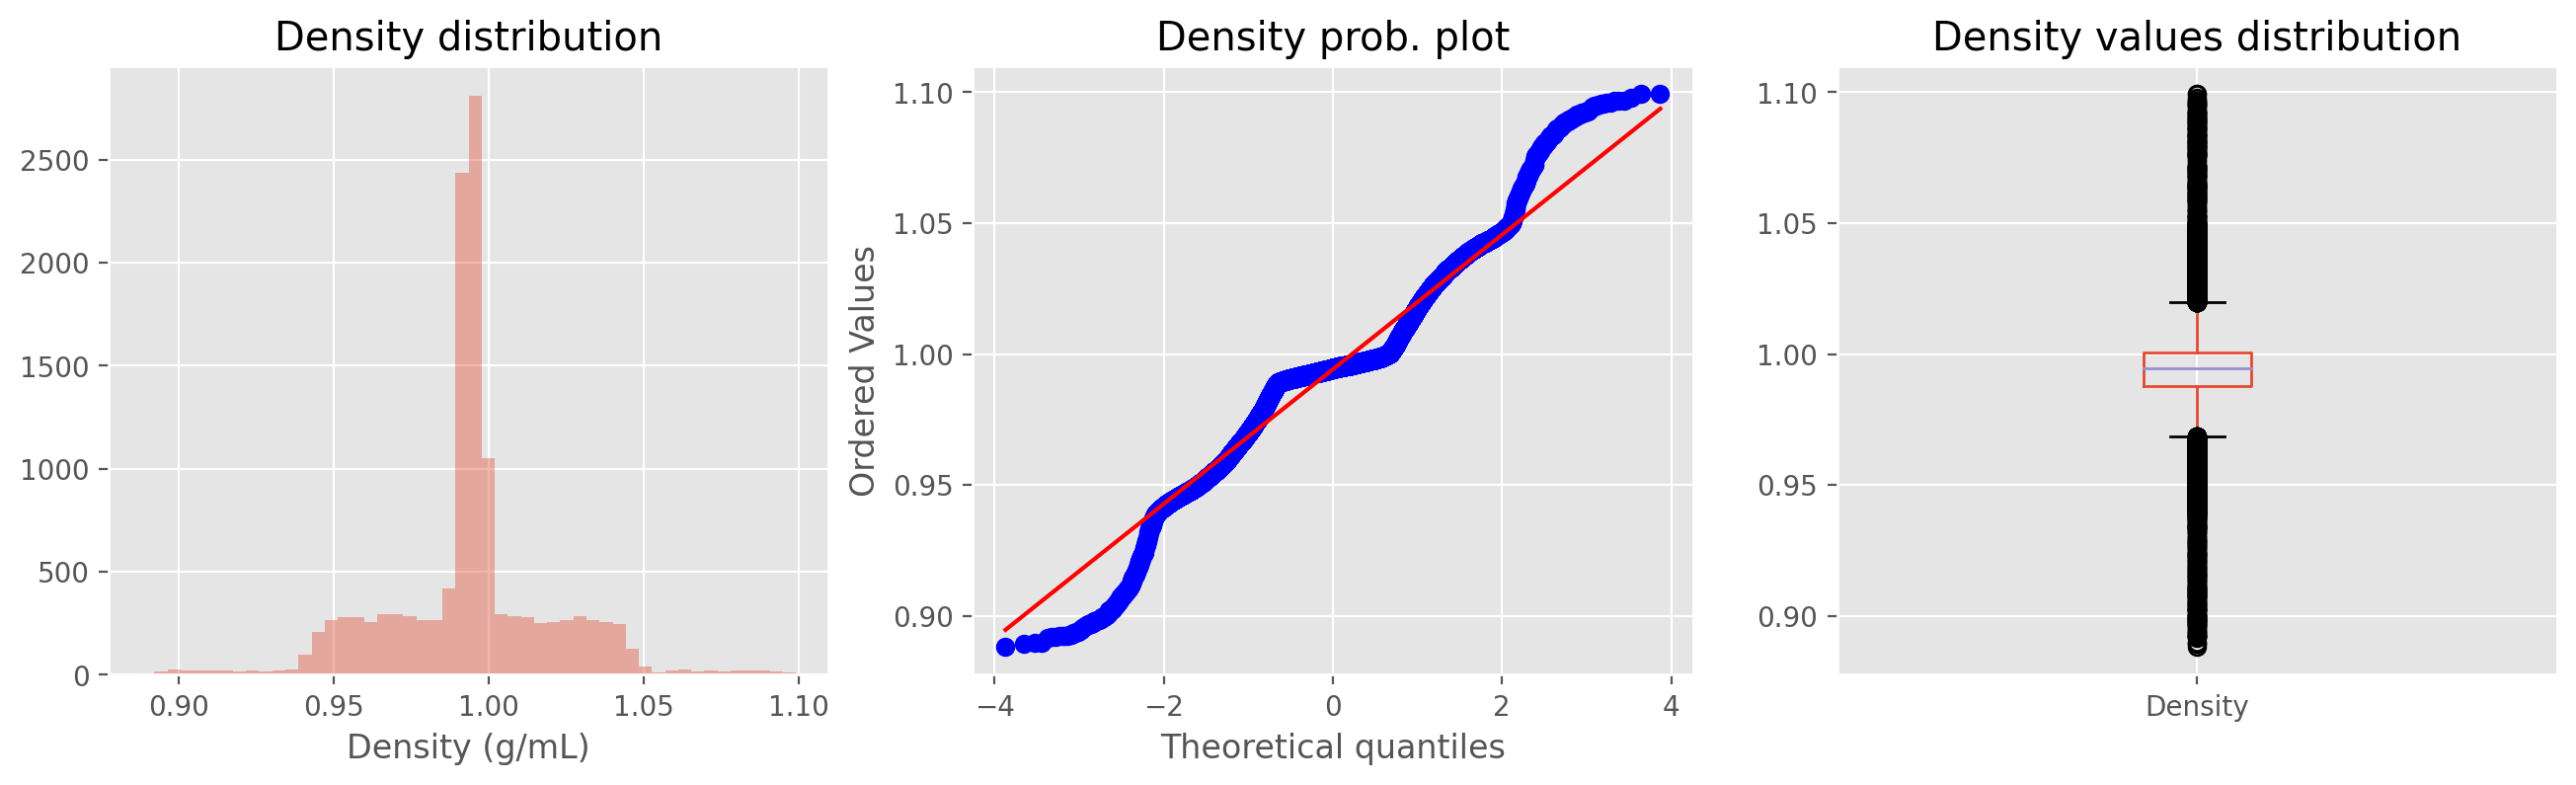

In [34]:
#Density, there are no null values
#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
plt.xlabel('g/L')
sns.distplot(df["Density"], kde=False);
plt.title("Density distribution");
plt.xlabel('Density (g/mL)')

plt.subplot(1, 3, 2)
probplot(df["Density"], plot = plt);
plt.title("Density prob. plot");

plt.subplot(1, 3, 3)
#plt.ylabel('g/mL')
df.boxplot(column='Density');
plt.title("Density values distribution");

C:\Users\admin\AppData\Local\Temp\ipykernel_23780\4250533810.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sulphates_notna, kde=False);


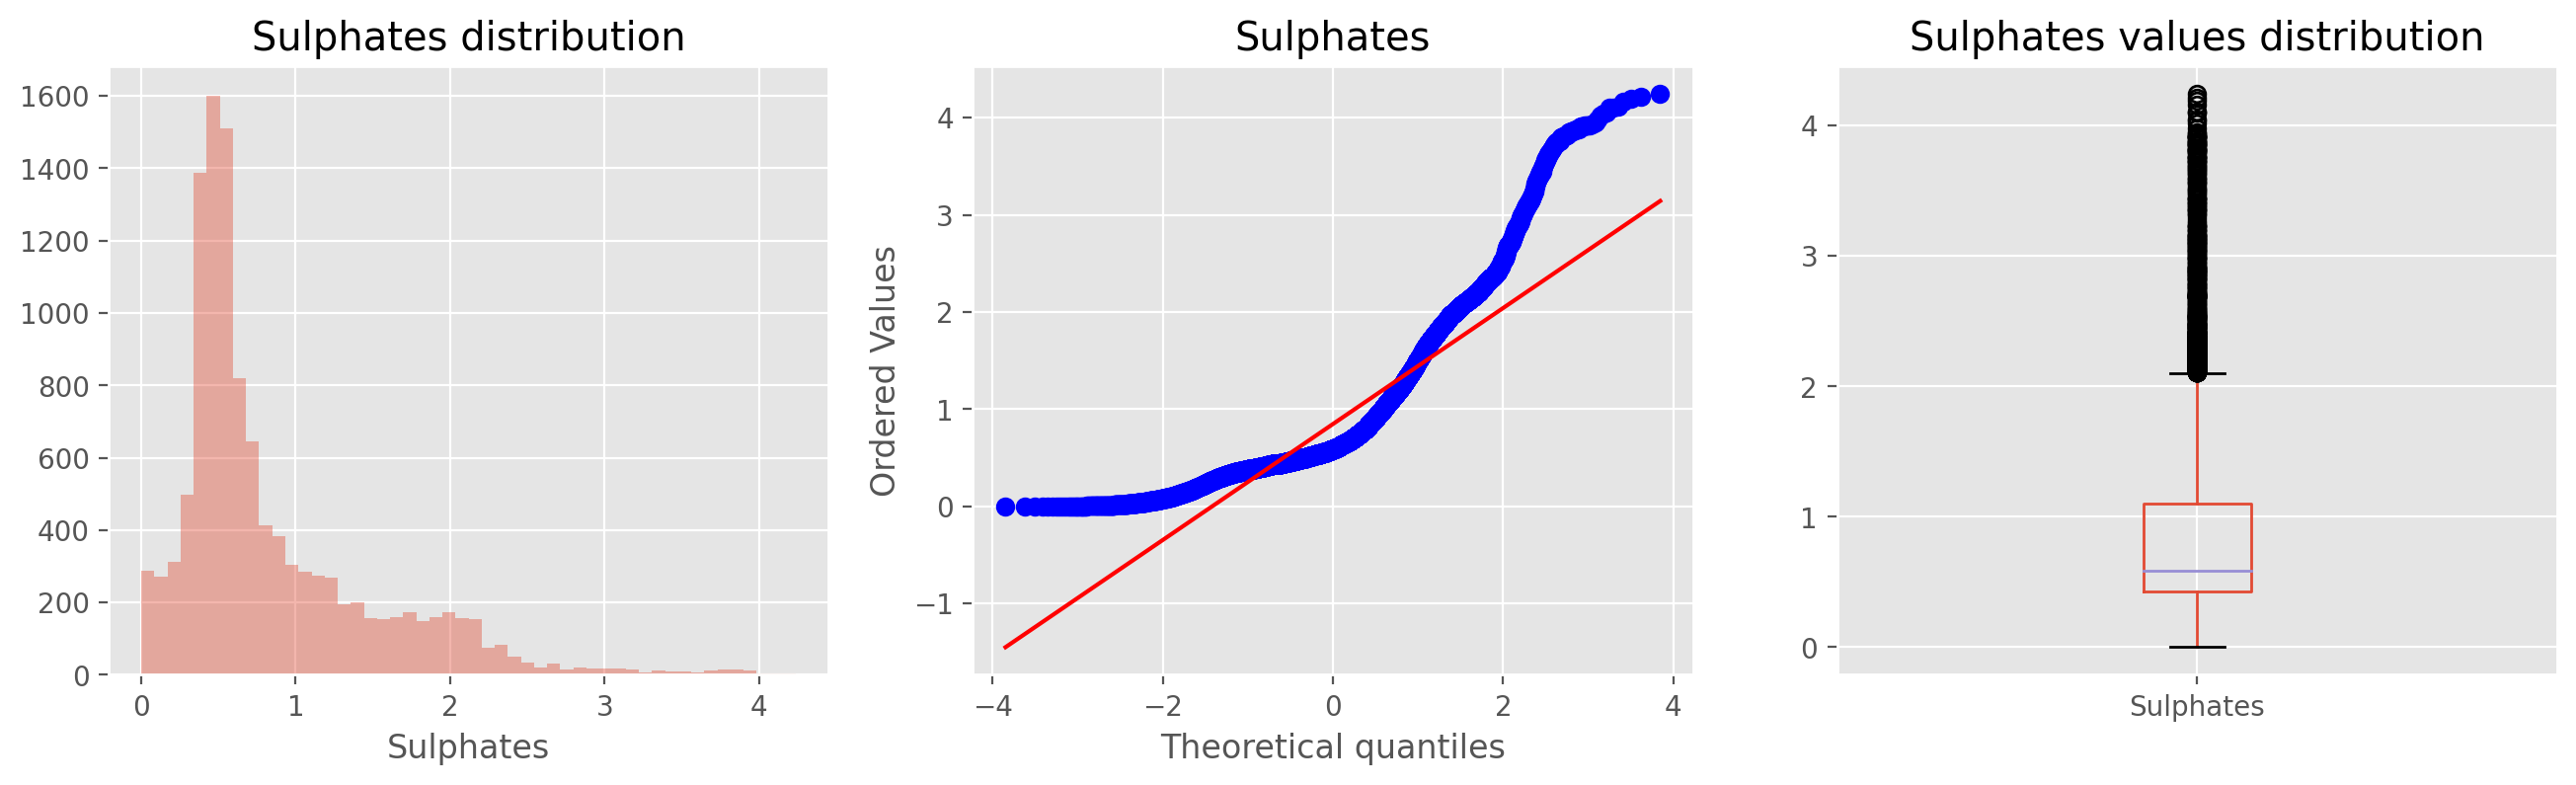

In [35]:
#Sulphates, getting the non null values (9.45% of the values)
sulphates_notna=df[df['Sulphates'].notnull()]['Sulphates']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(sulphates_notna, kde=False);
plt.title("Sulphates distribution");
plt.xlabel('Sulphates')

plt.subplot(1, 3, 2)
probplot(sulphates_notna, plot = plt);
plt.title("Sulphates");

plt.subplot(1, 3, 3)
df.boxplot(column='Sulphates');
plt.title("Sulphates values distribution");

C:\Users\admin\AppData\Local\Temp\ipykernel_23780\4037580254.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(alcohol_notna, kde=False);


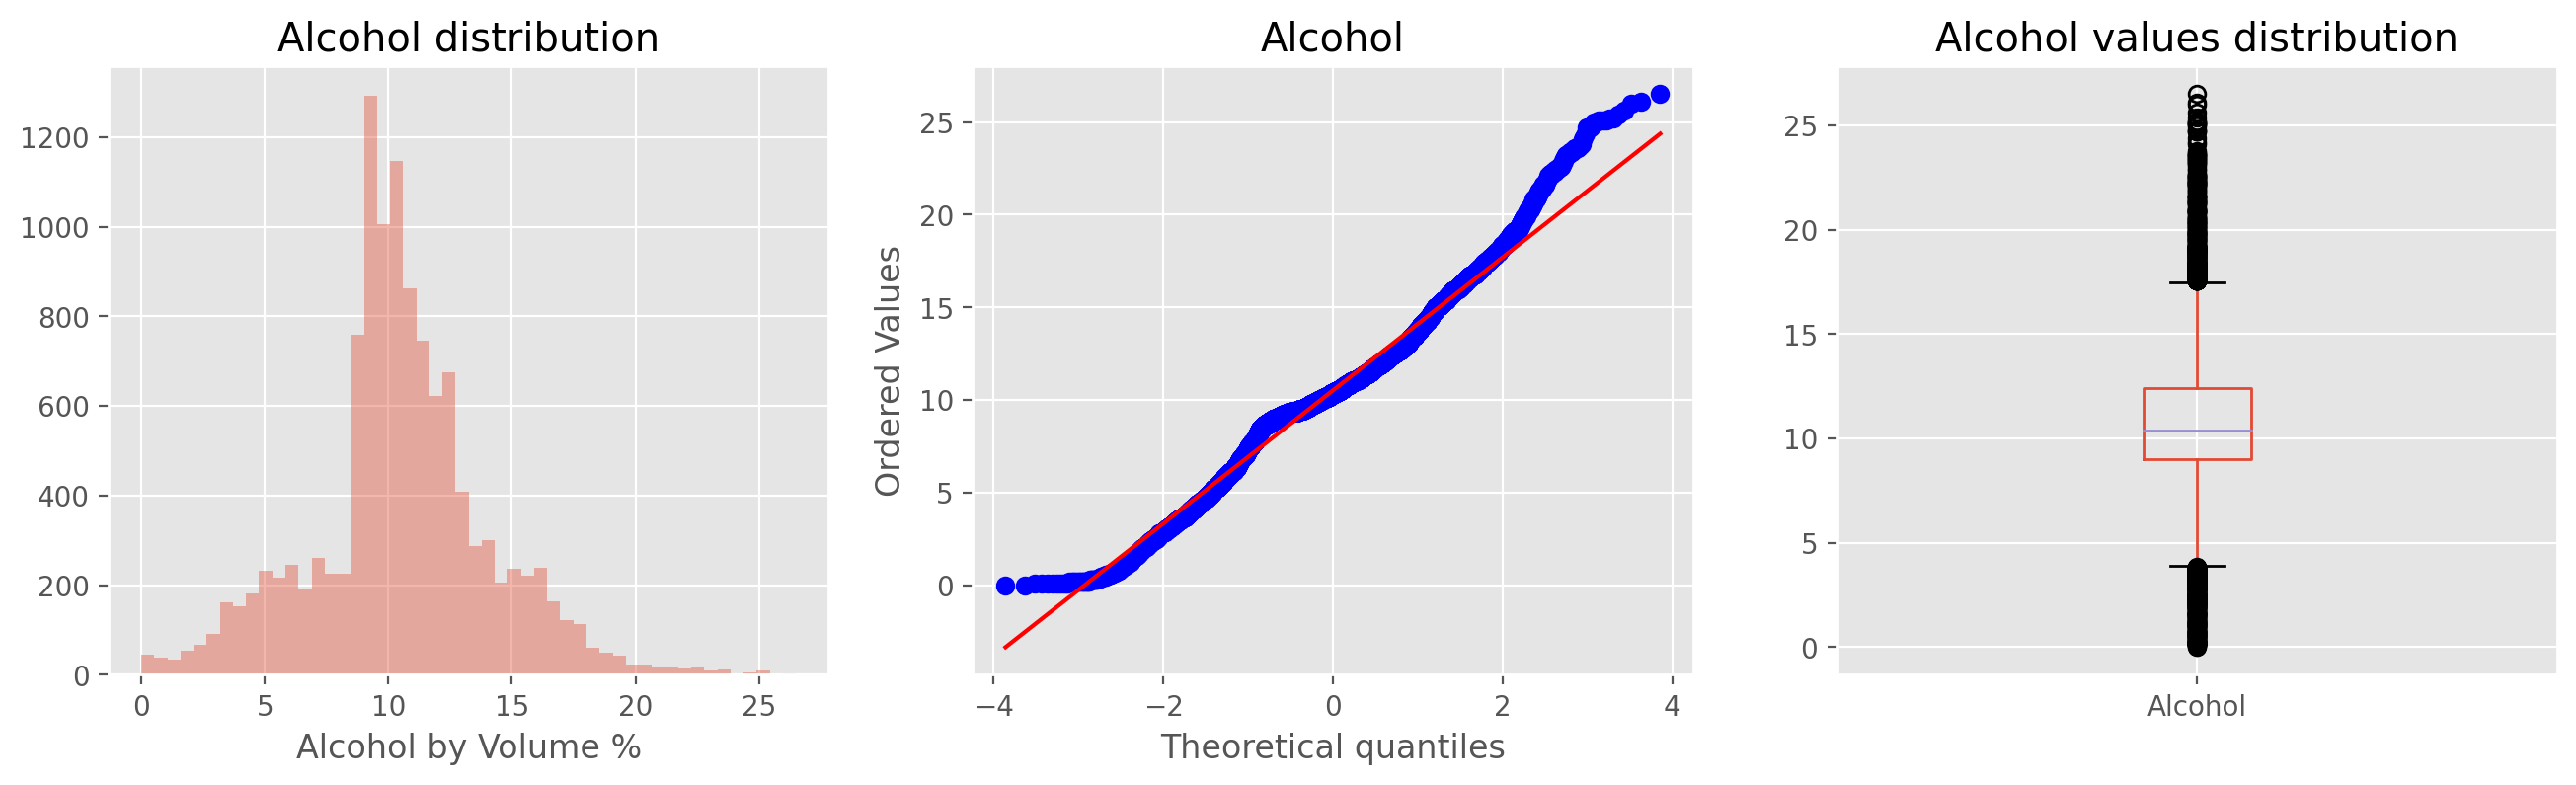

In [43]:
#Alcohol, getting the non null values (5.1% of the values)
alcohol_notna=df[df['Alcohol'].notnull()]['Alcohol']

#showing distribution and probability plot
fig = plt.figure(figsize=(16,4))
plt.subplot(1, 3, 1)
sns.distplot(alcohol_notna, kde=False);
plt.title("Alcohol distribution");
plt.xlabel('Alcohol by Volume %')

plt.subplot(1, 3, 2)
probplot(alcohol_notna, plot = plt);
plt.title("Alcohol");

plt.subplot(1, 3, 3)
df.boxplot(column='Alcohol');
plt.title("Alcohol values distribution");

Given that wine bottles can contain anywhere from 5% to 21% ABV (alcohol by volume), as stated in the article below, we can see certain negative figures that will need to be removed or altered in addition to some outliers.


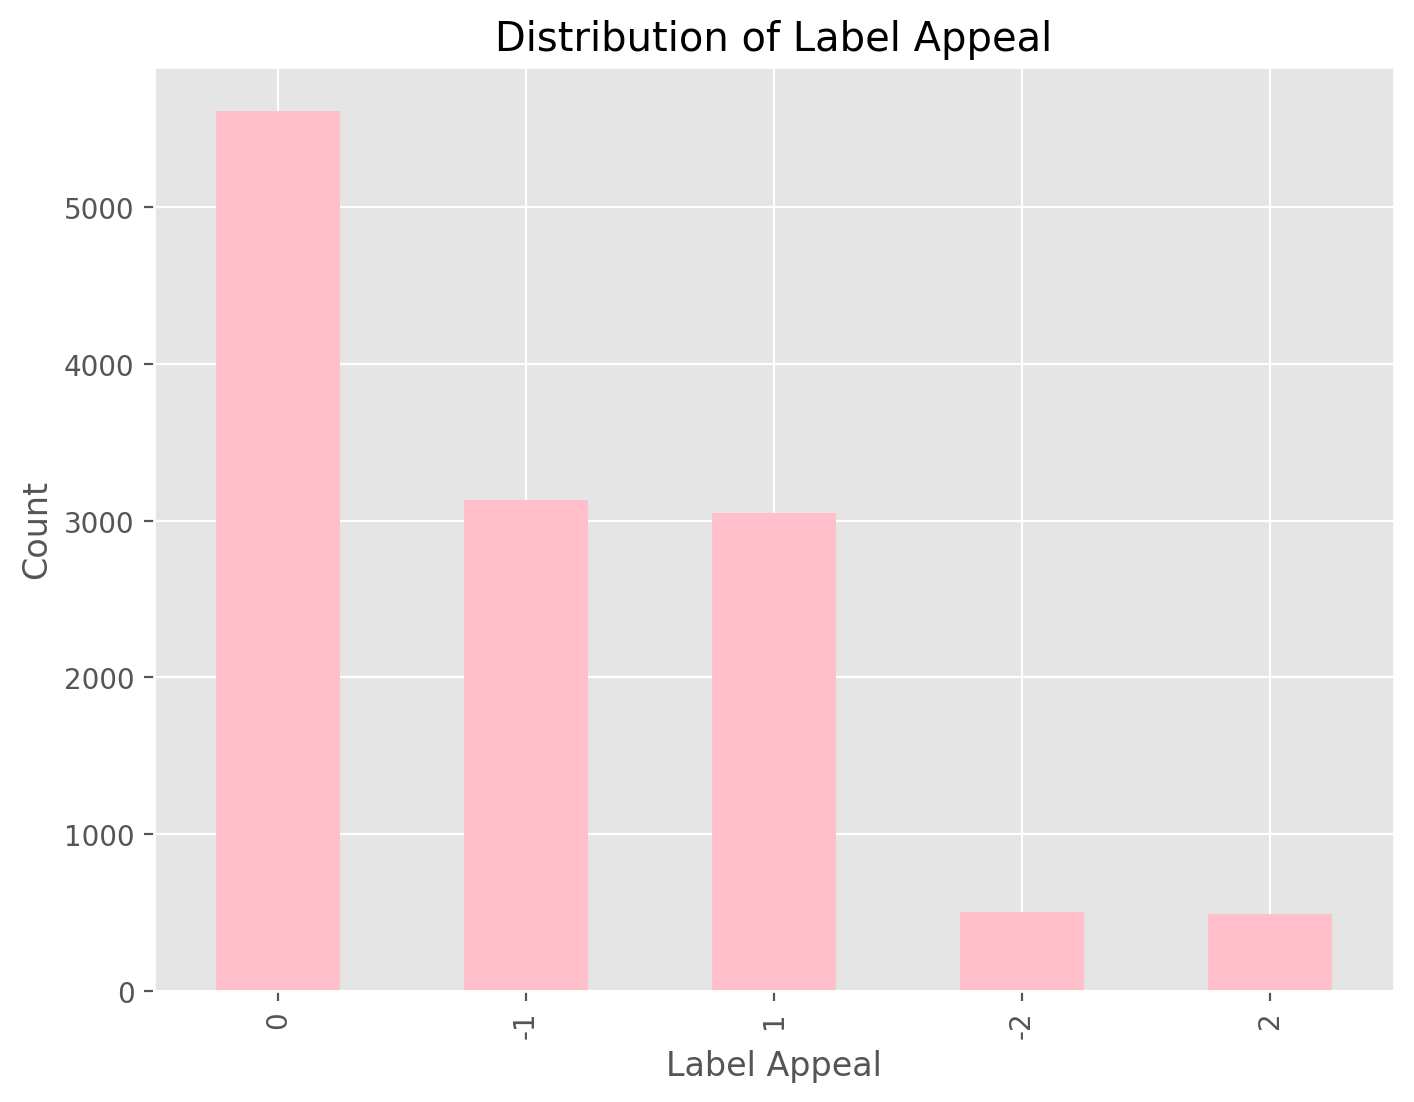

In [46]:
# LabelAppeal
label_appeal_counts = df['LabelAppeal'].value_counts()

# Bar plot
fig, ax = plt.subplots(figsize=(8, 6))
label_appeal_counts.plot(kind='bar', color='pink', ax=ax)
ax.set_xlabel('Label Appeal')
ax.set_ylabel('Count')
ax.set_title('Distribution of Label Appeal')

plt.show()


Balanced Distribution: The numbers for every degree of label appeal are displayed in the plot. The distribution across the various appeal levels seems to be fairly balanced.

Common Label Appeals: Based on their greater tallies than other levels, label appeal levels 7, 8, and 9 appear to be more common.

Low Appeal Instances: Less wine with label appeal levels 0, 1, and 2 is found in the sample, indicating a decreased frequency of wines with lower label appeal.

Understanding the distribution and prevalence of label appeal levels in the dataset can be aided by these insights, and the knowledge gained may be useful for additional research or modeling.

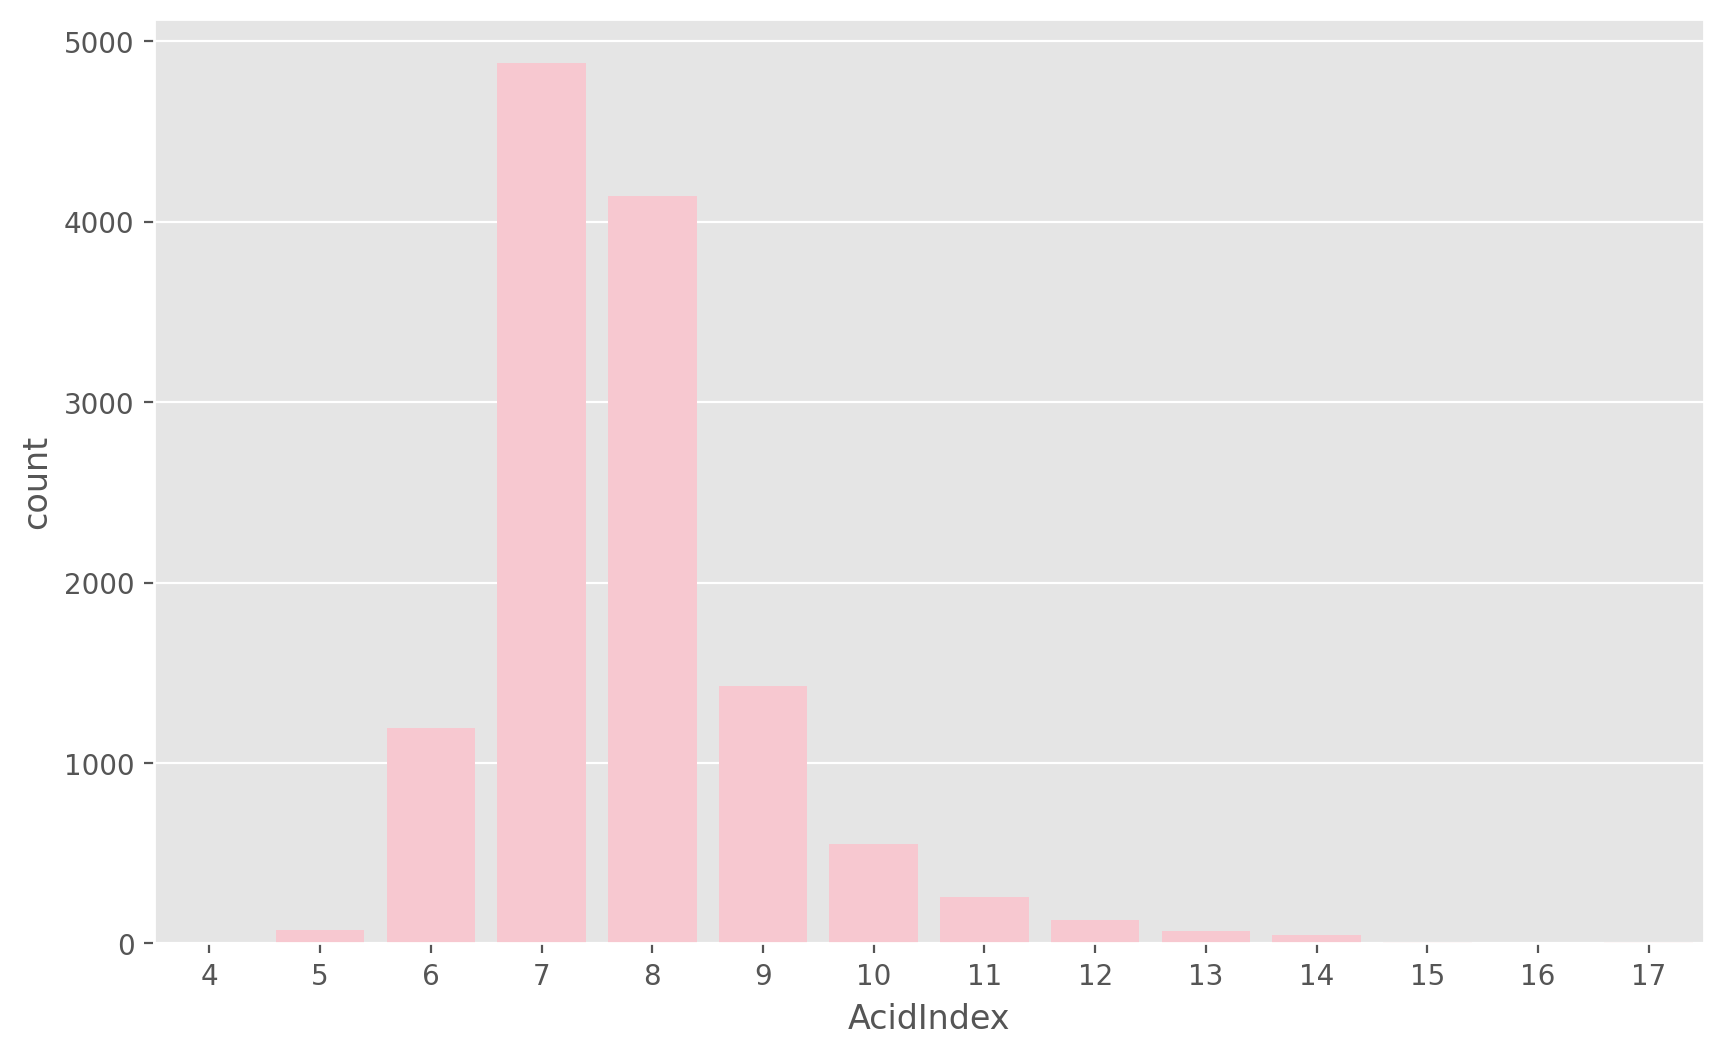

In [47]:
#AcidIndex, there are no null values
sns.countplot(x="AcidIndex",data=df, color='pink');

It is evident that the values vary from 4 to 17, with the majority of the records having an AcidIndex of 6 to 9. We are aware that this characteristic uses a weighted average to quantify the overall acidity of wine, but we don't know much about the index's creation. As a result, we can mix values and spare classes to improve analysis and prevent overfitting. As an illustration:
-7 =\ AcidIndex < 10 => AcidIndex_low - 4 =\ AcidIndex < 7 => AcidIndex => AcidIndex_medium - 10 High Acid Index

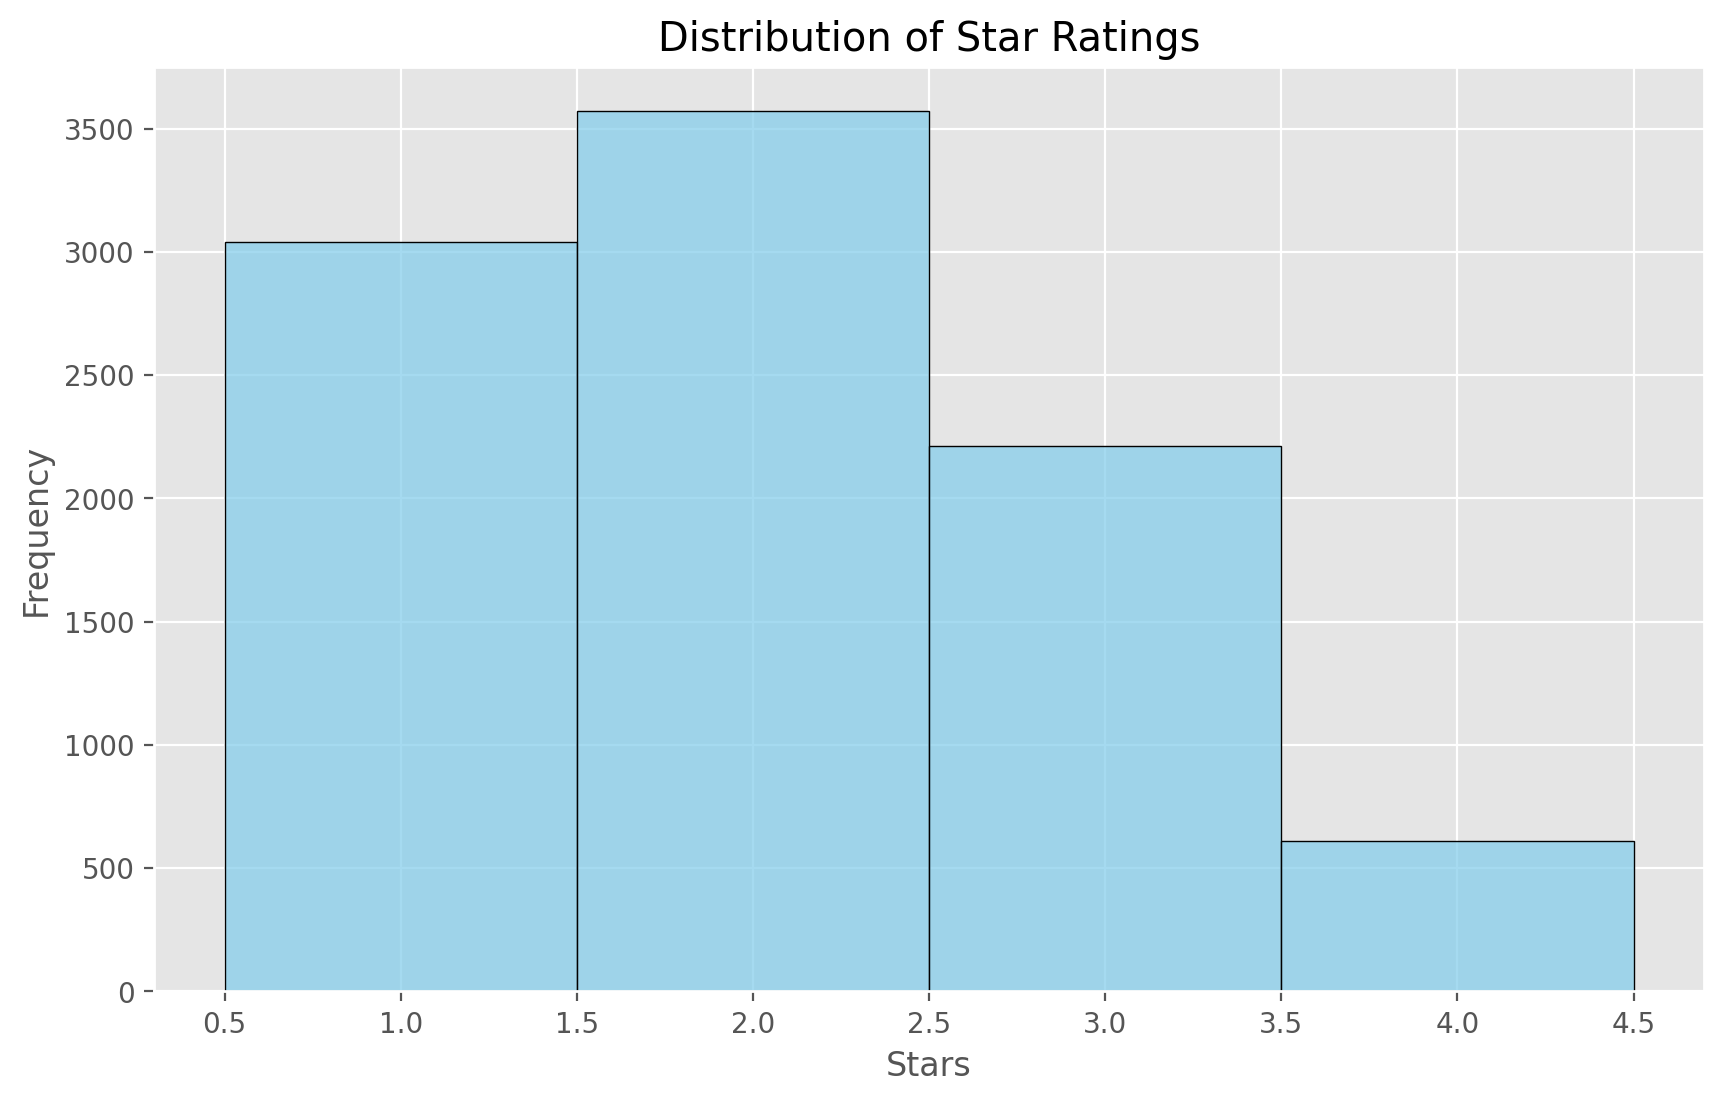

In [49]:
# STARS Distribution
fig = plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="STARS", bins=range(1, 6), color='skyblue', edgecolor='black', discrete=True)
plt.title('Distribution of Star Ratings')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.show()


Since there are approximately 26.2% of missing values in STARS, which stands for expert-rated wine (4 = outstanding; 1 = poor), and since this may have some predictive ability for the answer, we can turn the missing values into a dummy variable and combine them with the current 4 values as follows:
- STARS = null => Stars = 1 - Rating_notreviewed => Poor rating
- STARS = 2 => Good rating - 3 stars => Rating: Excellent - 4 stars Rank: outstanding

This will make it possible to separate apart the effects of every individual STAR level in a machine learning model.

## Data Preparation

### Changes to the STAR column

In [50]:
#showing first 5 records
df.STARS.head()

0    2.0
1    3.0
2    3.0
3    1.0
4    2.0
Name: STARS, dtype: float64

In [51]:
#checking null values before transformations
df['STARS'].isnull().sum()

3359

Here we consider that records with null values mean that they did not receive a formal review.

In [52]:
#filling null values with zero
df['STARS'].fillna(0, inplace=True)

#sanity check
df['STARS'].isnull().sum()

0

In [54]:
#get dummy variables based on STARS
# Create dummy variables based on STARS
stars_dummies = pd.get_dummies(df['STARS'], prefix='STARS')

# Rename column names for better clarity
stars_dummies.columns = ['not_reviewed',
                          'poor_rating',
                          'good_rating',
                          'very_good_rating',
                          'excellent_rating']

# Display the first few rows of the dummy variables
stars_dummies.head()


not_reviewed  poor_rating  good_rating  very_good_rating  excellent_rating
0             0            0            1                 0                 0
1             0            0            0                 1                 0
2             0            0            0                 1                 0
3             0            1            0                 0                 0
4             0            0            1                 0                 0

In [55]:
# merge the dummy variables with the original data (excluding index column)
df_with_dummy = df.iloc[:,1:].join(dummies)

#drop column STARS
df_with_dummy.drop(columns=['STARS'], inplace=True)

#sanity check
df_with_dummy.head()

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160        0.98           54.2   
1      2       3           4.5            0.160        0.81           26.1   
2      4       5           7.1            2.640        0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330        1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density    pH  Sulphates  \
0      0.567                NaN               268.0  0.99280  3.33       0.59   
1      0.425               15.0               327.0  1.02792  3.38       0.70   
2      0.037              214.0               142.0  0.99518  3.12       0.48   
3      0.425               22.0               115.0  0.99640  2.24       1.83   
4        NaN              167.0               108.0  0.99457  3.12       1.77   

   Alcohol  LabelAppeal  AcidIndex  rating_notreviewed  rating_poor  \
0      9.9            0          8                   0            0   
1      NaN           -1          7                   0            0   
2     22.0           -1          8                   0            0   
3      6.2           -1          6                   0            1   
4     13.7            0          9                   0            0   

   rating_good  rating_verygood  rating_excellent  
0            1                0                 0  
1            0                1                 0  
2            0                1                 0  
3            0                0                 0  
4            1                0                 0

As we can see, there are new columns to the right of the dataframe that match the rating values for that specific wine.

### Changes to the AcidIndex column

In [56]:
#create a new column based on bucketing the ones that exist for the AcidIndex
df_with_dummy['AcidIndex'].head()

0    8
1    7
2    8
3    6
4    9
Name: AcidIndex, dtype: int64

In [57]:
#define a list that will contain the corresponding values per each range
# Initialize an empty list for the new AcidIndex categories
acid_index_new = []

# Iterate through AcidIndex and categorize values into new ranges
# 4 <= AcidIndex < 7 => AcidIndex_low
# 7 <= AcidIndex < 10 => AcidIndex_medium
# 10 <= AcidIndex => AcidIndex_high
for value in df_with_dummy['AcidIndex']:
    if value < 7:
        acid_index_new.append('AcidIndex_low')
    elif 7 <= value < 10:
        acid_index_new.append('AcidIndex_medium')
    elif value >= 10:
        acid_index_new.append('AcidIndex_high')

# Create a new column based on the categorized values
df_with_dummy['AcidIndex_new'] = acid_index_new

# Display the first few rows for a sanity check
df_with_dummy.head()


INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160        0.98           54.2   
1      2       3           4.5            0.160        0.81           26.1   
2      4       5           7.1            2.640        0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330        1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  ...  Sulphates  \
0      0.567                NaN               268.0  0.99280  ...       0.59   
1      0.425               15.0               327.0  1.02792  ...       0.70   
2      0.037              214.0               142.0  0.99518  ...       0.48   
3      0.425               22.0               115.0  0.99640  ...       1.83   
4        NaN              167.0               108.0  0.99457  ...       1.77   

   Alcohol  LabelAppeal  AcidIndex  rating_notreviewed  rating_poor  \
0      9.9            0          8                   0            0   
1      NaN           -1          7                   0            0   
2     22.0           -1          8                   0            0   
3      6.2           -1          6                   0            1   
4     13.7            0          9                   0            0   

   rating_good  rating_verygood  rating_excellent     AcidIndex_new  
0            1                0                 0  AcidIndex_medium  
1            0                1                 0  AcidIndex_medium  
2            0                1                 0  AcidIndex_medium  
3            0                0                 0     AcidIndex_low  
4            1                0                 0  AcidIndex_medium  

[5 rows x 21 columns]

In [58]:
#get dummy variables based on AcidIndex_new
dummies = pd.get_dummies(df_with_dummy['AcidIndex_new'])

# merge the dummy variables with the original data (excluding index column)
df_with_dummy = df_with_dummy.join(dummies)

#drop column AcidIndex
df_with_dummy.drop(columns=['AcidIndex', 'AcidIndex_new'], inplace=True)

#sanity check
df_with_dummy.head()

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160        0.98           54.2   
1      2       3           4.5            0.160        0.81           26.1   
2      4       5           7.1            2.640        0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330        1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  ...  Alcohol  \
0      0.567                NaN               268.0  0.99280  ...      9.9   
1      0.425               15.0               327.0  1.02792  ...      NaN   
2      0.037              214.0               142.0  0.99518  ...     22.0   
3      0.425               22.0               115.0  0.99640  ...      6.2   
4        NaN              167.0               108.0  0.99457  ...     13.7   

   LabelAppeal  rating_notreviewed  rating_poor  rating_good  rating_verygood  \
0            0                   0            0            1                0   
1           -1                   0            0            0                1   
2           -1                   0            0            0                1   
3           -1                   0            1            0                0   
4            0                   0            0            1                0   

   rating_excellent  AcidIndex_high  AcidIndex_low  AcidIndex_medium  
0                 0               0              0                 1  
1                 0               0              0                 1  
2                 0               0              0                 1  
3                 0               0              1                 0  
4                 0               0              0                 1  

[5 rows x 22 columns]

### Changes to the LabelAppeal

In [59]:
#get dummy variables based on STARS
dummies = pd.get_dummies(df['LabelAppeal'], prefix='LabelAppeal')

#renaming column names
dummies.columns = ['LabelAppeal_verypoor',
                'LabelAppeal_poor',
                'LabelAppeal_neutral',
                'LabelAppeal_good',
                'LabelAppeal_verygood']
#sanity check
dummies.head()

LabelAppeal_verypoor  LabelAppeal_poor  LabelAppeal_neutral  \
0                     0                 0                    1   
1                     0                 1                    0   
2                     0                 1                    0   
3                     0                 1                    0   
4                     0                 0                    1   

   LabelAppeal_good  LabelAppeal_verygood  
0                 0                     0  
1                 0                     0  
2                 0                     0  
3                 0                     0  
4                 0                     0

In [60]:
# merge the dummy variables with the original data (excluding index column)
df_with_dummy = df_with_dummy.join(dummies)

#drop column STARS
df_with_dummy.drop(columns=['LabelAppeal'], inplace=True)

#sanity check
df_with_dummy.head()

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2            1.160        0.98           54.2   
1      2       3           4.5            0.160        0.81           26.1   
2      4       5           7.1            2.640        0.88           14.8   
3      5       3           5.7            0.385        0.04           18.8   
4      6       4           8.0            0.330        1.26            9.4   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  ...  \
0      0.567                NaN               268.0  0.99280  ...   
1      0.425               15.0               327.0  1.02792  ...   
2      0.037              214.0               142.0  0.99518  ...   
3      0.425               22.0               115.0  0.99640  ...   
4        NaN              167.0               108.0  0.99457  ...   

   rating_verygood  rating_excellent  AcidIndex_high  AcidIndex_low  \
0                0                 0               0              0   
1                1                 0               0              0   
2                1                 0               0              0   
3                0                 0               0              1   
4                0                 0               0              0   

   AcidIndex_medium  LabelAppeal_verypoor  LabelAppeal_poor  \
0                 1                     0                 0   
1                 1                     0                 1   
2                 1                     0                 1   
3                 0                     0                 1   
4                 1                     0                 0   

   LabelAppeal_neutral  LabelAppeal_good  LabelAppeal_verygood  
0                    1                 0                     0  
1                    0                 0                     0  
2                    0                 0                     0  
3                    0                 0                     0  
4                    1                 0                     0  

[5 rows x 26 columns]

### Changes to several numeric continuous variables

As we observed in the EDA section, a few of the attributes had negative values. Our investigation leads us to the conclusion that these attributes should be replaced. In the event that we assume there was a data entry error, we can use the absolute value to swap out the negative for the positive. (br>
A dataframe summarizing the number of negatives and null values in each column can be found below.

In [61]:
#creating a dictionary with the count of null and negative values
d = {'null_count':null_count,'negative_count':negatives_count}
new_df=pd.DataFrame(d)
new_df

null_count  negative_count
AcidIndex                    0             0.0
Alcohol                    653             0.0
Chlorides                  638             0.0
CitricAcid                   0             0.0
Density                      0             0.0
FixedAcidity                 0             0.0
FreeSulfurDioxide          647             0.0
INDEX                        0             0.0
LabelAppeal                  0          3640.0
ResidualSugar              616             0.0
STARS                     3359             0.0
Sulphates                 1210             0.0
TARGET                       0             0.0
TotalSulfurDioxide         682             0.0
Unnamed: 0                   0             NaN
VolatileAcidity              0             0.0
pH                         395             0.0

It is evident that the absolute value will have an effect on the following columns: total sulfur dioxide, sulphates, alcohol, chlorides, citric acid, fixed acidity, free sulfur dioxide, residual sugar, and volatile acidity. (br>
In this case, negative values in LabelAppeal were deemed to be legitimate.

In [62]:
#checking original dataframe
df_with_dummy.head(1)

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2             1.16        0.98           54.2   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  ...  \
0      0.567                NaN               268.0   0.9928  ...   

   rating_verygood  rating_excellent  AcidIndex_high  AcidIndex_low  \
0                0                 0               0              0   

   AcidIndex_medium  LabelAppeal_verypoor  LabelAppeal_poor  \
0                 1                     0                 0   

   LabelAppeal_neutral  LabelAppeal_good  LabelAppeal_verygood  
0                    1                 0                     0  

[1 rows x 26 columns]

In [63]:
#get absolute values
df_absolute = df_with_dummy.abs()

#sanity check
df_absolute.head(1)

INDEX  TARGET  FixedAcidity  VolatileAcidity  CitricAcid  ResidualSugar  \
0      1       3           3.2             1.16        0.98           54.2   

   Chlorides  FreeSulfurDioxide  TotalSulfurDioxide  Density  ...  \
0      0.567                NaN               268.0   0.9928  ...   

   rating_verygood  rating_excellent  AcidIndex_high  AcidIndex_low  \
0                0                 0               0              0   

   AcidIndex_medium  LabelAppeal_verypoor  LabelAppeal_poor  \
0                 1                     0                 0   

   LabelAppeal_neutral  LabelAppeal_good  LabelAppeal_verygood  
0                    1                 0                     0  

[1 rows x 26 columns]

In [64]:
#drop old columns
columns=['Alcohol', 'Chlorides', 'CitricAcid',
         'FixedAcidity','FreeSulfurDioxide',
         'ResidualSugar', 'Sulphates',
        'TotalSulfurDioxide', 'VolatileAcidity']

df_with_dummy.drop(columns=columns, inplace=True)

In [65]:
#append absolute values
df_with_dummy = df_with_dummy.join(df_absolute[columns])

#sanity check
df_with_dummy.head()

INDEX  TARGET  Density    pH  rating_notreviewed  rating_poor  rating_good  \
0      1       3  0.99280  3.33                   0            0            1   
1      2       3  1.02792  3.38                   0            0            0   
2      4       5  0.99518  3.12                   0            0            0   
3      5       3  0.99640  2.24                   0            1            0   
4      6       4  0.99457  3.12                   0            0            1   

   rating_verygood  rating_excellent  AcidIndex_high  ...  \
0                0                 0               0  ...   
1                1                 0               0  ...   
2                1                 0               0  ...   
3                0                 0               0  ...   
4                0                 0               0  ...   

   LabelAppeal_verygood  Alcohol  Chlorides  CitricAcid  FixedAcidity  \
0                     0      9.9      0.567        0.98           3.2   
1                     0      NaN      0.425        0.81           4.5   
2                     0     22.0      0.037        0.88           7.1   
3                     0      6.2      0.425        0.04           5.7   
4                     0     13.7        NaN        1.26           8.0   

   FreeSulfurDioxide  ResidualSugar  Sulphates  TotalSulfurDioxide  \
0                NaN           54.2       0.59               268.0   
1               15.0           26.1       0.70               327.0   
2              214.0           14.8       0.48               142.0   
3               22.0           18.8       1.83               115.0   
4              167.0            9.4       1.77               108.0   

   VolatileAcidity  
0            1.160  
1            0.160  
2            2.640  
3            0.385  
4            0.330  

[5 rows x 26 columns]

In [66]:
#chequing that there are no negative values, and there aren't
negatives_count=df_with_dummy.iloc[:,1:].where(df_with_dummy.iloc[:,1:]<0).count()
negatives_count

TARGET                  0
Density                 0
pH                      0
rating_notreviewed      0
rating_poor             0
rating_good             0
rating_verygood         0
rating_excellent        0
AcidIndex_high          0
AcidIndex_low           0
AcidIndex_medium        0
LabelAppeal_verypoor    0
LabelAppeal_poor        0
LabelAppeal_neutral     0
LabelAppeal_good        0
LabelAppeal_verygood    0
Alcohol                 0
Chlorides               0
CitricAcid              0
FixedAcidity            0
FreeSulfurDioxide       0
ResidualSugar           0
Sulphates               0
TotalSulfurDioxide      0
VolatileAcidity         0
dtype: int64

Now we have a dataframe with positive values in the respective columns

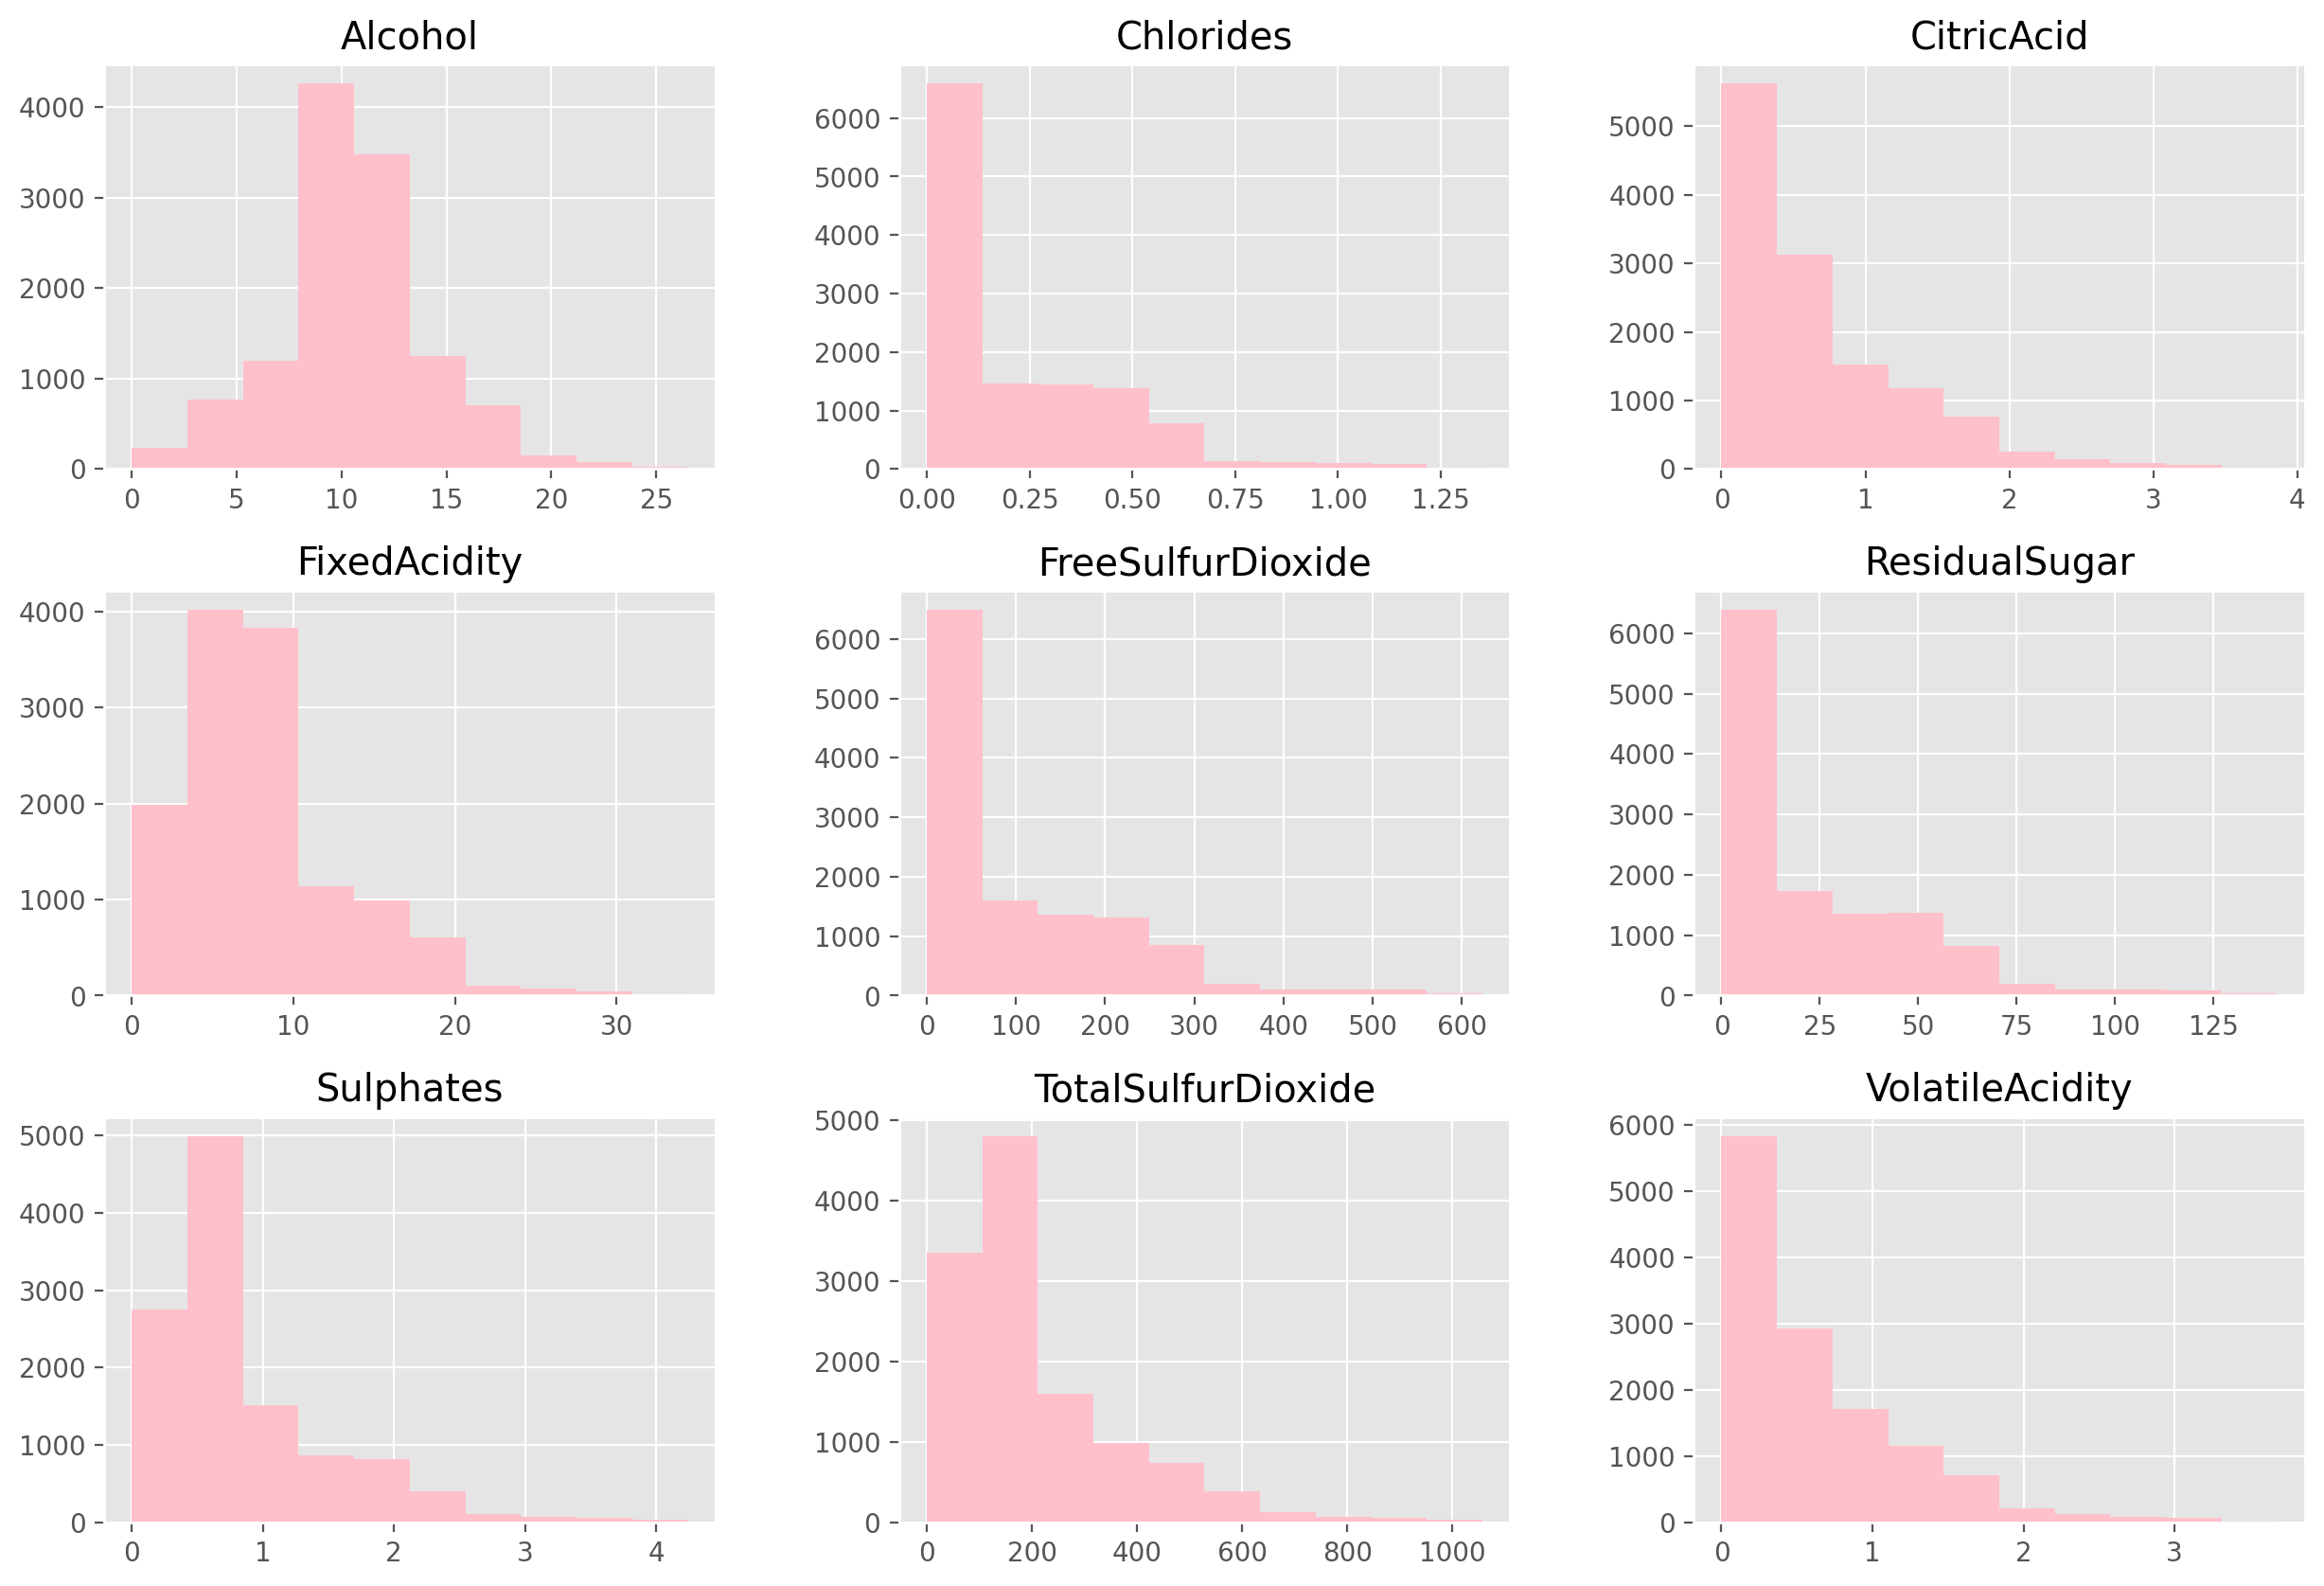

In [67]:
#before applying absolute values
df[columns].hist(figsize=(15,10), color='pink');

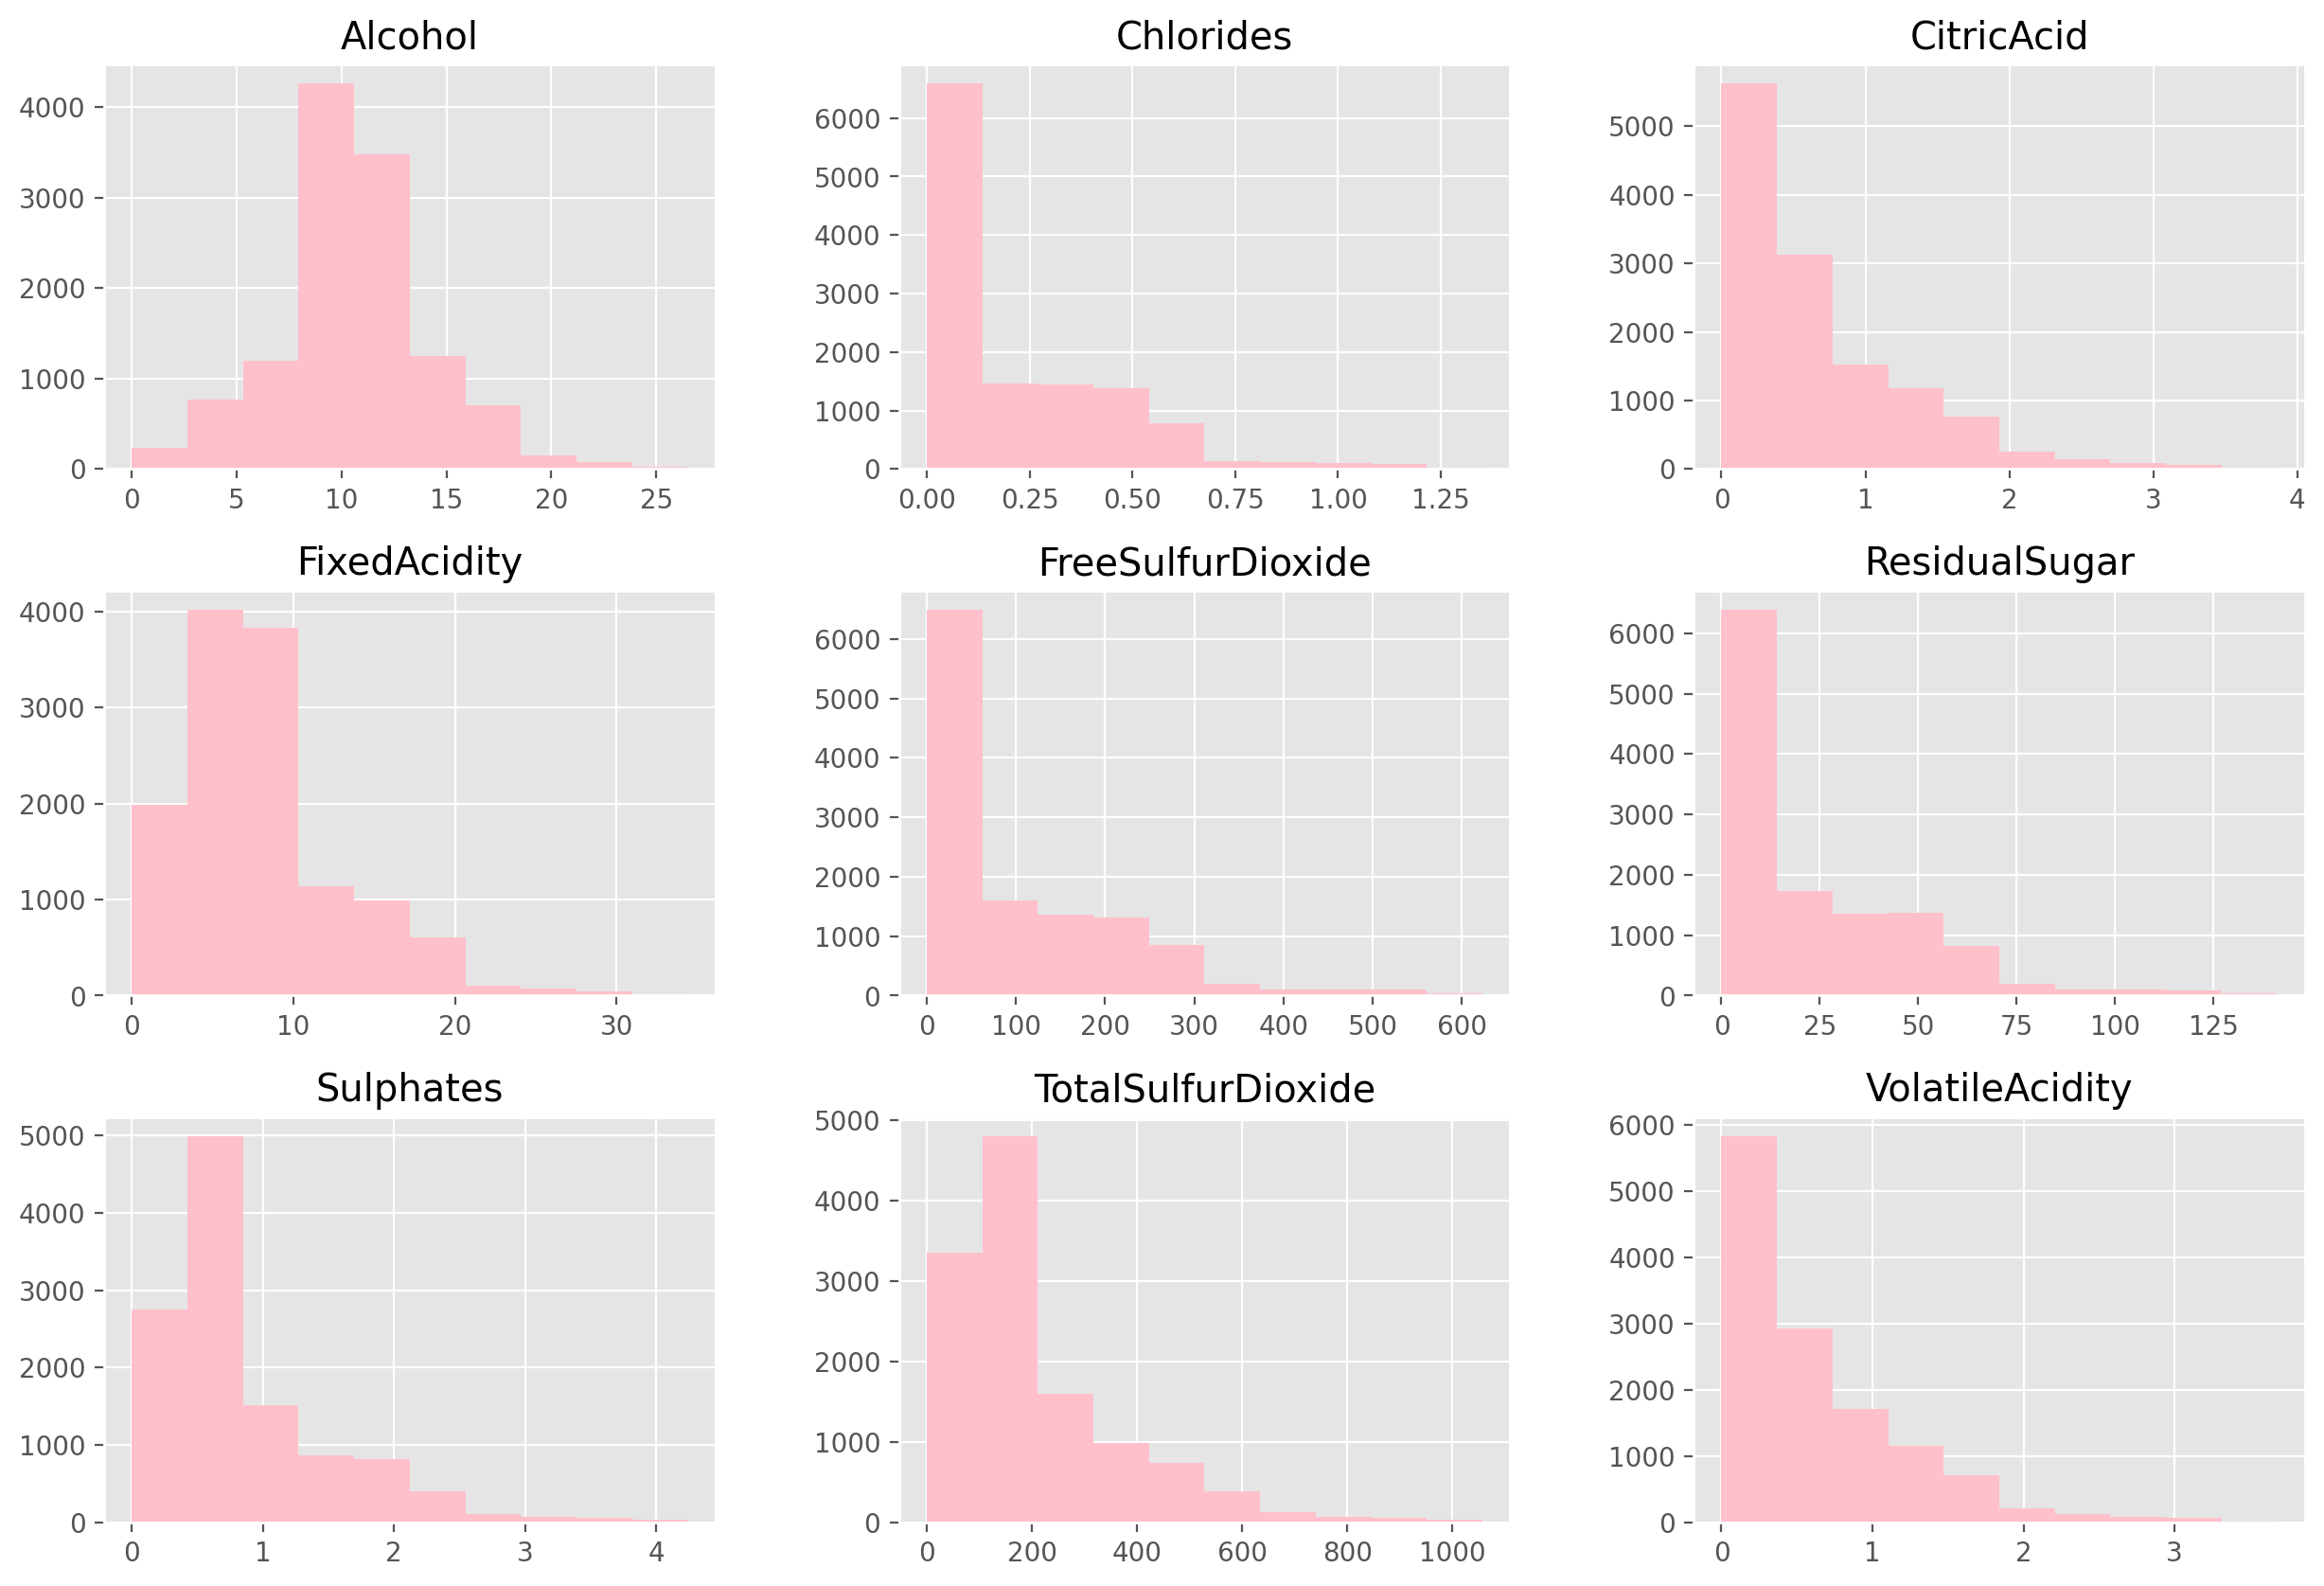

In [68]:
#after applying absolute values
df_with_dummy[columns].hist(figsize=(15,10), color='pink');

With the exception of Alcohol, we can observe the extreme right skew of the distribution after applying the absolute values, which appears to be proof of the outlier values that we discovered earlier in the analysis.

#### Outliers - Alcohol

In [69]:
# find all wine rows that have Alcohol values whose values are >
# 2.5 standard deviations from the mean of data in that column
Alcohol_outliers = df_with_dummy[np.abs(df_with_dummy['Alcohol'] - df_with_dummy['Alcohol'].mean() ) > (2.5 * df_with_dummy['Alcohol'].std() )]
print(Alcohol_outliers.Alcohol.min())
print(Alcohol_outliers.Alcohol.max())
print(Alcohol_outliers.shape[0])

0.0
26.5
269


We must ensure that all of the values we have are legitimate because we have already taken the attribute's absolute value.In other words, The statistical outliers, max, and min are displayed here. We may disregard statistical outliers because all of these values are valid—the min is 0 and the peak is 26.1%.In other words, A further worry is that since a wine requires alcohol by definition, 0 might not be a valid number.

In [70]:
Alcohol_outliers = df_with_dummy[np.abs(df_with_dummy['Alcohol']==0)]
print(Alcohol_outliers.shape[0])

2


Further investigation revealed that a novel type of wine with zero percent alcohol content undergoes a dealcoholizing process. In other words,As there are just two observations with a 0 for alcohol, the influence on any study will be minimal in any case.In other words,
We therefore won't be eliminating any of this data.

#### Outliers - Chlorides

In [72]:
# Calculate the mean and standard deviation of the 'Chlorides' column
chlorides_mean = df_with_dummy['Chlorides'].mean()
chlorides_std = df_with_dummy['Chlorides'].std()

# Find all wine rows with Chlorides values greater than 2.5 standard deviations from the mean
chlorides_outliers = df_with_dummy[
    np.abs(df_with_dummy['Chlorides'] - chlorides_mean) > (2.5 * chlorides_std)
]

# Display the minimum Chlorides value among the outliers
print(chlorides_outliers['Chlorides'].min())

# Display the number of rows with Chlorides values exceeding the threshold
print(chlorides_outliers.shape[0])


0.809
345


We see that, according to the research this can still be a valid value, hence we use the limit found in the research, which is 1.0.

#### Outliers - FixedAcidity

In [74]:
# find all wine rows that have FixedAcidity values whose values are >
# 2.5 standard deviations from the mean of data in that column
FixedAcidity_outliers = df_with_dummy[np.abs(df_with_dummy['FixedAcidity'] - df_with_dummy['FixedAcidity'].mean() ) > (2.5 * df_with_dummy['FixedAcidity'].std() )]
print(FixedAcidity_outliers.FixedAcidity.min())
print(FixedAcidity_outliers.shape[0])

20.6
242


According to the research this value is greater than 17 g/L, will keep the one with 2.5 std and remove these records.

In [75]:
# now remove the extreme outliers from the temporary series
df_with_dummy.drop(FixedAcidity_outliers.index.values, inplace=True)

#sanity check
df_with_dummy.shape

(12553, 26)

#### Outliers - FreeSulfureDioxide

In [76]:
# find all wine rows that have FreeSulfurDioxide values whose values are >
# 2.5 standard deviations from the mean of data in that column
FreeSulfurDioxide_outliers = df_with_dummy[np.abs(df_with_dummy['FreeSulfurDioxide'] - df_with_dummy['FreeSulfurDioxide'].mean() ) > (2.5 * df_with_dummy['FreeSulfurDioxide'].std() )]
print(FreeSulfurDioxide_outliers.FixedAcidity.min())
print(FreeSulfurDioxide_outliers.shape[0])

0.0
314


We see that, according to the research this can still be a valid value, hence we use the limit found in the research, which is 200

#### Outliers - ResidualSugar

In [77]:
# find all wine rows that have ResidualSugar values whose values are >
# 2.5 standard deviations from the mean of data in that column
ResidualSugar_outliers = df_with_dummy[np.abs(df_with_dummy['ResidualSugar'] - df_with_dummy['ResidualSugar'].mean() ) > (2.5 * df_with_dummy['ResidualSugar'].std() )]


In [78]:
ResidualSugar_outliers = df_with_dummy['ResidualSugar']
print(ResidualSugar_outliers.min())
print(ResidualSugar_outliers.max())

0.0
141.15


As we described earlier, wines range from 0–220 grams per liter sugar (g/L), depending on the style so this means that values are all valid and do not need to be removed.

#### Outliers - TotalSulfurDioxide

In [80]:
# find all wine rows that have TotalSulfureDioxide values whose values are >
# 2.5 standard deviations from the mean of data in that column
TotalSulfurDioxide_outliers = df_with_dummy[np.abs(df_with_dummy['TotalSulfurDioxide'] - df_with_dummy['TotalSulfurDioxide'].mean() ) > (2.5 * df_with_dummy['TotalSulfurDioxide'].std() )]
print(TotalSulfurDioxide_outliers.TotalSulfurDioxide.max())
print(TotalSulfurDioxide_outliers.shape[0])

1057.0
315


According to our research, it seems reasonable to consider values above 500 mg/l as outliers. This differs with the statistical definition and we will opt for the former rather than the latter.

In [81]:
#reassign the value of the outiler table to exclude the values > 500
TotalSulfurDioxide_outliers = df_with_dummy[df_with_dummy['TotalSulfurDioxide']>500]

In [82]:
# now remove the extreme outliers from the temporary series
df_with_dummy.drop(TotalSulfurDioxide_outliers.index.values, inplace=True)

#sanity check
df_with_dummy.shape

(11744, 26)

#### Outliers - VolatileAcidity

In [83]:
# find all wine rows that have VolatileAcidity values whose values are >
# 2.5 standard deviations from the mean of data in that column
VolatileAcidity_outliers = df_with_dummy[np.abs(df_with_dummy['VolatileAcidity'] - df_with_dummy['VolatileAcidity'].mean() ) > (2.5 * df_with_dummy['VolatileAcidity'].std() )]
print(VolatileAcidity_outliers.VolatileAcidity.min())
print(VolatileAcidity_outliers.shape[0])

2.04
318


While our research indicated that this number has a legal limit of 1.2 in the US we don't know where this data originated from. Because of this we will need to use a standard statistical definition of 2.5 standard deviations from the mean

In [84]:
# now remove the extreme outliers from the temporary series
df_with_dummy.drop(VolatileAcidity_outliers.index.values, inplace=True)

#sanity check
df_with_dummy.shape

(11426, 26)

### Filling Missing the Values

In [85]:
#getting exact number of null values in each column
null_count=df_with_dummy[columns].isnull().sum()
null_count

Alcohol                579
Chlorides              573
CitricAcid               0
FixedAcidity             0
FreeSulfurDioxide      568
ResidualSugar          550
Sulphates             1090
TotalSulfurDioxide     647
VolatileAcidity          0
dtype: int64

There are 6 columns that need to be fixed now, all of them have around 5% of null values, with the Sulphates with 10%.

In [86]:
#checking correlations, adding response variable
columns.append('TARGET')
df_with_dummy.corr()


INDEX    TARGET   Density        pH  \
INDEX                 1.000000 -0.002151 -0.015932 -0.007121   
TARGET               -0.002151  1.000000 -0.035175 -0.008264   
Density              -0.015932 -0.035175  1.000000  0.000039   
pH                   -0.007121 -0.008264  0.000039  1.000000   
rating_notreviewed    0.015241 -0.573266  0.022532  0.010012   
rating_poor          -0.011365 -0.129981  0.006185  0.004934   
rating_good           0.008414  0.248709 -0.008411 -0.008880   
rating_verygood      -0.008947  0.359911 -0.020357 -0.012104   
rating_excellent     -0.010358  0.277090 -0.004950  0.009623   
AcidIndex_high       -0.005839 -0.222906  0.023217 -0.030691   
AcidIndex_low         0.002384  0.062776 -0.033887  0.055784   
AcidIndex_medium      0.002311  0.110152  0.009771 -0.021358   
LabelAppeal_verypoor -0.006571 -0.155888  0.005843  0.002336   
LabelAppeal_poor     -0.005629 -0.231968  0.011316 -0.006990   
LabelAppeal_neutral   0.000305  0.005003 -0.006536  0.005331   
LabelAppeal_good      0.002131  0.224940 -0.012555 -0.004676   
LabelAppeal_verygood  0.013757  0.164540  0.013586  0.009940   
Alcohol              -0.009434  0.064895 -0.000418 -0.015787   
Chlorides            -0.010421 -0.027555  0.023085  0.011975   
CitricAcid            0.006988  0.016479 -0.013486 -0.000322   
FixedAcidity         -0.004339 -0.056453  0.000643 -0.007448   
FreeSulfurDioxide     0.005244  0.027734  0.007327 -0.012841   
ResidualSugar         0.006538  0.004237 -0.001861 -0.000755   
Sulphates            -0.010823 -0.032227  0.011572  0.013511   
TotalSulfurDioxide   -0.001503  0.038505 -0.005056  0.009154   
VolatileAcidity       0.013408 -0.077325 -0.002017  0.007056   

                      rating_notreviewed  rating_poor  rating_good  \
INDEX                           0.015241    -0.011365     0.008414   
TARGET                         -0.573266    -0.129981     0.248709   
Density                         0.022532     0.006185    -0.008411   
pH                              0.010012     0.004934    -0.008880   
rating_notreviewed              1.000000    -0.333296    -0.368710   
rating_poor                    -0.333296     1.000000    -0.348298   
rating_good                    -0.368710    -0.348298     1.000000   
rating_verygood                -0.271619    -0.256582    -0.283844   
rating_excellent               -0.134340    -0.126903    -0.140386   
AcidIndex_high                  0.164503    -0.010929    -0.066119   
AcidIndex_low                  -0.035889    -0.003824     0.008997   
AcidIndex_medium               -0.089401     0.010762     0.040150   
LabelAppeal_verypoor            0.070337     0.077229    -0.062422   
LabelAppeal_poor                0.070480     0.113837    -0.014756   
LabelAppeal_neutral            -0.021792    -0.000024     0.034140   
LabelAppeal_good               -0.064270    -0.119813     0.015170   
LabelAppeal_verygood           -0.029874    -0.066801    -0.025762   
Alcohol                        -0.032959    -0.016086    -0.006072   
Chlorides                       0.022867    -0.018690     0.007340   
CitricAcid                     -0.016042     0.007062     0.001023   
FixedAcidity                    0.041969     0.010628    -0.030077   
FreeSulfurDioxide              -0.015738    -0.014810     0.030530   
ResidualSugar                  -0.006310    -0.004191     0.005689   
Sulphates                       0.027314    -0.011542    -0.007315   
TotalSulfurDioxide             -0.034276     0.005137     0.025976   
VolatileAcidity                 0.037762     0.025513    -0.038106   

                      rating_verygood  rating_excellent  AcidIndex_high  ...  \
INDEX                       -0.008947         -0.010358       -0.005839  ...   
TARGET                       0.359911          0.277090       -0.222906  ...   
Density                     -0.020357         -0.004950        0.023217  ...   
pH                          -0.012104          0.009623       -0.030691  ...   
ratin

Regression modeling does not seem like a good way to fill in the missing data because there are no significant correlations found between the explanatory variables and the response variable. (br>
The low correlation between the null values, as we saw at the start of the analysis, suggests that the null values are only found in one column at a time.

In [87]:
#creating a copy of the df
copy=df_with_dummy.copy()

#Getting records where at least there is one null value
records_to_delete=copy.dropna(how='any')
records_to_delete

INDEX  TARGET  Density    pH  rating_notreviewed  rating_poor  \
3          5       3  0.99640  2.24                   0            1   
5          7       0  0.99940  3.20                   1            0   
6          8       0  0.99572  3.49                   1            0   
9         13       6  0.94724  3.09                   0            0   
10        14       0  0.99340  4.31                   0            1   
...      ...     ...      ...   ...                 ...          ...   
12781  16109       0  0.99810  2.00                   1            0   
12786  16114       0  0.99524  2.73                   1            0   
12788  16117       4  0.99830  2.83                   0            0   
12789  16119       4  0.99710  3.45                   0            1   
12790  16120       0  1.01077  3.39                   1            0   

       rating_good  rating_verygood  rating_excellent  AcidIndex_high  ...  \
3                0                0                 0               0  ...   
5                0                0                 0               1  ...   
6                0                0                 0               0  ...   
9                0                0                 1               0  ...   
10               0                0                 0               0  ...   
...            ...              ...               ...             ...  ...   
12781            0                0                 0               1  ...   
12786            0                0                 0               0  ...   
12788            0                1                 0               0  ...   
12789            0                0                 0               0  ...   
12790            0                0                 0               0  ...   

       LabelAppeal_verygood  Alcohol  Chlorides  CitricAcid  FixedAcidity  \
3                         0      6.2      0.425        0.04           5.7   
5                         0     15.4      0.556        0.59          11.3   
6                         0     10.3      0.060        0.40           7.7   
9                         0     12.6      0.277        0.39           5.5   
10                        0     13.1      0.022        0.15          17.2   
...                     ...      ...        ...         ...           ...   
12781                     0      9.9      0.155        0.57          11.6   
12786                     0     13.6      0.478        1.15           6.8   
12788                     0      9.3      0.633        0.38           8.4   
12789                     0      9.5      0.525        0.29           4.4   
12790                     0      4.9      0.043        2.01           5.0   

       FreeSulfurDioxide  ResidualSugar  Sulphates  TotalSulfurDioxide  \
3                   22.0           18.8       1.83               115.0   
5                   37.0            2.2       1.29                15.0   
6                  287.0           21.5       1.21               156.0   
9                   62.0            1.8       0.75               180.0   
10                 551.0           33.8       0.56                65.0   
...                  ...            ...        ...                 ...   
12781                3.0            3.2       0.70                55.0   
12786              228.0            3.9       0.10                29.0   
12788              208.0           37.1       0.25               220.0   
12789               30.0            1.9       0.59               391.0   
12790               17.0            5.0       0.57               101.0   

       VolatileAcidity  
3                0.385  
5                0.320  
6                0.290  
9                0.220  
10               0.520  
...                ...  
12781            1.040  
12786            0.130  
12788            0.300  
12789            0.220  
12790            0.790  

[7728 rows x 26 columns]

It is evident that many rows need to be removed, as they include at least one null value in the relevant column. Nevertheless, doing so would also require removing any valid data values from the remaining columns. (br>
I made the decision to remove this column since there is not much link between it and the answer variable.

#### filling Alcohol

In [88]:
# Calculate the mean and standard deviation of the 'Chlorides' column
chlorides_mean = df_with_dummy['Chlorides'].mean()
chlorides_std = df_with_dummy['Chlorides'].std()

# Find all wine rows with Chlorides values greater than 2.5 standard deviations from the mean
chlorides_outliers = df_with_dummy[
    np.abs(df_with_dummy['Chlorides'] - chlorides_mean) > (2.5 * chlorides_std)
]

# Display the minimum Chlorides value among the outliers
print(chlorides_outliers['Chlorides'].min())

# Display the number of rows with Chlorides values exceeding the threshold
print(chlorides_outliers.shape[0])


0.809
301


#### filling Chlorides
Using forward fill

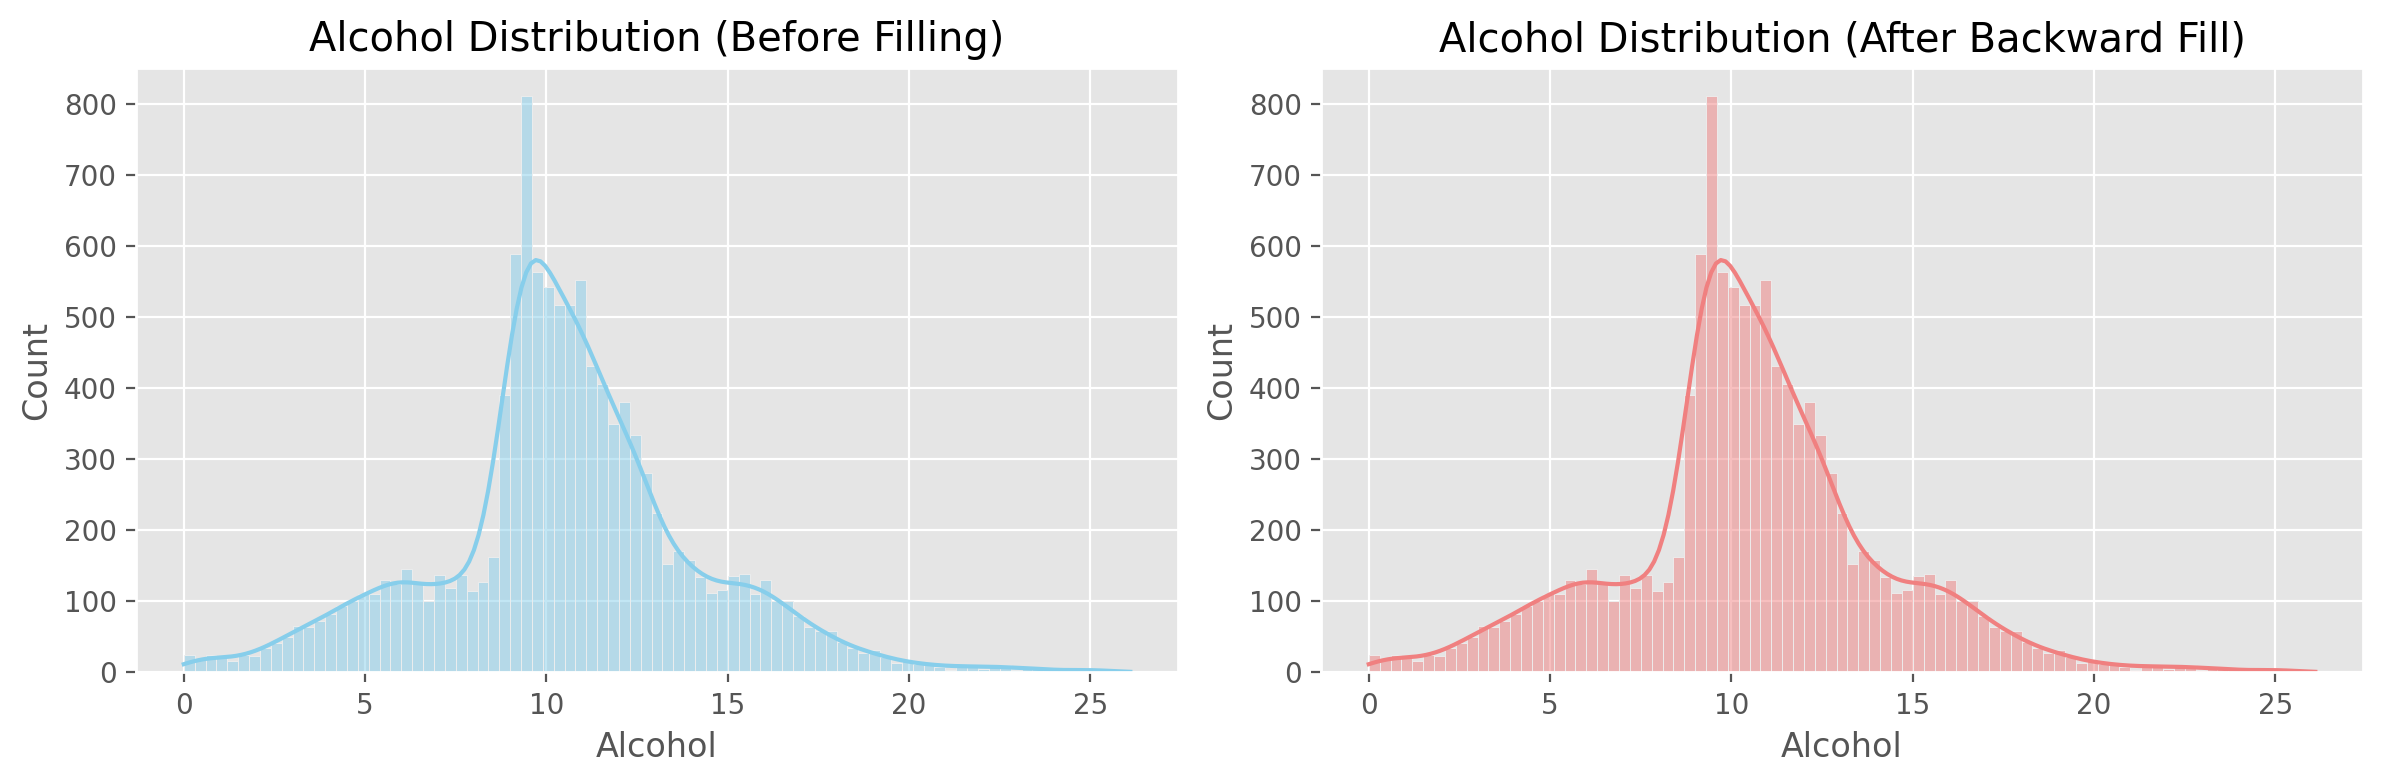

In [90]:
# Filling missing values for Alcohol using backward fill strategy
df_with_dummy['Alcohol'].bfill(inplace=True)

# Checking distribution before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution plot before filling missing values
sns.histplot(df_with_dummy["Alcohol"], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Alcohol Distribution (Before Filling)")

# Distribution plot after filling missing values
sns.histplot(df_with_dummy["Alcohol"], kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title("Alcohol Distribution (After Backward Fill)")

plt.tight_layout()
plt.show()


#### filling FreeSulfurDioxide

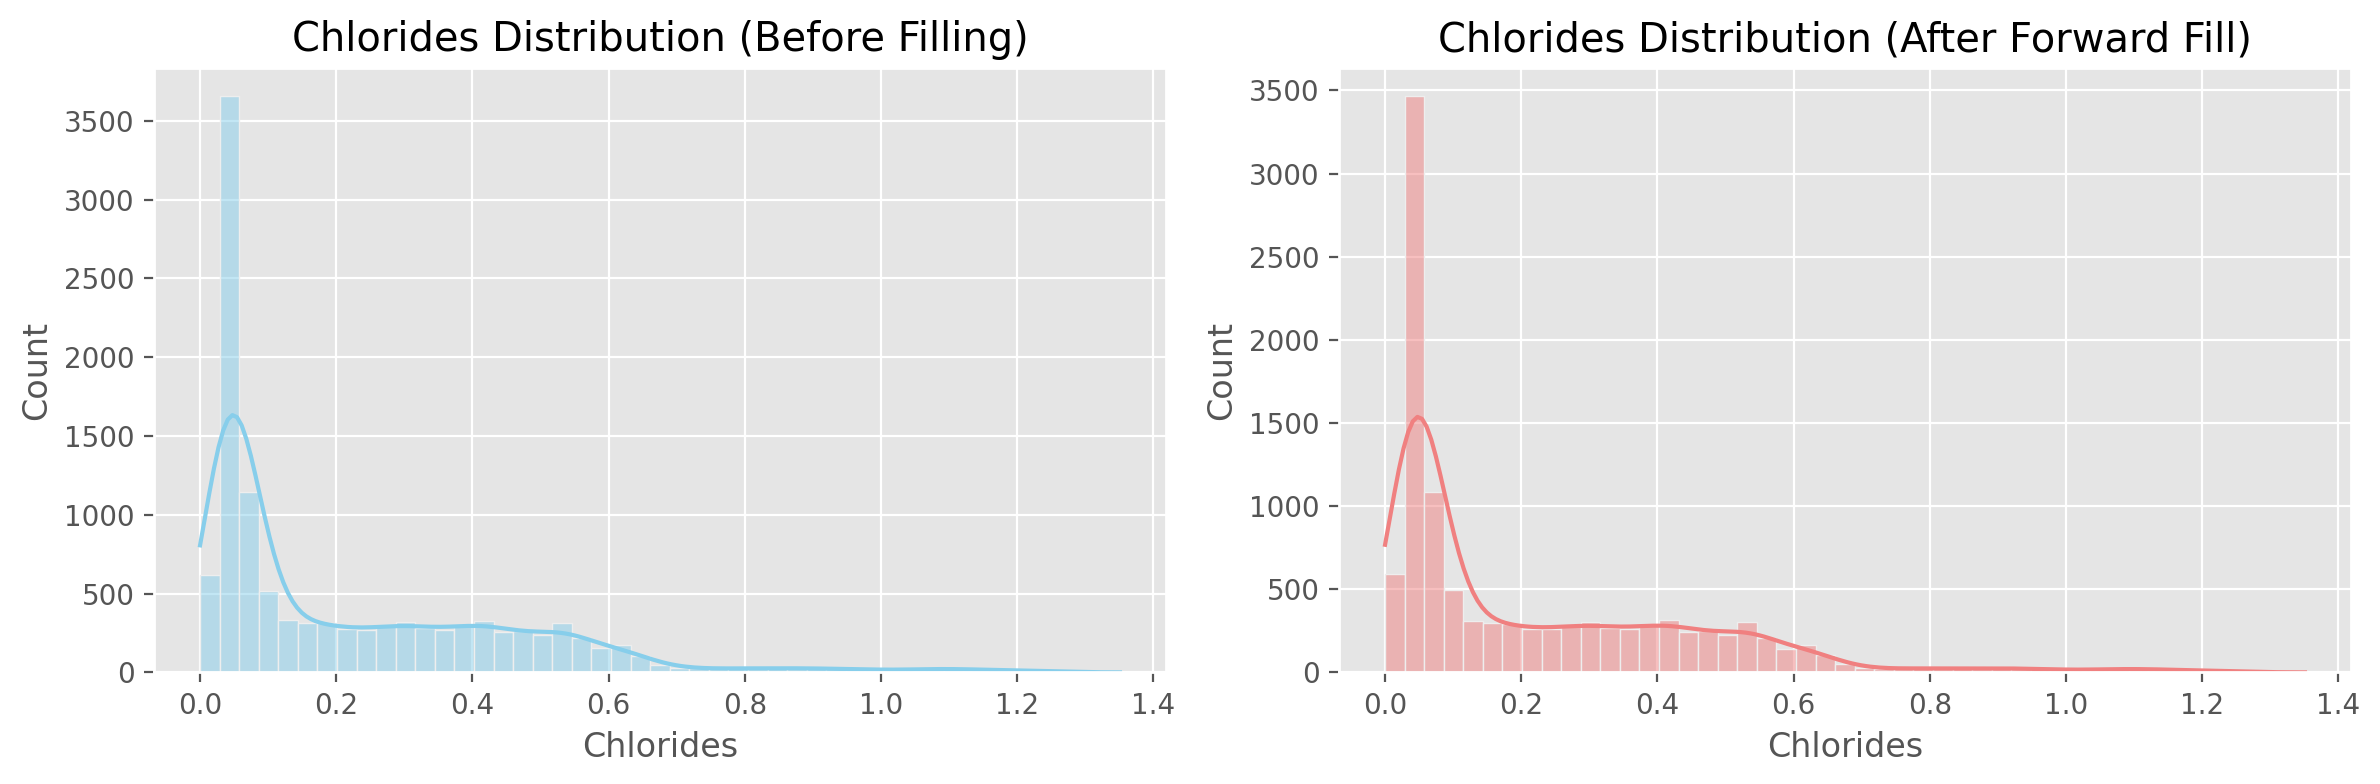

In [91]:
# Filling missing values for Chlorides using forward fill strategy
df_with_dummy['Chlorides'].ffill(inplace=True)

# Checking distribution before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution plot before filling missing values
sns.histplot(df_with_dummy["Chlorides"], kde=True, color='skyblue', ax=axes[0])
axes[0].set_title("Chlorides Distribution (Before Filling)")

# Distribution plot after filling missing values
sns.histplot(copy[copy["Chlorides"].notnull()]["Chlorides"], kde=True, color='lightcoral', ax=axes[1])
axes[1].set_title("Chlorides Distribution (After Forward Fill)")

plt.tight_layout()
plt.show()


#### filling ResidualSugar

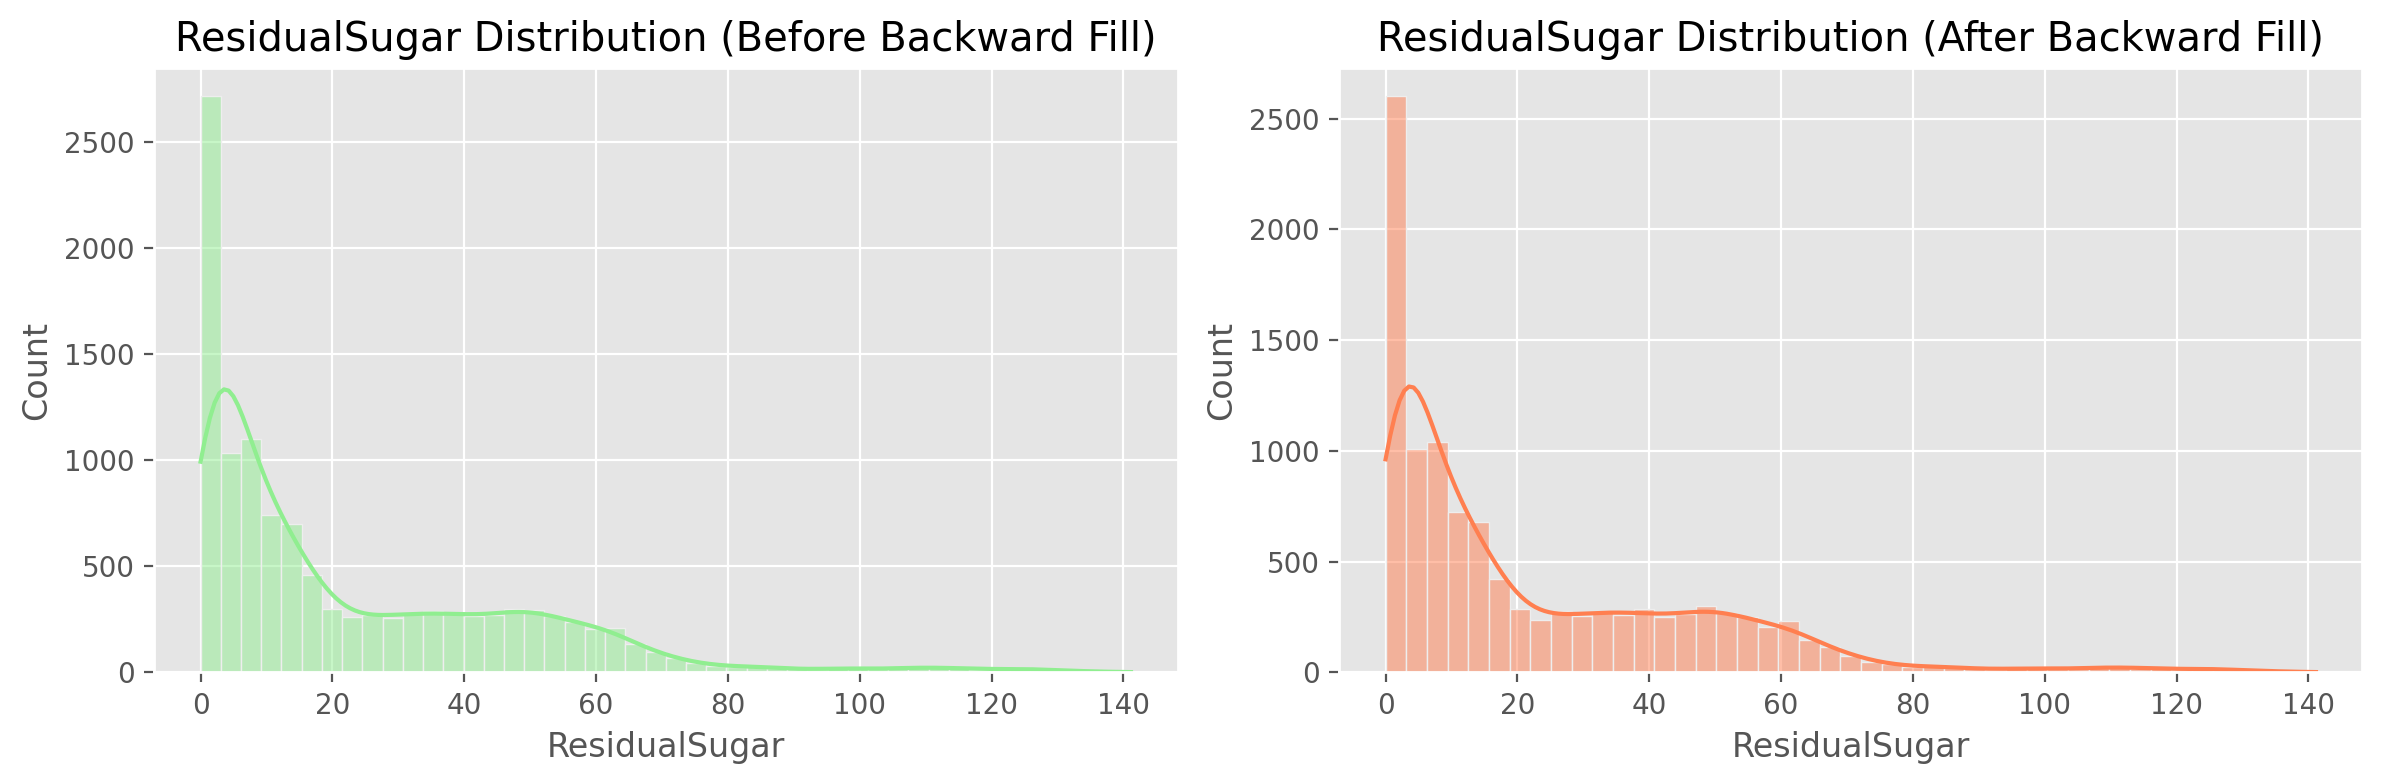

In [92]:
# Filling missing values for ResidualSugar using backward fill strategy
df_with_dummy['ResidualSugar'].bfill(inplace=True)

# Checking distribution before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution plot before filling missing values
sns.histplot(df_with_dummy["ResidualSugar"], kde=True, color='lightgreen', ax=axes[0])
axes[0].set_title("ResidualSugar Distribution (Before Backward Fill)")

# Distribution plot after filling missing values
sns.histplot(copy[copy["ResidualSugar"].notnull()]["ResidualSugar"], kde=True, color='coral', ax=axes[1])
axes[1].set_title("ResidualSugar Distribution (After Backward Fill)")

plt.tight_layout()
plt.show()


#### filling Sulphates

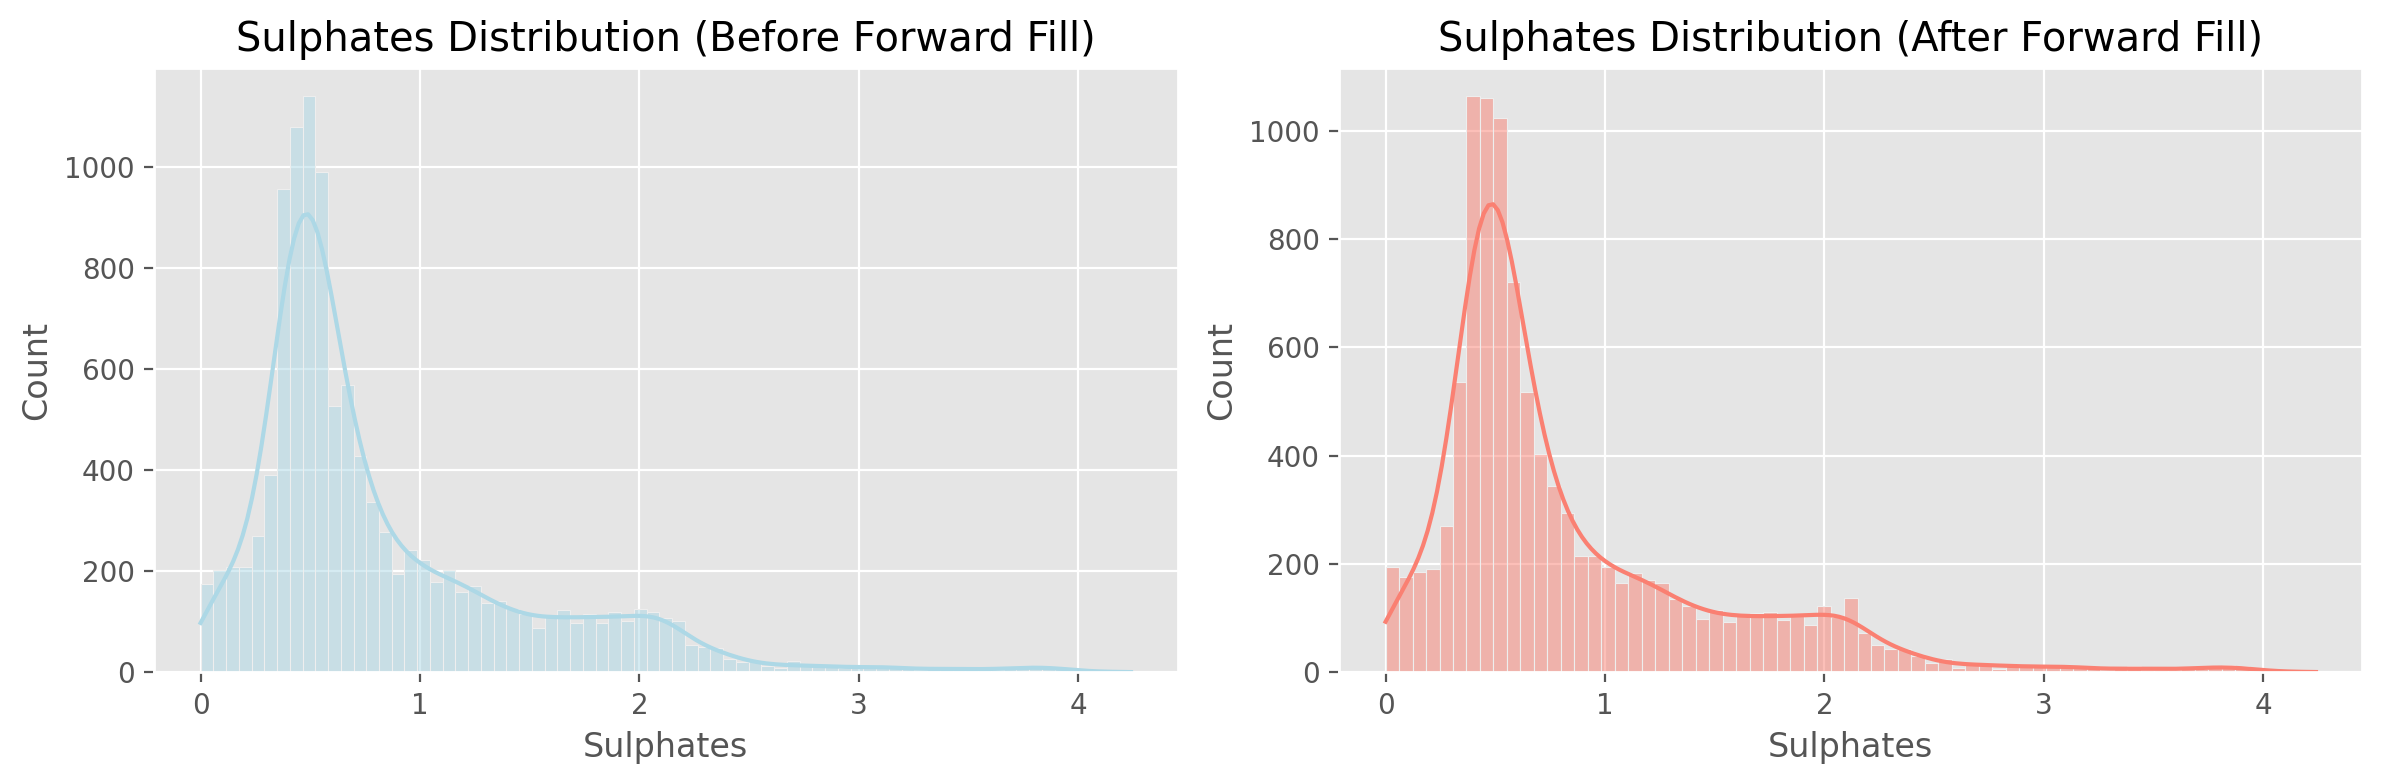

In [93]:
# Filling missing values for Sulphates using forward fill strategy
df_with_dummy['Sulphates'].ffill(inplace=True)

# Checking distribution before and after
fig, axes = plt.subplots(1, 2, figsize=(12, 4))

# Distribution plot before filling missing values
sns.histplot(df_with_dummy["Sulphates"], kde=True, color='lightblue', ax=axes[0])
axes[0].set_title("Sulphates Distribution (Before Forward Fill)")

# Distribution plot after filling missing values
sns.histplot(copy[copy["Sulphates"].notnull()]["Sulphates"], kde=True, color='salmon', ax=axes[1])
axes[1].set_title("Sulphates Distribution (After Forward Fill)")

plt.tight_layout()
plt.show()


#### filling TotalSulfurDioxide

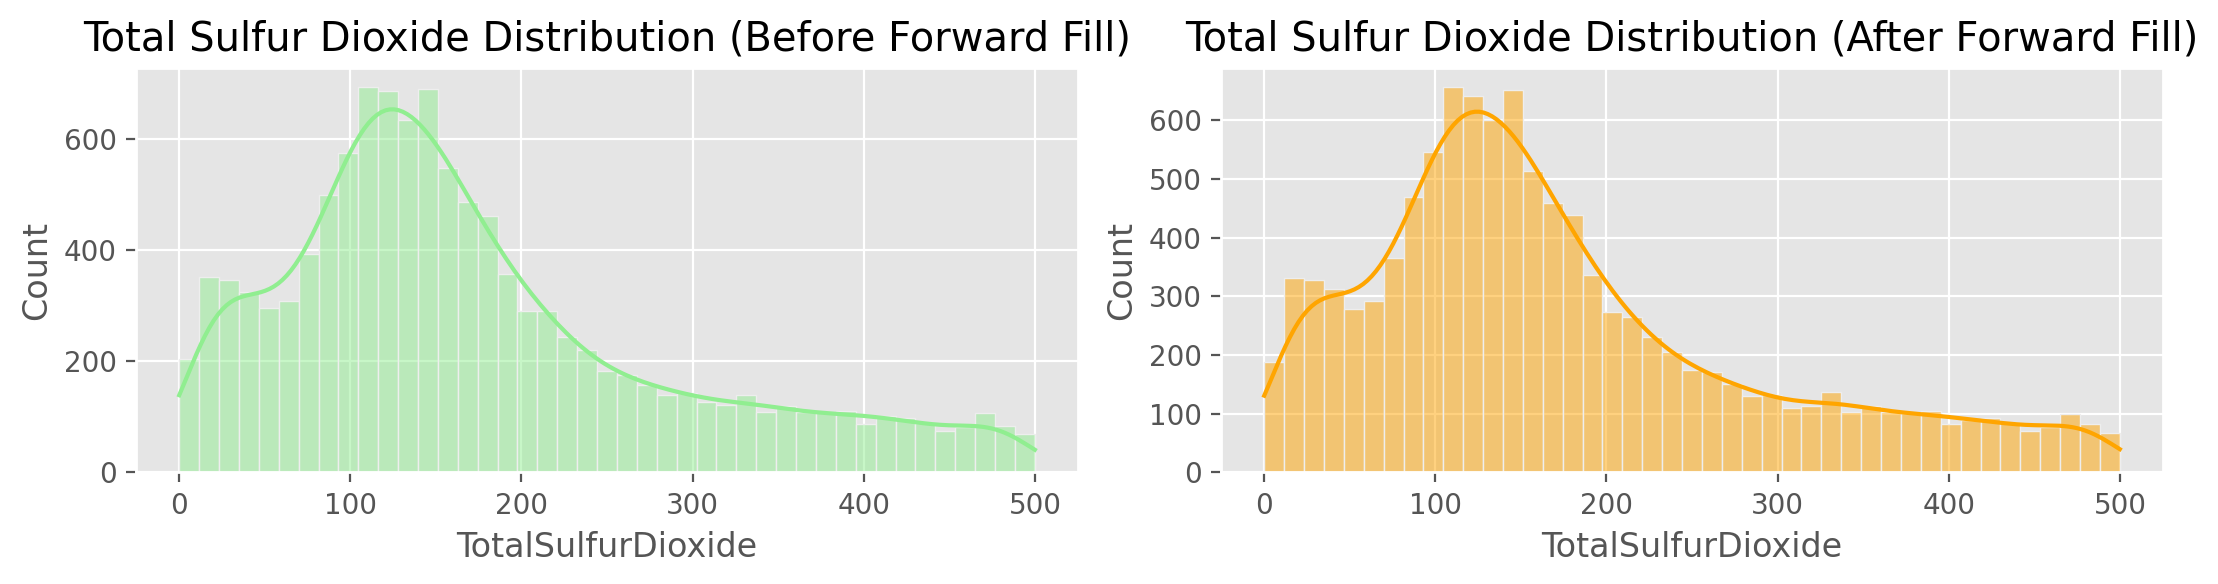

In [94]:
# Filling missing values for TotalSulfurDioxide using forward fill strategy
df_with_dummy['TotalSulfurDioxide'].ffill(inplace=True)

# Checking distribution before and after
fig, axes = plt.subplots(1, 2, figsize=(11, 3))

# Distribution plot before filling missing values
sns.histplot(df_with_dummy["TotalSulfurDioxide"], kde=True, color='lightgreen', ax=axes[0])
axes[0].set_title("Total Sulfur Dioxide Distribution (Before Forward Fill)")

# Distribution plot after filling missing values
sns.histplot(copy[copy["TotalSulfurDioxide"].notnull()]["TotalSulfurDioxide"], kde=True, color='orange', ax=axes[1])
axes[1].set_title("Total Sulfur Dioxide Distribution (After Forward Fill)")

plt.tight_layout()
plt.show()


## Re-Run the EDA

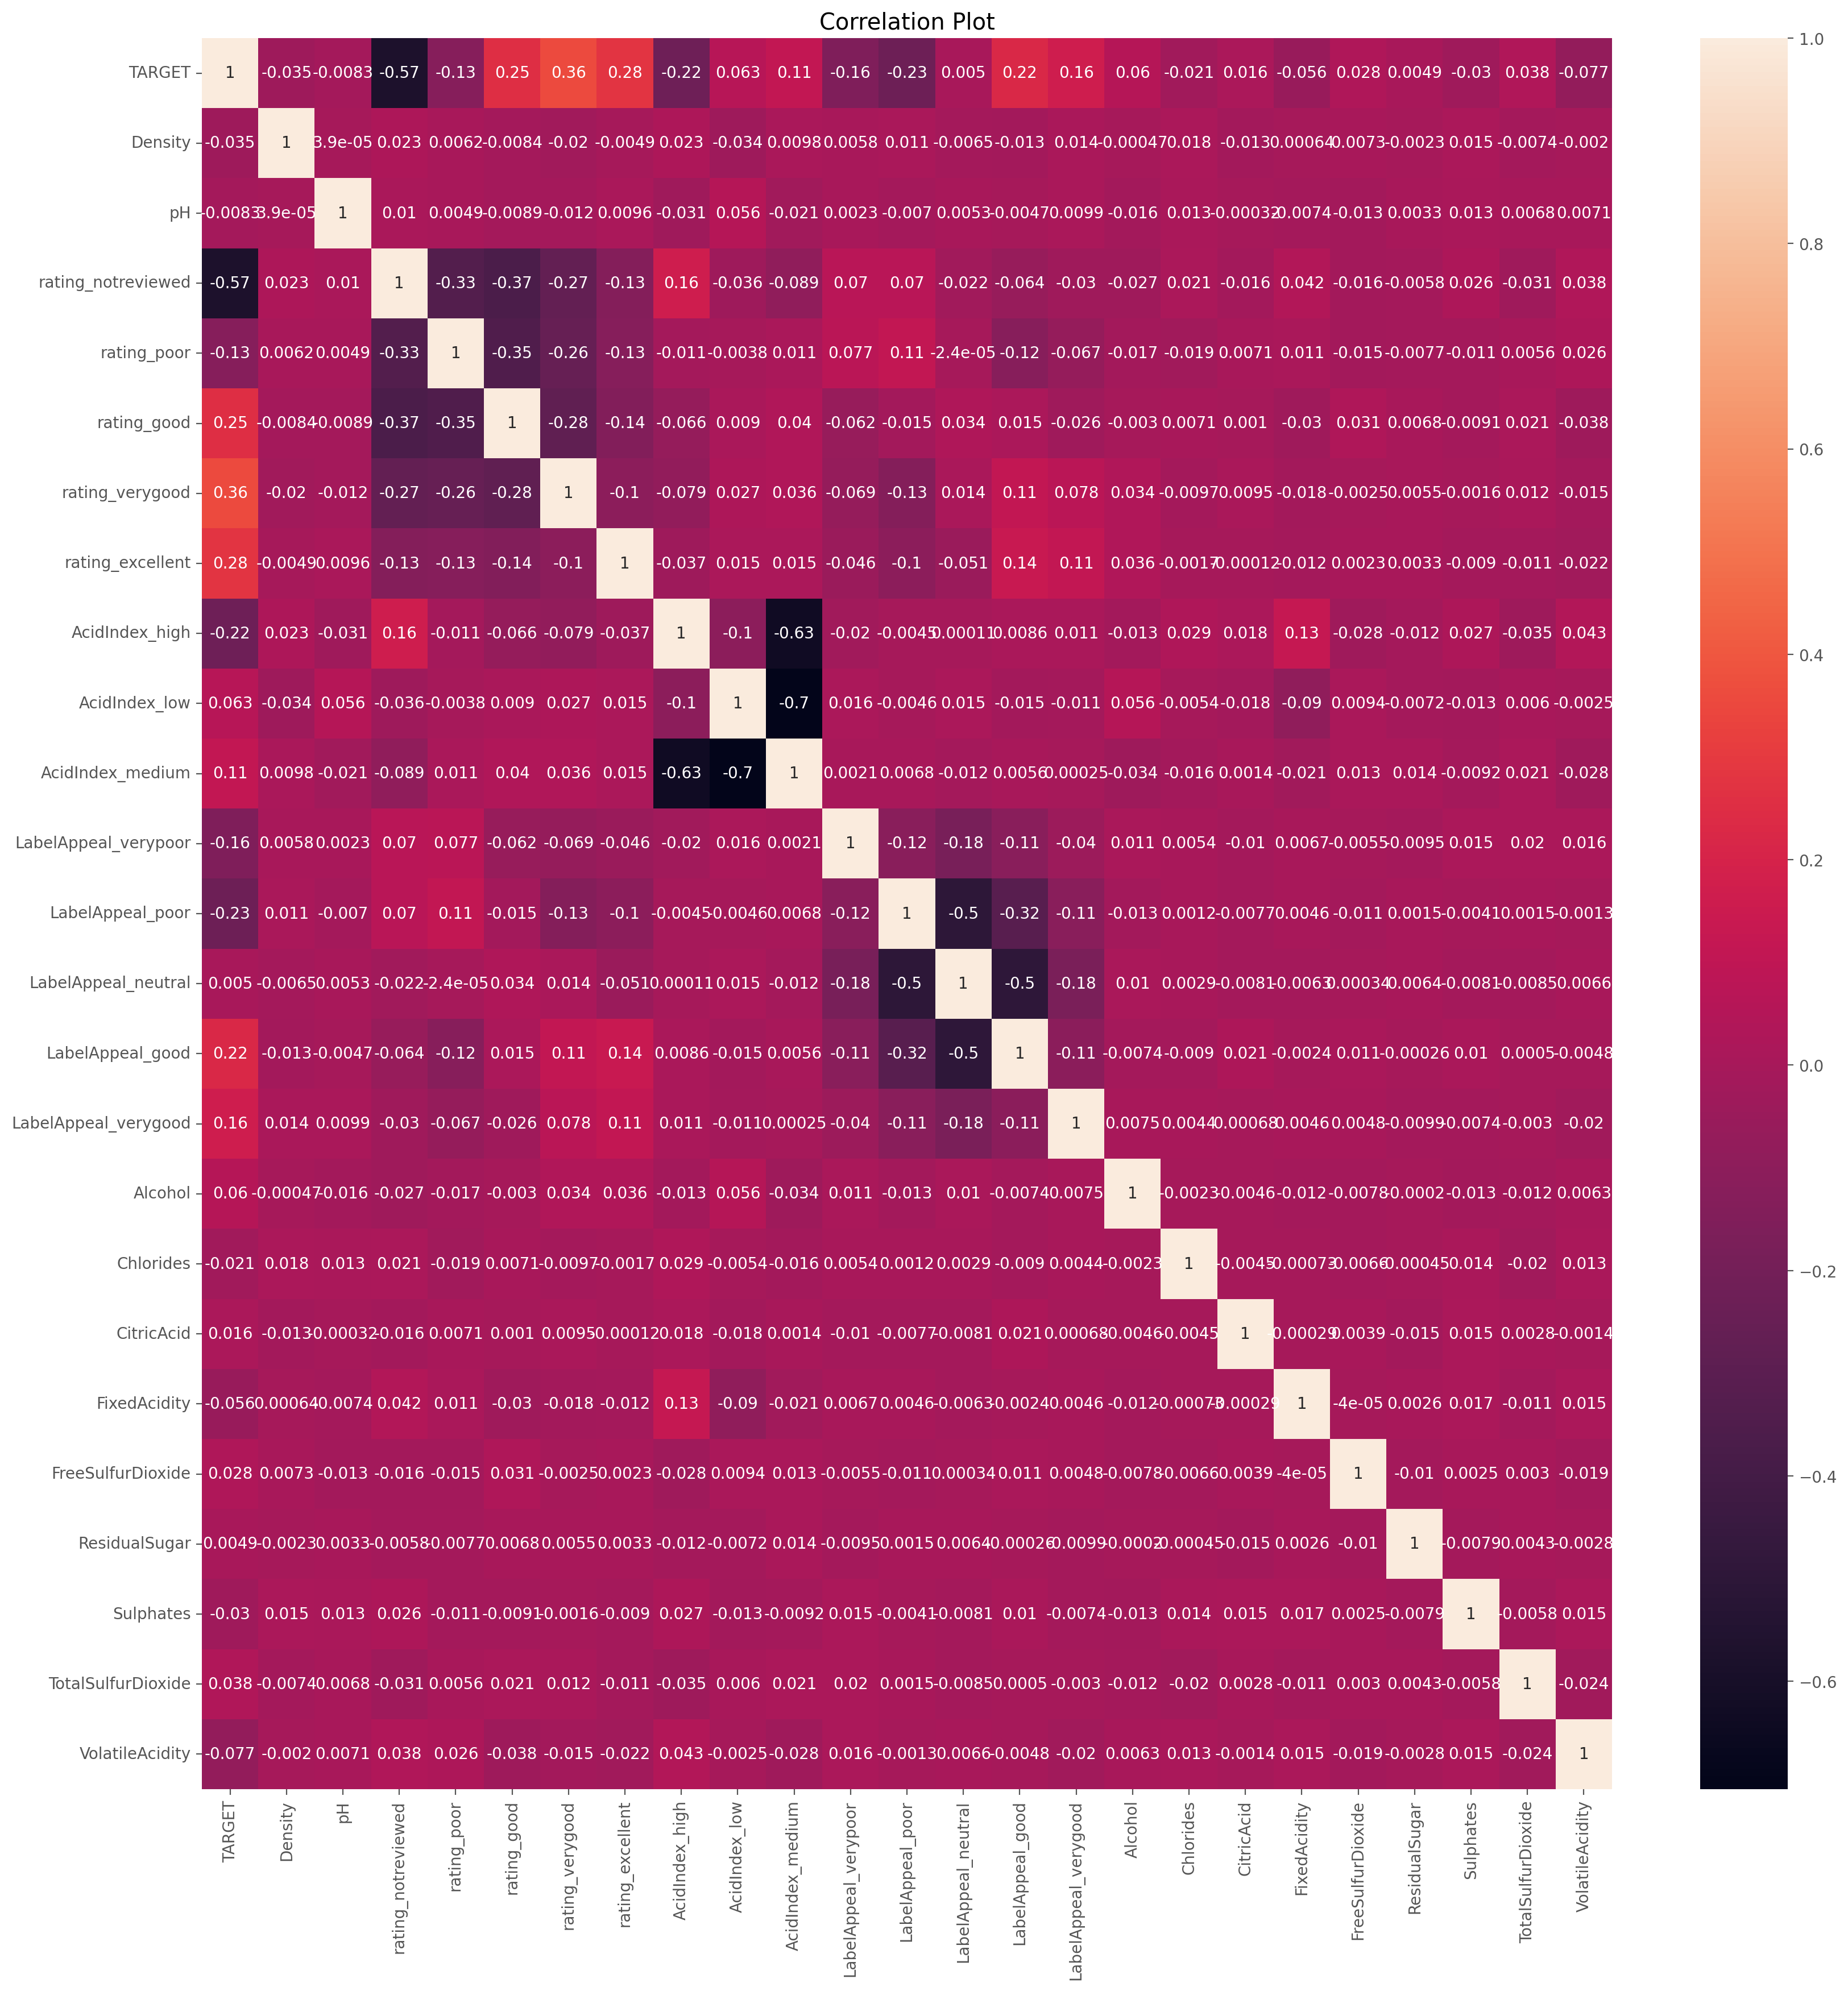

In [95]:
#looking at the correlations after the cleaning
# initial correlation
cor = df_with_dummy.iloc[:,1:].corr()
plt.figure(figsize=(20,20))
plt.title("Correlation Plot")
sns.heatmap(cor,annot=True)
plt.show()

We can see that the numeric variables correlations are still low.

In [96]:
#deleting the 2 lowest correlations
df_with_dummy.drop(columns=['pH','Density'], inplace=True)

### New Data distributed in histograms

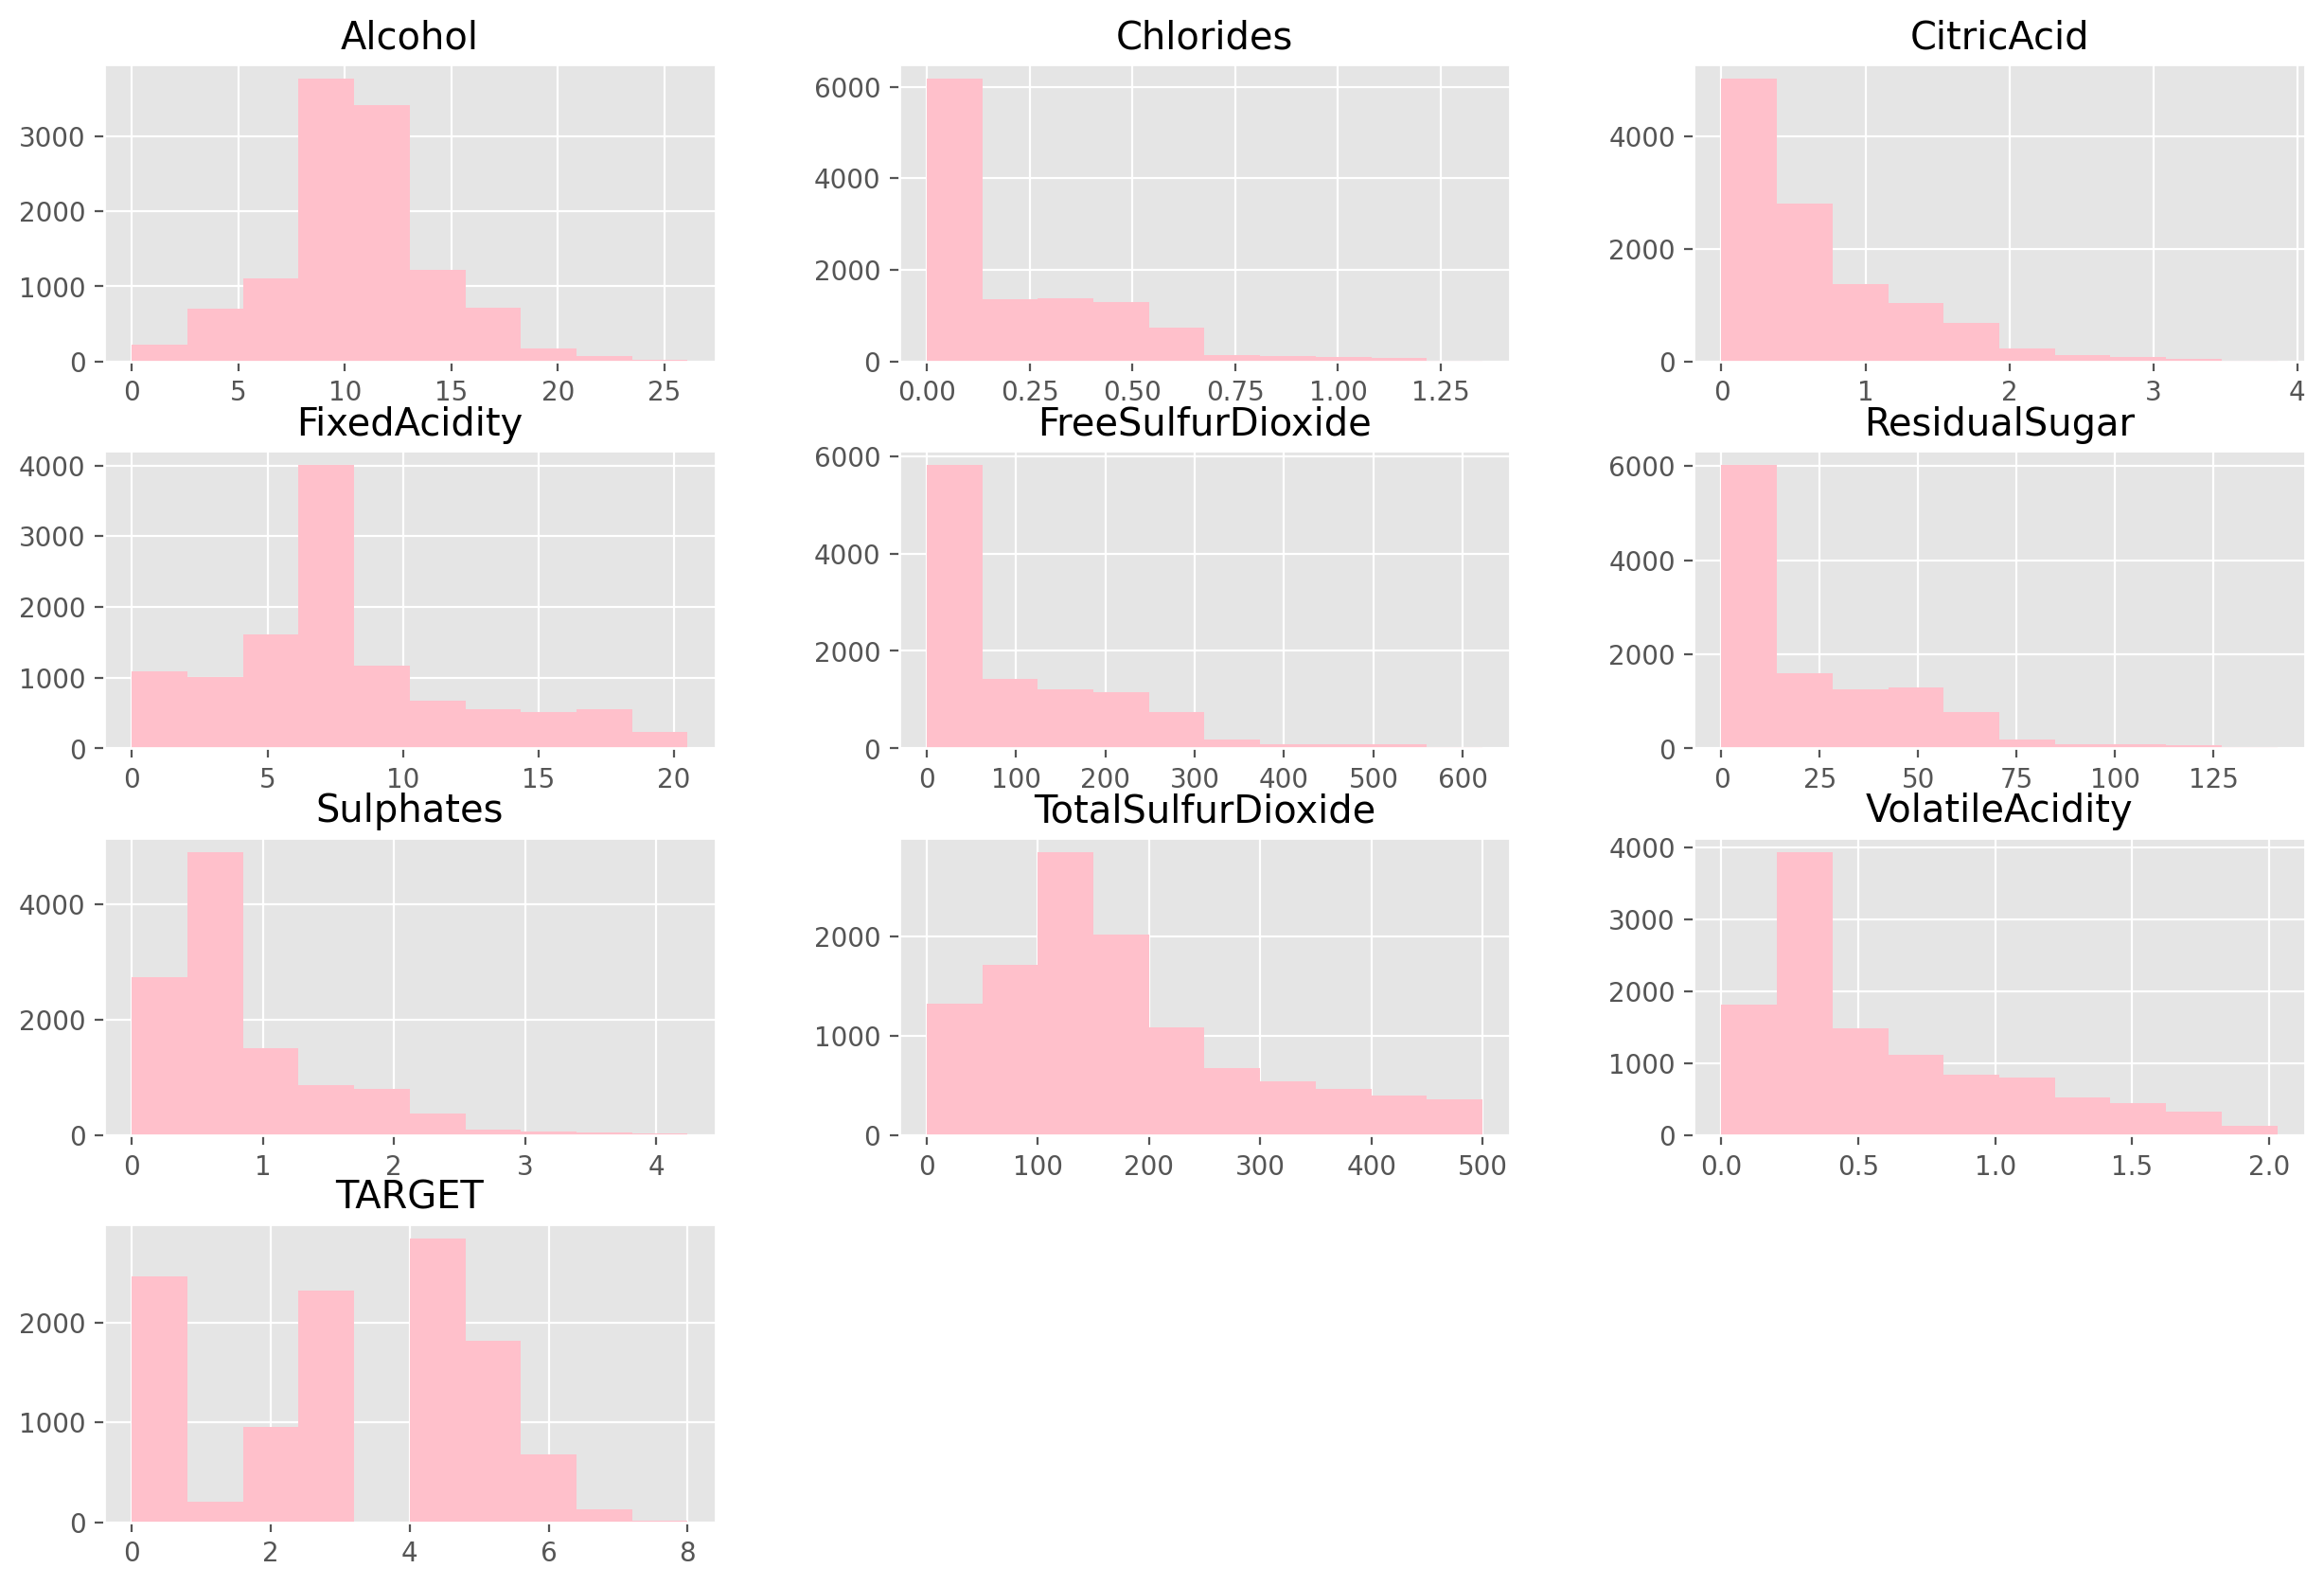

In [97]:
df_with_dummy[columns].hist(figsize=(15,10), color='pink');

### Old Data distributed in histograms

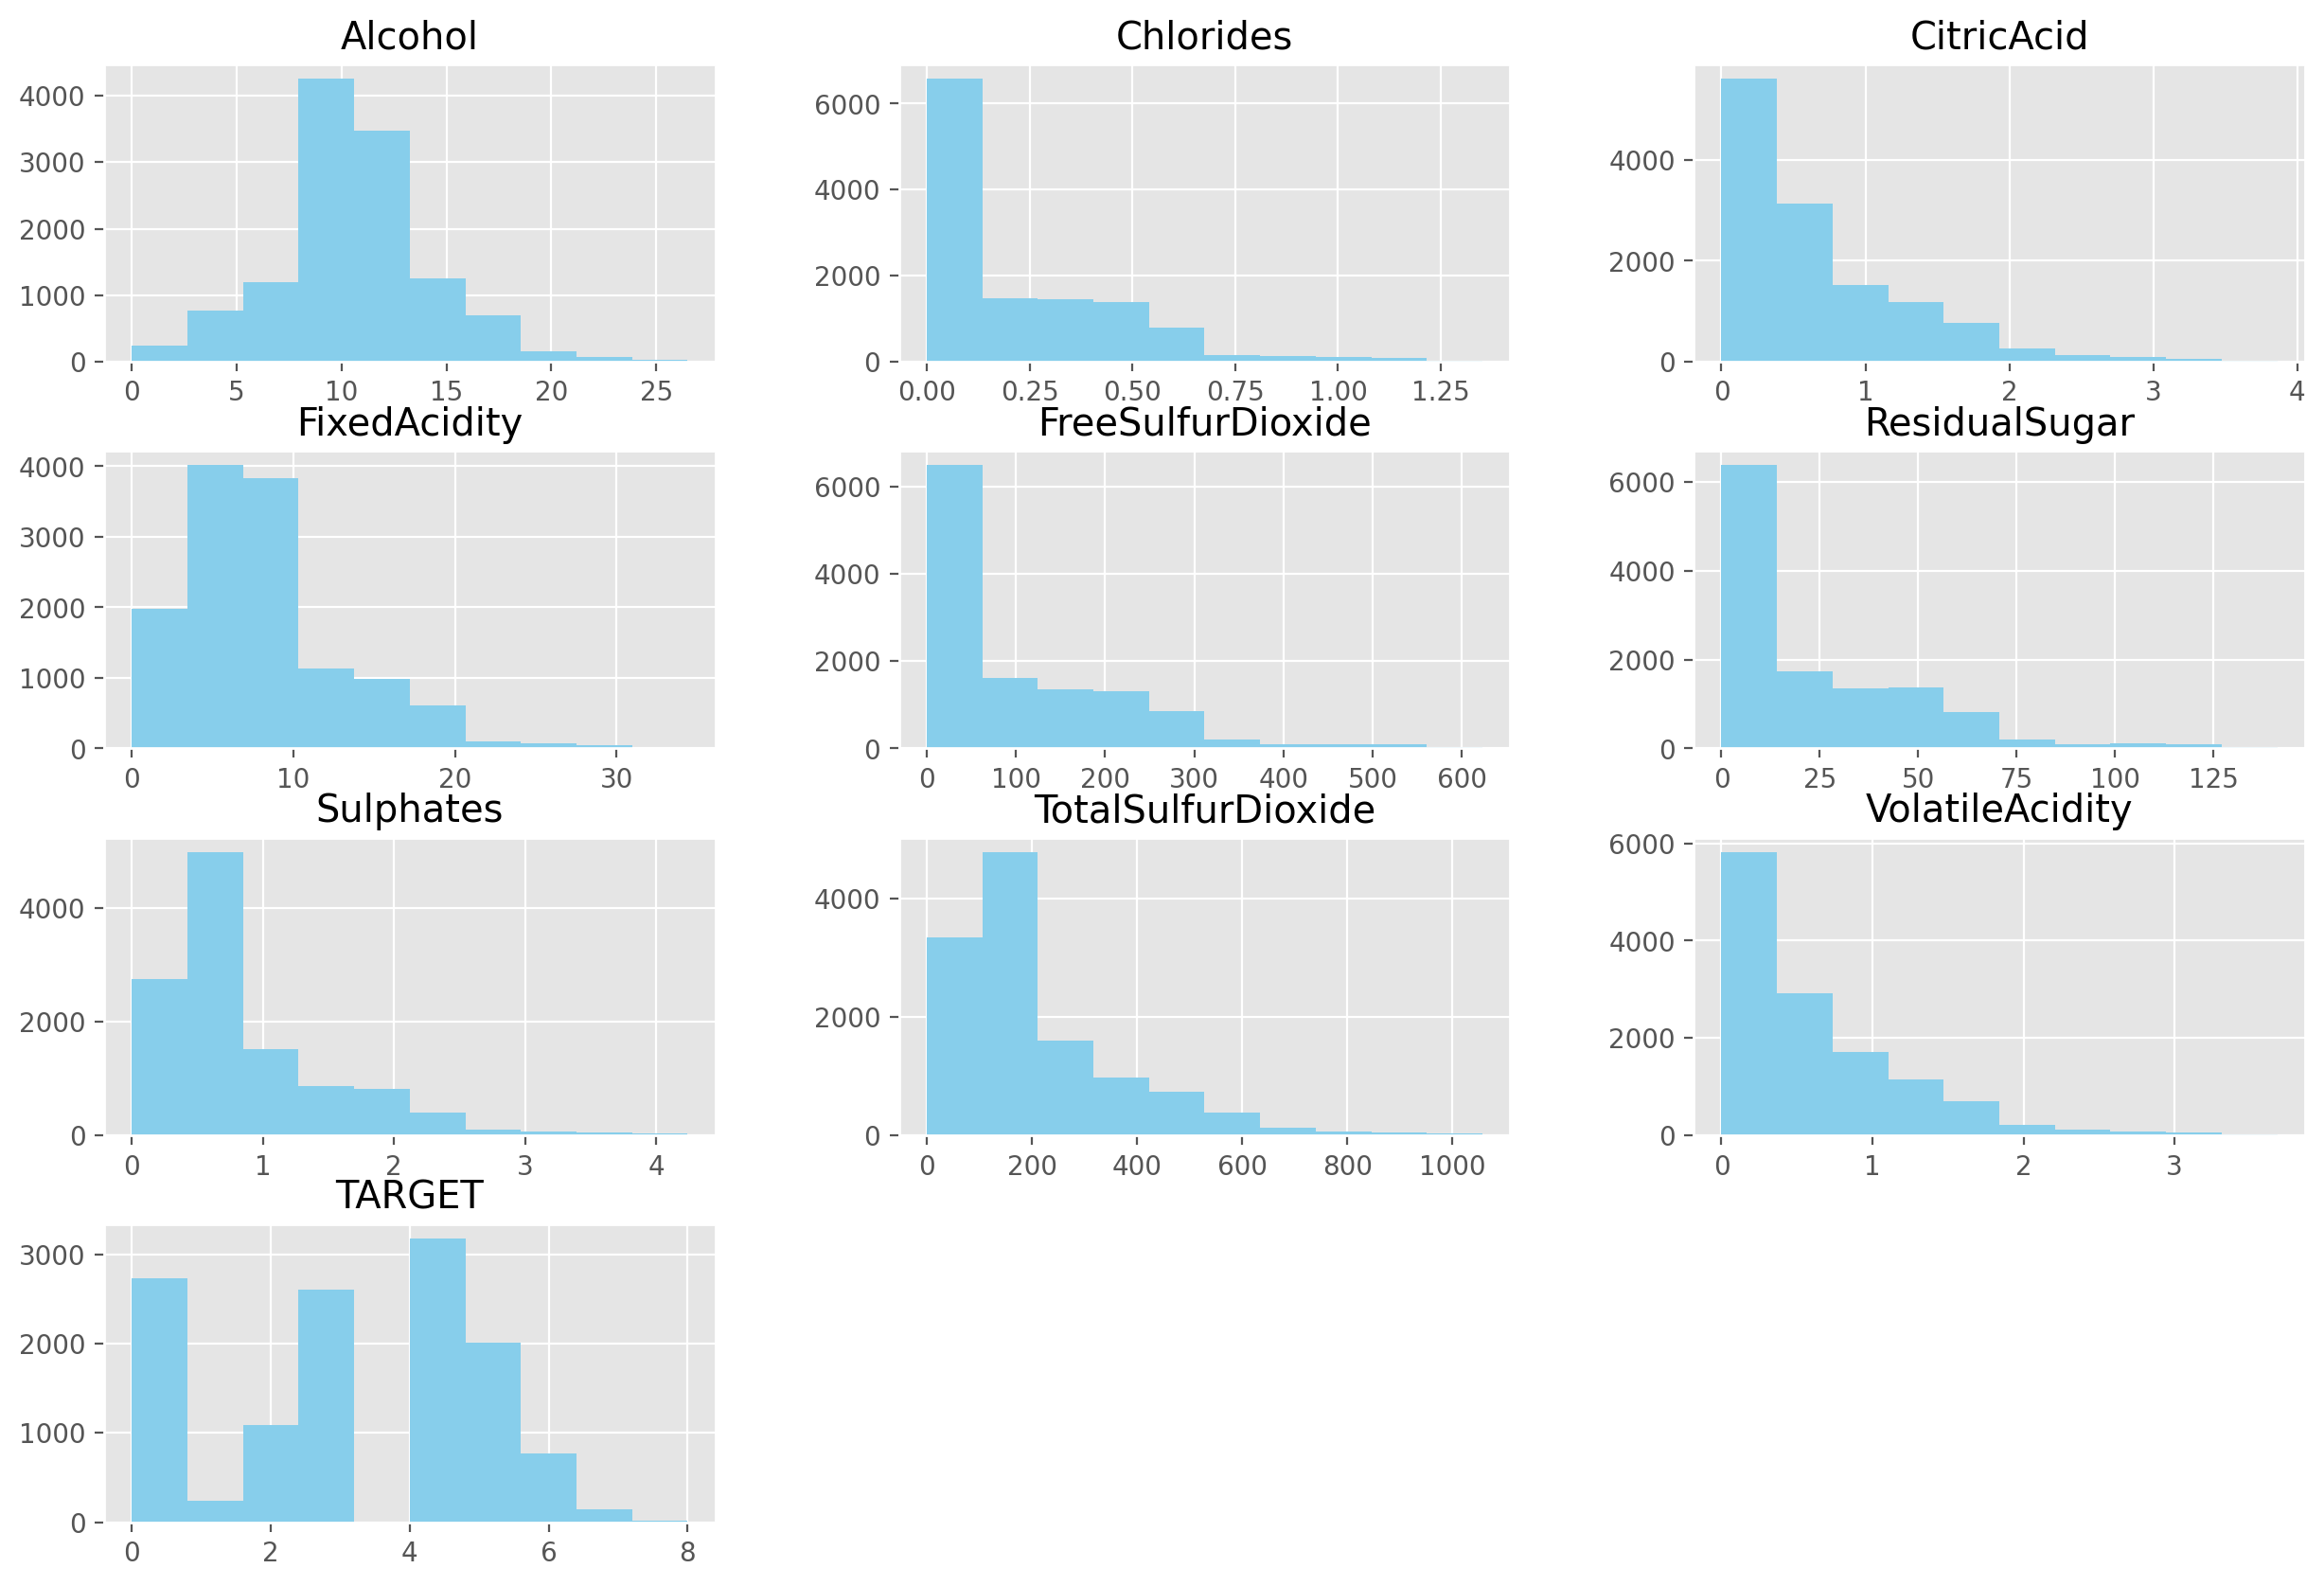

In [98]:
df[columns].hist(figsize=(15,10), color='skyblue');

We were able to preserve the PDF by employing backfill and forward fill to fill in the nulls from the numerical data. We also looked at other techniques, and what we discovered about mean, median, and mode significantly changed the PDF.

Our min max scalar has been used to standardize all of the numerical variables. In order to prevent 0^x mistakes from the box-cox transformations, we decided to utilize a range of 1-2.In other words,
Every outlier that was identified as 2.5 standard deviations from the data mean or by domain knowledge from study was eliminated. This lessens the bias that anomalies may introduce into models.



In [99]:
df_with_dummy[['rating_notreviewed', 'rating_poor', 'rating_good',
       'rating_verygood', 'rating_excellent', 'AcidIndex_high',
       'AcidIndex_low', 'AcidIndex_medium', 'LabelAppeal_verypoor',
       'LabelAppeal_poor', 'LabelAppeal_neutral', 'LabelAppeal_good',
       'LabelAppeal_verygood']].head()

rating_notreviewed  rating_poor  rating_good  rating_verygood  \
0                   0            0            1                0   
1                   0            0            0                1   
3                   0            1            0                0   
4                   0            0            1                0   
5                   1            0            0                0   

   rating_excellent  AcidIndex_high  AcidIndex_low  AcidIndex_medium  \
0                 0               0              0                 1   
1                 0               0              0                 1   
3                 0               0              1                 0   
4                 0               0              0                 1   
5                 0               1              0                 0   

   LabelAppeal_verypoor  LabelAppeal_poor  LabelAppeal_neutral  \
0                     0                 0                    1   
1                     0                 1                    0   
3                     0                 1                    0   
4                     0                 0                    1   
5                     0                 0                    1   

   LabelAppeal_good  LabelAppeal_verygood  
0                 0                     0  
1                 0                     0  
3                 0                     0  
4                 0                     0  
5                 0                     0

In [100]:
#displaying rowcount between before and after data cleaning
df.shape[0]-df_with_dummy.shape[0]

1369

We have converted all of our category data into dummy variables.The Stars property was handled differently than other classes of data.In other words,
Due to insufficient data in particular classes, the AcidIndex property was binned into low, medium, and high categories. Based on our subject expertise of the data, we selected three groups.

Three attributes were eliminated from the data set by our decision.
The Index was the first. This was a distinct identifier that the model would not have been able to predict.
The Ph came in second. This was eliminated since there was very little link between the response and the ph. Furthermore, we believed that most models that could have been applied to it would have been confused because the relationship between ph and flavor depends on the amount of residual sugar.
Because density had little association with the response variable, it was also eliminated.

# Conclusion

Imputation and the removal of several columns were part of the cleaning process, which improved our comprehension of the dataset's characteristics. In other words,
- We saw that the correlations to the response variable remained extremely low after applying normalization and the Box-Cox transformation, which gave us a dataset that is within a given range and ready to be put into a machine learning model. (br>
With the help of these changes, we were able to restore any missing null values and prevent the removal of columns with power predictive values.
- A few hundred rows of data would have been all that remained after we eliminated every observation with missing or negative values.